# **Hybrid Multi-Objective Metaheuristic Machine Learning for Pandemic Modeling (Part 2)**

### Import Libraries

In [1]:
!pip install pyswarms
!pip install sklearn-genetic
!pip install shap
!pip install -U pymoo
!pip install lime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 6.5 MB/s eta 0:00:00
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210082 sha256=3d2b2c676eef65ceba1e717dc7e6c213a99a25c989cf86b42f0bc4ac7731224f
  Stored in directory: /root/.cache/pip/wheels/ee/3b/0b/1b865800e916d671a24028d884698674138632a83fdfad4926
Successfully built grapheme
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py)

In [2]:
import pandas as pd
import numpy as np
import random

import pyswarms as ps
import pyswarms.backend as ps_back
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import ensemble
from sklearn.inspection import permutation_importance
from statistics import mean
from scipy import stats
from scipy.stats import gaussian_kde
from sklearn.metrics import explained_variance_score,r2_score,median_absolute_error,mean_squared_error,mean_absolute_error
from matplotlib.colors import LogNorm
from sklearn.linear_model import LogisticRegression
from lime.lime_tabular import LimeTabularExplainer

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics

from genetic_selection import GeneticSelectionCV

import matplotlib.pyplot as plt
import seaborn as sns
import shap

from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.algorithms.soo.nonconvex.pso import PSO
from pymoo.algorithms.soo.nonconvex.brkga import BRKGA
from pymoo.algorithms.moo.nsga2 import NSGA2

from pymoo.util.running_metric import RunningMetricAnimation
from pymoo.util.running_metric import RunningMetric

from pymoo.core.duplicate import ElementwiseDuplicateElimination
from pymoo.core.mutation import Mutation

from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.visualization.scatter import Scatter
from pymoo.termination import get_termination
from pymoo.core.problem import Problem

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



### Initialize & Declaration of Variables

In [4]:
# set working folder of Google Drive
folder_drive = '/content/drive/MyDrive/Dokument S3 Bismillah/Data/'

### Load Data

In [5]:
import joblib

data_saved = joblib.load(folder_drive + 'data_saved1.job')

X = data_saved['X']
X_Y1 = data_saved['X_Y1']
X_Y2 = data_saved['X_Y2']
X_Y3 = data_saved['X_Y3']
X_Y4 = data_saved['X_Y4']
X_Y5 = data_saved['X_Y5']
X_Y6 = data_saved['X_Y6']
Y1 = data_saved['Y1']
Y2 = data_saved['Y2']
Y3 = data_saved['Y3']
Y4 = data_saved['Y4']
Y5 = data_saved['Y5']
Y6 = data_saved['Y6']
regrY1 = data_saved['regrY1']
regrY2 = data_saved['regrY2']
regrY3 = data_saved['regrY3']
regrY4 = data_saved['regrY4']
regrY5 = data_saved['regrY5']
regrY6 = data_saved['regrY6']
n_dim_X_features = data_saved['n_dim_X_features']
n_dim_Y_features = data_saved['n_dim_Y_features']
X_features_name = data_saved['X_features_name']
Y_features_name = data_saved['Y_features_name']
shap_values_Y1 = data_saved['shap_values_Y1']
shap_values_Y2 = data_saved['shap_values_Y2']
shap_values_Y3 = data_saved['shap_values_Y3']
shap_values_Y4 = data_saved['shap_values_Y4']
shap_values_Y5 = data_saved['shap_values_Y5']
shap_values_Y6 = data_saved['shap_values_Y6']

#**Novelty SHAPPI**

In [6]:
print(shap_values_Y1.shape)
print(X_Y1.shape)
print(shap_values_Y1.T)
print(X_Y1)

(951, 12)
(951, 12)
[[-7.7788614e-02 -7.7788614e-02 -7.7788614e-02 ...  5.1598050e-02
   5.1598050e-02  5.1598050e-02]
 [-4.8845850e-05 -5.1765219e-05 -5.1765219e-05 ...  8.4798958e-05
   5.7307989e-05  8.4798958e-05]
 [-1.0485128e+00 -1.0485810e+00 -1.0484886e+00 ...  1.2280760e+00
   1.2278850e+00  1.2280775e+00]
 ...
 [-5.8324438e-02 -5.8364898e-02 -5.8364898e-02 ... -1.0489562e-02
  -1.0489562e-02 -1.0489562e-02]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]]
[[-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 [-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 [-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 ...
 [ 0.68239559 -1.42129298  1.32461437 ...  1.37910828  0.67658351
   1.39057116]
 [ 0.68239559 -1.42129298  1.32469805 ...  1.379108

In [7]:
print(shap_values_Y2.shape)
print(X_Y2.shape)
print(shap_values_Y2.T)
print(X_Y2)

(951, 12)
(951, 12)
[[-1.78603493e-02 -1.78603493e-02 -1.78603493e-02 ...  1.39492825e-02
   1.39492825e-02  1.39492825e-02]
 [-1.34057424e-04 -1.34057424e-04 -1.34057424e-04 ...  3.29594768e-04
   4.63114411e-04  4.63114411e-04]
 [-1.47935480e-01 -1.48069844e-01 -1.48195609e-01 ...  1.42511949e-01
   1.41375750e-01  1.43838271e-01]
 ...
 [-7.20913522e-03 -7.20913522e-03 -7.20913522e-03 ...  5.89254638e-03
   5.89254638e-03  5.89254638e-03]
 [-1.49644859e-06 -1.49644859e-06 -1.49644859e-06 ...  4.48582250e-06
   4.48582250e-06  4.48582250e-06]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 [-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 [-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 ...
 [ 0.68239559 -1.42129298  1.32461437 ...  1.37910828  0.67658351
   1.39057116]
 [ 0.68239559 -

In [8]:
print(shap_values_Y3.shape)
print(X_Y3.shape)
print(shap_values_Y3.T)
print(X_Y3)

(951, 12)
(951, 12)
[[-8.3245553e-02 -8.3245553e-02 -8.3245553e-02 ...  4.9347527e-02
   4.9347527e-02  4.9347527e-02]
 [-1.6863776e-05 -1.6863776e-05 -1.6863776e-05 ... -2.4281491e-05
  -2.4281491e-05 -2.4281491e-05]
 [-9.5329911e-01 -9.5340937e-01 -9.5341021e-01 ...  1.6710798e+00
   1.6713046e+00  1.6715093e+00]
 ...
 [-3.7425026e-02 -3.7405126e-02 -3.7405126e-02 ... -1.6395690e-02
  -1.6395690e-02 -1.6395690e-02]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]]
[[-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 [-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 [-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 ...
 [ 0.68239559 -1.42129298  1.32461437 ...  1.37910828  0.67658351
   1.39057116]
 [ 0.68239559 -1.42129298  1.32469805 ...  1.379108

In [9]:
print(shap_values_Y4.shape)
print(X_Y4.shape)
print(shap_values_Y4.T)
print(X_Y4)

(951, 12)
(951, 12)
[[ 1.33837843e-02  1.33837843e-02  1.33853955e-02 ... -3.51518672e-03
  -3.64754559e-03 -3.55199678e-03]
 [ 1.66287078e-04  1.66287078e-04  1.66210069e-04 ...  2.17201561e-03
   2.17201561e-03  9.00625135e-04]
 [-4.81348149e-02 -4.78983223e-02 -4.79220785e-02 ... -1.74779028e-01
  -1.61014035e-01 -1.30737364e-01]
 ...
 [ 1.63048327e-01  1.63267508e-01  1.63267508e-01 ...  3.89183909e-02
   3.89183909e-02  3.89183909e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 [-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 [-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 ...
 [ 0.68239559 -1.42129298  1.32461437 ...  1.37910828  0.67658351
   1.39057116]
 [ 0.68239559 -

In [10]:
print(shap_values_Y5.shape)
print(X_Y5.shape)
print(shap_values_Y5.T)
print(X_Y5)

(951, 12)
(951, 12)
[[ 1.33837843e-02  1.33837843e-02  1.33853955e-02 ... -3.51518672e-03
  -3.64754559e-03 -3.55199678e-03]
 [ 1.66287078e-04  1.66287078e-04  1.66210069e-04 ...  2.17201561e-03
   2.17201561e-03  9.00625135e-04]
 [-4.81348149e-02 -4.78983223e-02 -4.79220785e-02 ... -1.74779028e-01
  -1.61014035e-01 -1.30737364e-01]
 ...
 [ 1.63048327e-01  1.63267508e-01  1.63267508e-01 ...  3.89183909e-02
   3.89183909e-02  3.89183909e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 [-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 [-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 ...
 [ 0.68239559 -1.42129298  1.32461437 ...  1.37910828  0.67658351
   1.39057116]
 [ 0.68239559 -

In [11]:
print(shap_values_Y6.shape)
print(X_Y6.shape)
print(shap_values_Y6.T)
print(X_Y6)

(951, 12)
(951, 12)
[[ 0.00768539  0.00768586  0.00768586 ... -0.00932792 -0.00932885
  -0.00932885]
 [-0.00392989 -0.00404896 -0.00404896 ...  0.00348133  0.00348672
   0.00347142]
 [-0.09448326 -0.0916407  -0.09019371 ... -0.505776   -0.56602687
  -0.5865025 ]
 ...
 [-0.92934036 -0.83434445 -0.8329097  ...  0.04166039  0.04009315
   0.03991896]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
[[-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 [-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 [-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 ...
 [ 0.68239559 -1.42129298  1.32461437 ...  1.37910828  0.67658351
   1.39057116]
 [ 0.68239559 -1.42129298  1.32469805 ...  1.37910828  0.67658351
   1.39057116]
 [ 0.68239559 -1.42129298  1.32478567 ...  1.37910828  0.67658351
   1.39057116]]


In [12]:
def check_shap_values(shap_values):
  pol = []

  for i in shap_values.T:
    i = [i >= 0]
    pol.append(np.array(i).sum())

  pol = np.where(np.array(pol)>26, "Positive", "Negative")

  return pol

In [13]:
pol_Y1 = check_shap_values(shap_values_Y1)
print(pol_Y1)

['Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive']


In [14]:
pol_Y2 = check_shap_values(shap_values_Y2)
print(pol_Y2)

['Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive']


In [15]:
pol_Y3 = check_shap_values(shap_values_Y3)
print(pol_Y3)

['Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive']


In [16]:
pol_Y4 = check_shap_values(shap_values_Y4)
print(pol_Y4)

['Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive']


In [17]:
pol_Y5 = check_shap_values(shap_values_Y5)
print(pol_Y5)

['Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive']


In [18]:
pol_Y6 = check_shap_values(shap_values_Y6)
print(pol_Y6)

['Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive']


In [19]:
def analysis_SHAP(shap_values, X_features_name, pol_compare, regr, X, Y):
  print("---------------------------------------------------------------")
  pol_anal = pd.DataFrame(X_features_name)

  pol_anal.columns = ["Feature"]

  #print(pol_anal)

  print("Mean = ", np.abs(shap_values).mean(axis=0))

  pol_anal["SHAP Average"] = pd.DataFrame(shap_values.mean(axis=0))
  pol_anal["SHAP Score"] = pd.DataFrame(np.abs(shap_values).sum(axis=0))

  print("Condition = ", [shap_values.T.mean(axis=1) >= 0])
  print("---------------------------------------------------------------","\n")

  pol_anal["Polarity"] = pol_compare

  perm_imp = permutation_importance(regr, X, Y, n_repeats=10,
                                  random_state=0)
  pol_anal["PI Score"] = pd.DataFrame(perm_imp.importances_mean)
  pol_anal["PI Error"] = pd.DataFrame(perm_imp.importances_std)

  scaler_s = MinMaxScaler(feature_range=(0, 0.1))
  pol_anal["SHAP Score"] = scaler_s.fit_transform(pol_anal["SHAP Score"].values.reshape(-1, 1))

  return pol_anal, perm_imp

In [20]:
def analysis_SHAPPI(pol_anal, perm_imp):
  print("---------------------------------------------------------------")
  scaler_s = MinMaxScaler(feature_range=(0, 0.1))
  n_shap = scaler_s.fit_transform(pol_anal["SHAP Score"].values.reshape(-1, 1))

  scaler_p = MinMaxScaler()
  n_pi = scaler_p.fit_transform(perm_imp.importances_mean.reshape(-1, 1))

  pol_anal["SHAPPI"] = (n_shap + n_pi)/2

  pol_anal = pol_anal.sort_values(by=["SHAPPI"], ascending=False)

  df_shappi = pol_anal.drop(["SHAP Average", "SHAP Score", "PI Score"], axis=1)

  # df_shappi.to_csv("shappiy2.csv")
  return df_shappi

In [21]:
# Plotting the SHAP Score, PI Score, and SHAPPI
def plot_shap_pi_shappi(pol_anal, title):
    plt.figure(figsize=(10, 6))

    # SHAP Score plot
    plt.plot(pol_anal['Feature'], pol_anal['SHAP Score'], marker='o', label='SHAP Score', color='b')

    # PI Score plot
    plt.plot(pol_anal['Feature'], pol_anal['PI Score'], marker='s', label='PI Score', color='r')

    # SHAPPI Score plot (if exists)
    if 'SHAPPI' in pol_anal.columns:
        plt.plot(pol_anal['Feature'], pol_anal['SHAPPI'], marker='x', label='SHAPPI Score', color='g')
    else:
        # Calculate SHAPPI if not present
        pol_anal["SHAPPI"] = (pol_anal['SHAP Score'] + pol_anal['PI Score']) / 2
        plt.plot(pol_anal['Feature'], pol_anal['SHAPPI'], marker='x', label='SHAPPI', color='g')

    plt.xlabel("Feature")
    plt.ylabel("Score")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    plt.show()

In [22]:
# Function to calculate SHAPPI if not present
def calculate_shappi(pol_anal):
    if 'SHAPPI' not in pol_anal.columns:
        pol_anal['SHAPPI'] = (pol_anal['SHAP Score'] + pol_anal['PI Score']) / 2

In [23]:
# Function to plot SHAP, PI, SHAPPI Scores and Beanplot
def plot_shap_pi_shappi_with_beanplot(pol_anal, title):
    # Calculate SHAPPI if not already present
    calculate_shappi(pol_anal)

    # Create subplots for line plot and beanplot
    fig, axes = plt.subplots(figsize=(10, 5))

    # Beanplot using seaborn
    sns.violinplot(
        data=pol_anal[['SHAP Score', 'PI Score', 'SHAPPI']],
        ax=axes,
        palette="muted",
        inner="quartile",
        linewidth=1.5
    )
    axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])
    axes.set_ylabel("Score Distribution")
    axes.set_title(title)

    # Add mean annotations to Beanplot
    for i, col in enumerate(['SHAP Score', 'PI Score', 'SHAPPI']):
        mean_val = pol_anal[col].mean()
        axes.text(i, mean_val, f'{mean_val:.2f}', ha='center', va='center', fontsize=10, color='black')

    # Adjust layout
    plt.tight_layout()
    plt.show()

In [24]:
print("Analysis SHAP Y1 Polarity with Y2:")
pol_anal_Y1_Y2, perm_imp_Y1_Y2 = analysis_SHAP(shap_values_Y1, X_features_name, pol_Y2, regrY1, X_Y1, Y1)

Analysis SHAP Y1 Polarity with Y2:
---------------------------------------------------------------
Mean =  [7.0241496e-02 1.1670313e-04 9.0837318e-01 1.0346279e-02 2.7468039e-03
 4.5867036e-03 1.7783068e-03 9.4873654e-03 1.1246762e-01 2.6715659e-02
 0.0000000e+00 0.0000000e+00]
Condition =  [array([ True, False, False,  True, False,  True,  True, False, False,
        True,  True,  True])]
--------------------------------------------------------------- 



In [25]:
print("Analysis SHAPPI Y1 Polarity with Y2:")
shappi_Y1_Y2 = analysis_SHAPPI(pol_anal_Y1_Y2, perm_imp_Y1_Y2)
shappi_Y1_Y2

Analysis SHAPPI Y1 Polarity with Y2:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  5.483615e-02  0.550000
8         inflation_yoy  Positive  3.061404e-03  0.022375
0                   BOR  Positive  3.771381e-04  0.007459
9               BI_rate  Positive  1.436467e-04  0.002983
3     retail_recreation  Positive  1.276967e-04  0.000965
7           residential  Positive  4.677558e-05  0.000794
5                 parks  Positive  2.820760e-05  0.000394
4      grocery_pharmacy  Positive  2.411294e-05  0.000201
6      transit_stations  Positive  3.843331e-06  0.000128
1     medical_personnel  Positive  1.452916e-07  0.000006
10               bansos  Positive  0.000000e+00  0.000000
11         minimum_wage  Positive  0.000000e+00  0.000000

In [26]:
pol_anal_Y1_Y2

Feature  SHAP Average  SHAP Score  Polarity      PI Score  \
0                   BOR      0.026221    0.007733  Positive  1.232868e-02   
1     medical_personnel     -0.000105    0.000013  Positive  2.217911e-07   
2   number_vaccinations     -0.011828    0.100000  Positive  1.715755e+00   
3     retail_recreation      0.000550    0.001139  Positive  1.355968e-03   
4      grocery_pharmacy     -0.001461    0.000302  Positive  1.696884e-04   
5                 parks      0.000321    0.000505  Positive  4.854886e-04   
6      transit_stations      0.000947    0.000196  Positive  1.028783e-04   
7           residential     -0.002381    0.001044  Positive  9.325627e-04   
8         inflation_yoy     -0.002474    0.012381  Positive  5.553522e-02   
9               BI_rate      0.010243    0.002941  Positive  5.189597e-03   
10               bansos      0.000000    0.000000  Positive  0.000000e+00   
11         minimum_wage      0.000000    0.000000  Positive  0.000000e+00   

        PI Error    SHAPPI  
0   3.771381e-04  0.007459  
1   1.452916e-07  0.000006  
2   5.483615e-02  0.550000  
3   1.276967e-04  0.000965  
4   2.411294e-05  0.000201  
5   2.820760e-05  0.000394  
6   3.843331e-06  0.000128  
7   4.677558e-05  0.000794  
8   3.061404e-03  0.022375  
9   1.436467e-04  0.002983  
10  0.000000e+00  0.000000  
11  0.000000e+00  0.000000

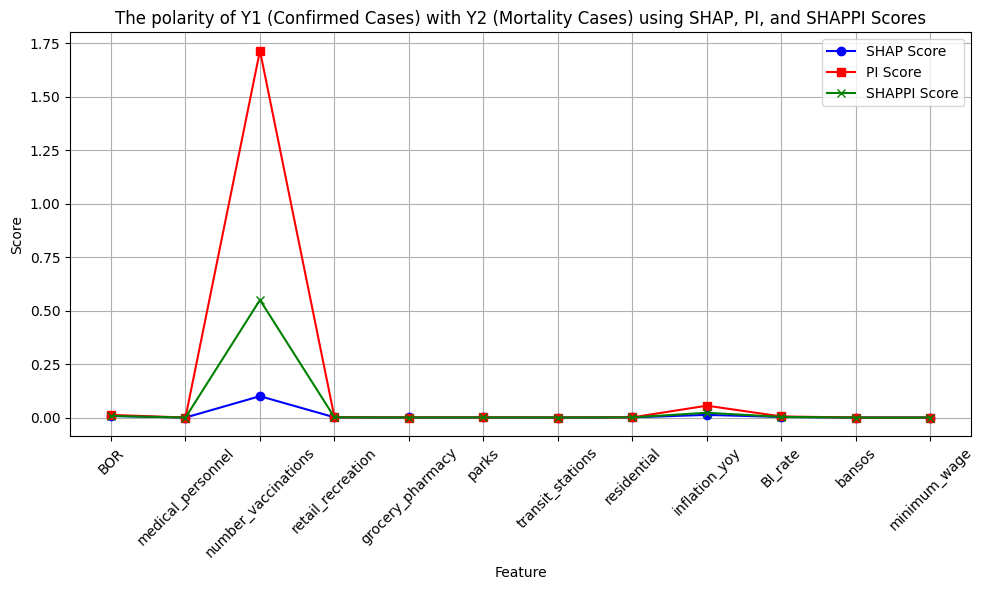

In [27]:
plot_shap_pi_shappi(pol_anal_Y1_Y2, "The polarity of Y1 (Confirmed Cases) with Y2 (Mortality Cases) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-212247440>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


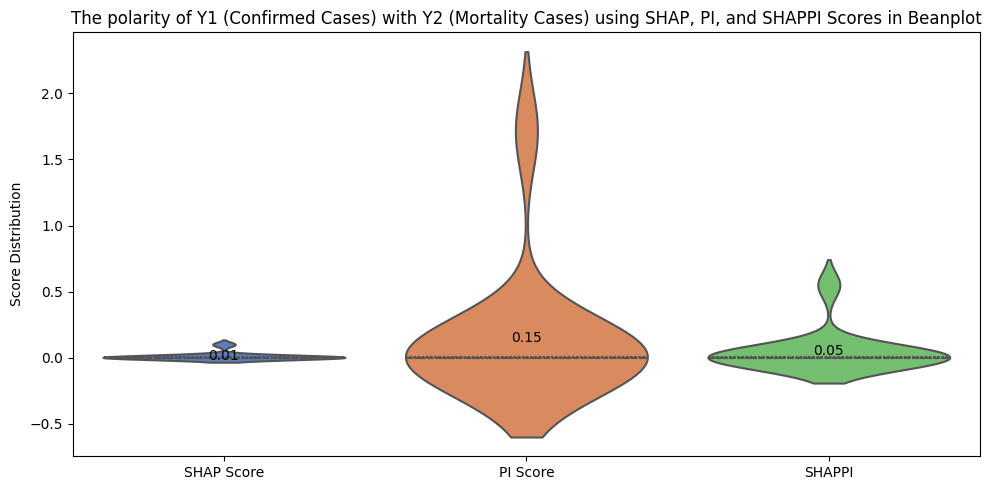

In [28]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y1_Y2, "The polarity of Y1 (Confirmed Cases) with Y2 (Mortality Cases) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [29]:
print("Analysis SHAP Y1 Polarity with Y3:")
pol_anal_Y1_Y3, perm_imp_Y1_Y3 = analysis_SHAP(shap_values_Y1, X_features_name, pol_Y3, regrY1, X_Y1, Y1)

Analysis SHAP Y1 Polarity with Y3:
---------------------------------------------------------------
Mean =  [7.0241496e-02 1.1670313e-04 9.0837318e-01 1.0346279e-02 2.7468039e-03
 4.5867036e-03 1.7783068e-03 9.4873654e-03 1.1246762e-01 2.6715659e-02
 0.0000000e+00 0.0000000e+00]
Condition =  [array([ True, False, False,  True, False,  True,  True, False, False,
        True,  True,  True])]
--------------------------------------------------------------- 



In [30]:
print("Analysis SHAPPI Y1 Polarity with Y3:")
shappi_Y1_Y3 = analysis_SHAPPI(pol_anal_Y1_Y3, perm_imp_Y1_Y3)
shappi_Y1_Y3

Analysis SHAPPI Y1 Polarity with Y3:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  5.483615e-02  0.550000
8         inflation_yoy  Positive  3.061404e-03  0.022375
0                   BOR  Positive  3.771381e-04  0.007459
9               BI_rate  Positive  1.436467e-04  0.002983
3     retail_recreation  Positive  1.276967e-04  0.000965
7           residential  Positive  4.677558e-05  0.000794
5                 parks  Positive  2.820760e-05  0.000394
4      grocery_pharmacy  Positive  2.411294e-05  0.000201
6      transit_stations  Positive  3.843331e-06  0.000128
1     medical_personnel  Positive  1.452916e-07  0.000006
10               bansos  Positive  0.000000e+00  0.000000
11         minimum_wage  Positive  0.000000e+00  0.000000

In [31]:
pol_anal_Y1_Y3

Feature  SHAP Average  SHAP Score  Polarity      PI Score  \
0                   BOR      0.026221    0.007733  Positive  1.232868e-02   
1     medical_personnel     -0.000105    0.000013  Positive  2.217911e-07   
2   number_vaccinations     -0.011828    0.100000  Positive  1.715755e+00   
3     retail_recreation      0.000550    0.001139  Positive  1.355968e-03   
4      grocery_pharmacy     -0.001461    0.000302  Positive  1.696884e-04   
5                 parks      0.000321    0.000505  Positive  4.854886e-04   
6      transit_stations      0.000947    0.000196  Positive  1.028783e-04   
7           residential     -0.002381    0.001044  Positive  9.325627e-04   
8         inflation_yoy     -0.002474    0.012381  Positive  5.553522e-02   
9               BI_rate      0.010243    0.002941  Positive  5.189597e-03   
10               bansos      0.000000    0.000000  Positive  0.000000e+00   
11         minimum_wage      0.000000    0.000000  Positive  0.000000e+00   

        PI Error    SHAPPI  
0   3.771381e-04  0.007459  
1   1.452916e-07  0.000006  
2   5.483615e-02  0.550000  
3   1.276967e-04  0.000965  
4   2.411294e-05  0.000201  
5   2.820760e-05  0.000394  
6   3.843331e-06  0.000128  
7   4.677558e-05  0.000794  
8   3.061404e-03  0.022375  
9   1.436467e-04  0.002983  
10  0.000000e+00  0.000000  
11  0.000000e+00  0.000000

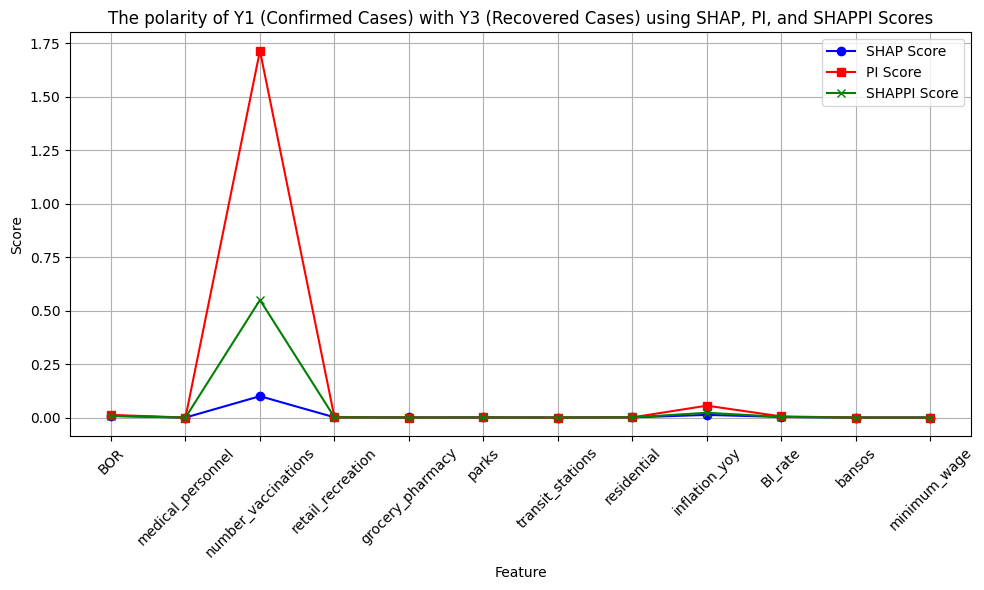

In [32]:
plot_shap_pi_shappi(pol_anal_Y1_Y3, "The polarity of Y1 (Confirmed Cases) with Y3 (Recovered Cases) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-212247440>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


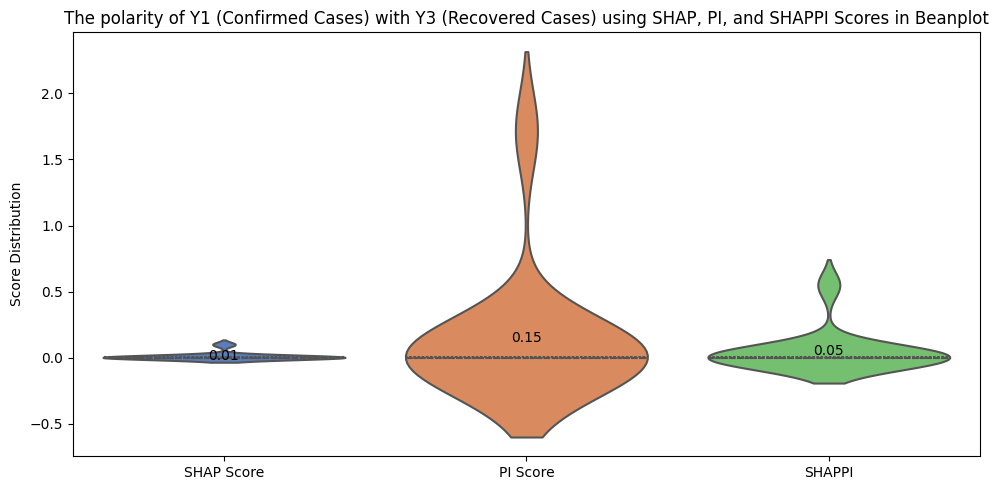

In [33]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y1_Y3, "The polarity of Y1 (Confirmed Cases) with Y3 (Recovered Cases) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [34]:
print("Analysis SHAP Y1 Polarity with Y4:")
pol_anal_Y1_Y4, perm_imp_Y1_Y4 = analysis_SHAP(shap_values_Y1, X_features_name, pol_Y4, regrY1, X_Y1, Y1)

Analysis SHAP Y1 Polarity with Y4:
---------------------------------------------------------------
Mean =  [7.0241496e-02 1.1670313e-04 9.0837318e-01 1.0346279e-02 2.7468039e-03
 4.5867036e-03 1.7783068e-03 9.4873654e-03 1.1246762e-01 2.6715659e-02
 0.0000000e+00 0.0000000e+00]
Condition =  [array([ True, False, False,  True, False,  True,  True, False, False,
        True,  True,  True])]
--------------------------------------------------------------- 



In [35]:
print("Analysis SHAPPI Y1 Polarity with Y4:")
shappi_Y1_Y4 = analysis_SHAPPI(pol_anal_Y1_Y4, perm_imp_Y1_Y4)
shappi_Y1_Y4

Analysis SHAPPI Y1 Polarity with Y4:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  5.483615e-02  0.550000
8         inflation_yoy  Positive  3.061404e-03  0.022375
0                   BOR  Positive  3.771381e-04  0.007459
9               BI_rate  Positive  1.436467e-04  0.002983
3     retail_recreation  Positive  1.276967e-04  0.000965
7           residential  Positive  4.677558e-05  0.000794
5                 parks  Positive  2.820760e-05  0.000394
4      grocery_pharmacy  Positive  2.411294e-05  0.000201
6      transit_stations  Positive  3.843331e-06  0.000128
1     medical_personnel  Positive  1.452916e-07  0.000006
10               bansos  Positive  0.000000e+00  0.000000
11         minimum_wage  Positive  0.000000e+00  0.000000

In [36]:
pol_anal_Y1_Y4

Feature  SHAP Average  SHAP Score  Polarity      PI Score  \
0                   BOR      0.026221    0.007733  Positive  1.232868e-02   
1     medical_personnel     -0.000105    0.000013  Positive  2.217911e-07   
2   number_vaccinations     -0.011828    0.100000  Positive  1.715755e+00   
3     retail_recreation      0.000550    0.001139  Positive  1.355968e-03   
4      grocery_pharmacy     -0.001461    0.000302  Positive  1.696884e-04   
5                 parks      0.000321    0.000505  Positive  4.854886e-04   
6      transit_stations      0.000947    0.000196  Positive  1.028783e-04   
7           residential     -0.002381    0.001044  Positive  9.325627e-04   
8         inflation_yoy     -0.002474    0.012381  Positive  5.553522e-02   
9               BI_rate      0.010243    0.002941  Positive  5.189597e-03   
10               bansos      0.000000    0.000000  Positive  0.000000e+00   
11         minimum_wage      0.000000    0.000000  Positive  0.000000e+00   

        PI Error    SHAPPI  
0   3.771381e-04  0.007459  
1   1.452916e-07  0.000006  
2   5.483615e-02  0.550000  
3   1.276967e-04  0.000965  
4   2.411294e-05  0.000201  
5   2.820760e-05  0.000394  
6   3.843331e-06  0.000128  
7   4.677558e-05  0.000794  
8   3.061404e-03  0.022375  
9   1.436467e-04  0.002983  
10  0.000000e+00  0.000000  
11  0.000000e+00  0.000000

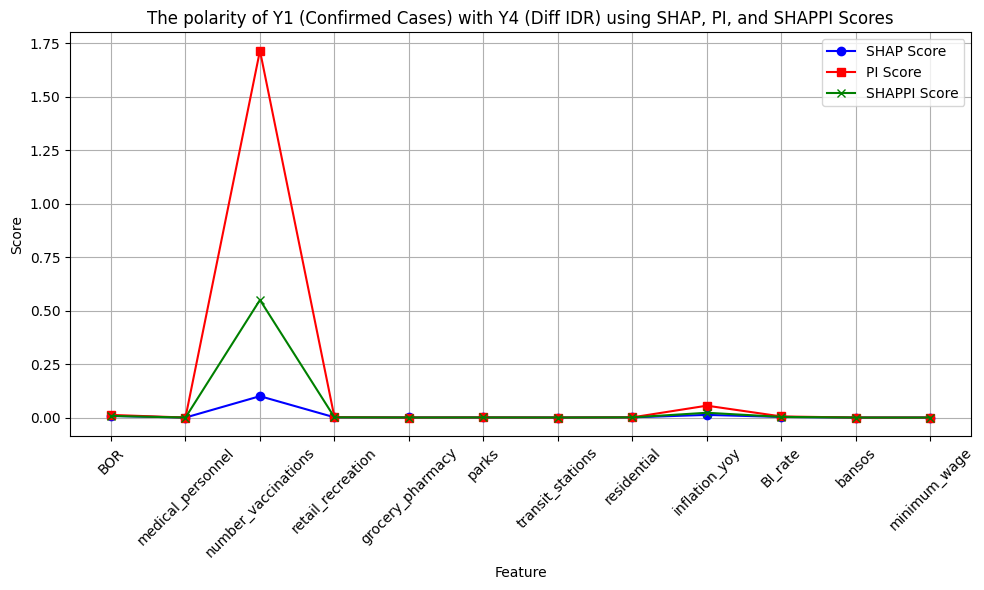

In [37]:
plot_shap_pi_shappi(pol_anal_Y1_Y4, "The polarity of Y1 (Confirmed Cases) with Y4 (Diff IDR) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-212247440>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


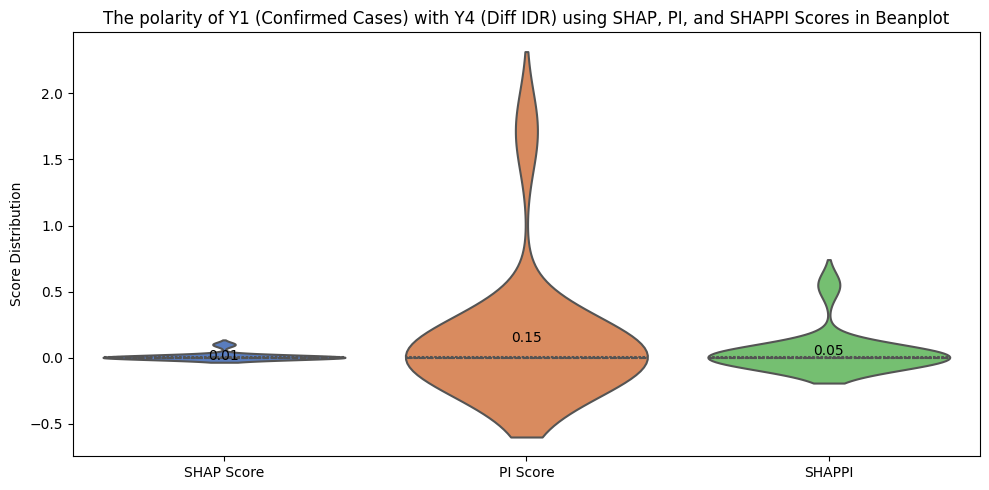

In [38]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y1_Y4, "The polarity of Y1 (Confirmed Cases) with Y4 (Diff IDR) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [39]:
print("Analysis SHAP Y1 Polarity with Y5:")
pol_anal_Y1_Y5, perm_imp_Y1_Y5 = analysis_SHAP(shap_values_Y1, X_features_name, pol_Y5, regrY1, X_Y1, Y1)

Analysis SHAP Y1 Polarity with Y5:
---------------------------------------------------------------
Mean =  [7.0241496e-02 1.1670313e-04 9.0837318e-01 1.0346279e-02 2.7468039e-03
 4.5867036e-03 1.7783068e-03 9.4873654e-03 1.1246762e-01 2.6715659e-02
 0.0000000e+00 0.0000000e+00]
Condition =  [array([ True, False, False,  True, False,  True,  True, False, False,
        True,  True,  True])]
--------------------------------------------------------------- 



In [40]:
print("Analysis SHAPPI Y1 Polarity with Y5:")
shappi_Y1_Y5 = analysis_SHAPPI(pol_anal_Y1_Y5, perm_imp_Y1_Y5)
shappi_Y1_Y5

Analysis SHAPPI Y1 Polarity with Y5:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  5.483615e-02  0.550000
8         inflation_yoy  Positive  3.061404e-03  0.022375
0                   BOR  Positive  3.771381e-04  0.007459
9               BI_rate  Positive  1.436467e-04  0.002983
3     retail_recreation  Positive  1.276967e-04  0.000965
7           residential  Positive  4.677558e-05  0.000794
5                 parks  Positive  2.820760e-05  0.000394
4      grocery_pharmacy  Positive  2.411294e-05  0.000201
6      transit_stations  Positive  3.843331e-06  0.000128
1     medical_personnel  Positive  1.452916e-07  0.000006
10               bansos  Positive  0.000000e+00  0.000000
11         minimum_wage  Positive  0.000000e+00  0.000000

In [41]:
pol_anal_Y1_Y5

Feature  SHAP Average  SHAP Score  Polarity      PI Score  \
0                   BOR      0.026221    0.007733  Positive  1.232868e-02   
1     medical_personnel     -0.000105    0.000013  Positive  2.217911e-07   
2   number_vaccinations     -0.011828    0.100000  Positive  1.715755e+00   
3     retail_recreation      0.000550    0.001139  Positive  1.355968e-03   
4      grocery_pharmacy     -0.001461    0.000302  Positive  1.696884e-04   
5                 parks      0.000321    0.000505  Positive  4.854886e-04   
6      transit_stations      0.000947    0.000196  Positive  1.028783e-04   
7           residential     -0.002381    0.001044  Positive  9.325627e-04   
8         inflation_yoy     -0.002474    0.012381  Positive  5.553522e-02   
9               BI_rate      0.010243    0.002941  Positive  5.189597e-03   
10               bansos      0.000000    0.000000  Positive  0.000000e+00   
11         minimum_wage      0.000000    0.000000  Positive  0.000000e+00   

        PI Error    SHAPPI  
0   3.771381e-04  0.007459  
1   1.452916e-07  0.000006  
2   5.483615e-02  0.550000  
3   1.276967e-04  0.000965  
4   2.411294e-05  0.000201  
5   2.820760e-05  0.000394  
6   3.843331e-06  0.000128  
7   4.677558e-05  0.000794  
8   3.061404e-03  0.022375  
9   1.436467e-04  0.002983  
10  0.000000e+00  0.000000  
11  0.000000e+00  0.000000

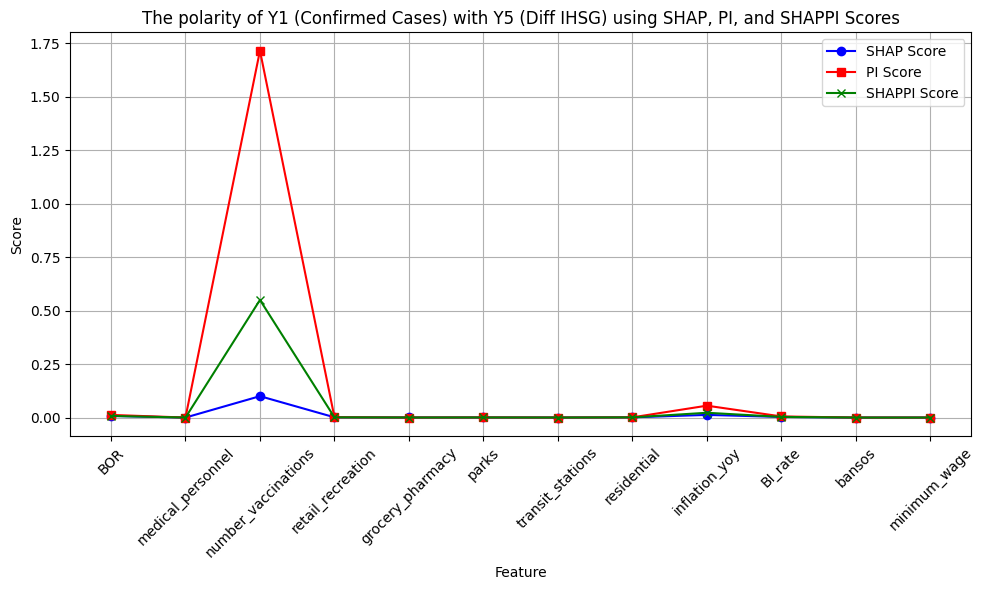

In [42]:
plot_shap_pi_shappi(pol_anal_Y1_Y5, "The polarity of Y1 (Confirmed Cases) with Y5 (Diff IHSG) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-212247440>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


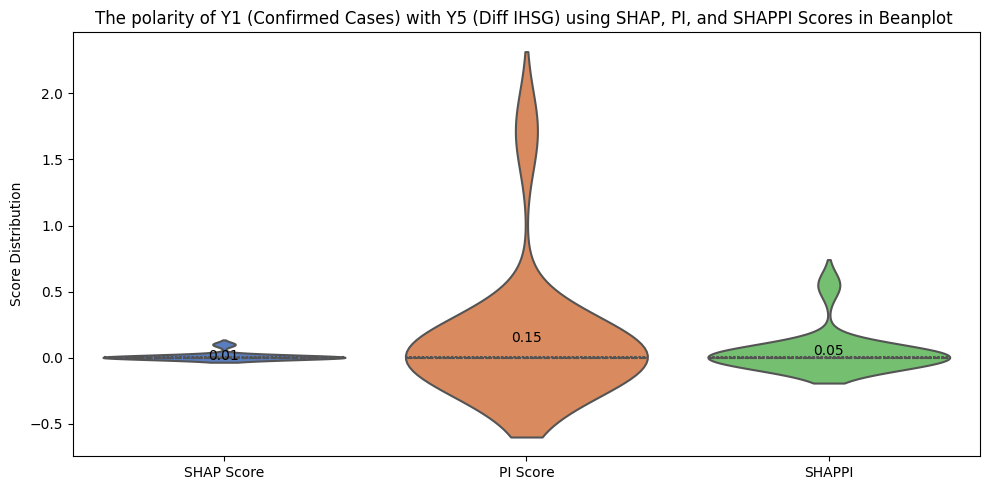

In [43]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y1_Y5, "The polarity of Y1 (Confirmed Cases) with Y5 (Diff IHSG) using SHAP, PI, and SHAPPI Scores in Beanplot ")

In [44]:
print("Analysis SHAP Y1 Polarity with Y6:")
pol_anal_Y1_Y6, perm_imp_Y1_Y6 = analysis_SHAP(shap_values_Y1, X_features_name, pol_Y6, regrY1, X_Y1, Y1)

Analysis SHAP Y1 Polarity with Y6:
---------------------------------------------------------------
Mean =  [7.0241496e-02 1.1670313e-04 9.0837318e-01 1.0346279e-02 2.7468039e-03
 4.5867036e-03 1.7783068e-03 9.4873654e-03 1.1246762e-01 2.6715659e-02
 0.0000000e+00 0.0000000e+00]
Condition =  [array([ True, False, False,  True, False,  True,  True, False, False,
        True,  True,  True])]
--------------------------------------------------------------- 



In [45]:
print("Analysis SHAPPI Y1 Polarity with Y6:")
shappi_Y1_Y6 = analysis_SHAPPI(pol_anal_Y1_Y6, perm_imp_Y1_Y6)
shappi_Y1_Y6

Analysis SHAPPI Y1 Polarity with Y6:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  5.483615e-02  0.550000
8         inflation_yoy  Positive  3.061404e-03  0.022375
0                   BOR  Positive  3.771381e-04  0.007459
9               BI_rate  Positive  1.436467e-04  0.002983
3     retail_recreation  Positive  1.276967e-04  0.000965
7           residential  Positive  4.677558e-05  0.000794
5                 parks  Positive  2.820760e-05  0.000394
4      grocery_pharmacy  Positive  2.411294e-05  0.000201
6      transit_stations  Positive  3.843331e-06  0.000128
1     medical_personnel  Positive  1.452916e-07  0.000006
10               bansos  Positive  0.000000e+00  0.000000
11         minimum_wage  Positive  0.000000e+00  0.000000

In [46]:
pol_anal_Y1_Y6

Feature  SHAP Average  SHAP Score  Polarity      PI Score  \
0                   BOR      0.026221    0.007733  Positive  1.232868e-02   
1     medical_personnel     -0.000105    0.000013  Positive  2.217911e-07   
2   number_vaccinations     -0.011828    0.100000  Positive  1.715755e+00   
3     retail_recreation      0.000550    0.001139  Positive  1.355968e-03   
4      grocery_pharmacy     -0.001461    0.000302  Positive  1.696884e-04   
5                 parks      0.000321    0.000505  Positive  4.854886e-04   
6      transit_stations      0.000947    0.000196  Positive  1.028783e-04   
7           residential     -0.002381    0.001044  Positive  9.325627e-04   
8         inflation_yoy     -0.002474    0.012381  Positive  5.553522e-02   
9               BI_rate      0.010243    0.002941  Positive  5.189597e-03   
10               bansos      0.000000    0.000000  Positive  0.000000e+00   
11         minimum_wage      0.000000    0.000000  Positive  0.000000e+00   

        PI Error    SHAPPI  
0   3.771381e-04  0.007459  
1   1.452916e-07  0.000006  
2   5.483615e-02  0.550000  
3   1.276967e-04  0.000965  
4   2.411294e-05  0.000201  
5   2.820760e-05  0.000394  
6   3.843331e-06  0.000128  
7   4.677558e-05  0.000794  
8   3.061404e-03  0.022375  
9   1.436467e-04  0.002983  
10  0.000000e+00  0.000000  
11  0.000000e+00  0.000000

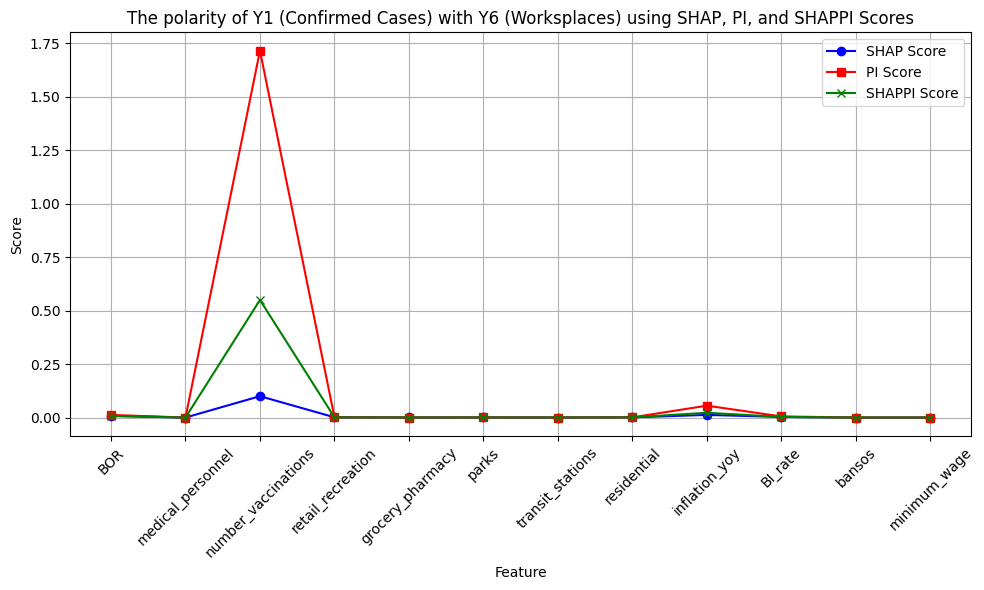

In [47]:
plot_shap_pi_shappi(pol_anal_Y1_Y6, "The polarity of Y1 (Confirmed Cases) with Y6 (Worksplaces) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-212247440>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


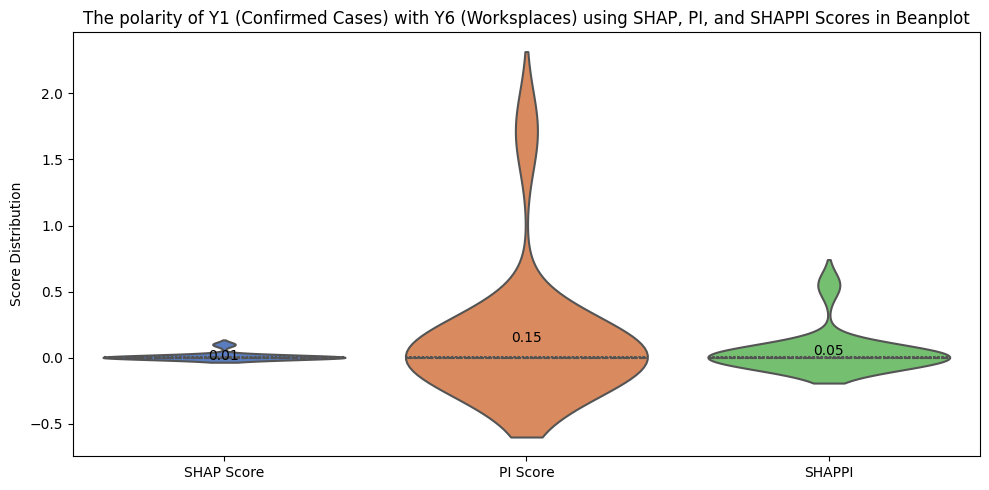

In [48]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y1_Y6, "The polarity of Y1 (Confirmed Cases) with Y6 (Worksplaces) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [49]:
print("Analysis SHAP Y2 Polarity with Y1:")
pol_anal_Y2_Y1, perm_imp_Y2_Y1 = analysis_SHAP(shap_values_Y2, X_features_name, pol_Y1, regrY2, X_Y2, Y2)

Analysis SHAP Y2 Polarity with Y1:
---------------------------------------------------------------
Mean =  [4.9485948e-02 3.1799066e-04 4.8669237e-01 2.5599355e-02 6.9410525e-02
 2.5374297e-02 4.6518177e-02 3.2965720e-02 5.0224036e-01 2.1775883e-02
 3.8155671e-05 0.0000000e+00]
Condition =  [array([False,  True, False,  True, False,  True, False, False,  True,
       False, False,  True])]
--------------------------------------------------------------- 



In [50]:
print("Analysis SHAPPI Y2 Polarity with Y1:")
shappi_Y2_Y1 = analysis_SHAPPI(pol_anal_Y2_Y1, perm_imp_Y2_Y1)
shappi_Y2_Y1

Analysis SHAPPI Y2 Polarity with Y1:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  8.664843e-02  0.548452
8         inflation_yoy  Positive  5.674205e-02  0.379068
0                   BOR  Positive  4.615012e-03  0.016724
6      transit_stations  Positive  5.711335e-03  0.016431
7           residential  Positive  2.351778e-03  0.014900
4      grocery_pharmacy  Positive  3.416530e-03  0.012989
5                 parks  Positive  1.402894e-03  0.007399
3     retail_recreation  Positive  8.629736e-04  0.005389
9               BI_rate  Positive  1.093950e-03  0.005093
1     medical_personnel  Positive  1.097039e-06  0.000033
10               bansos  Positive  5.698070e-07  0.000004
11         minimum_wage  Positive  0.000000e+00  0.000000

In [51]:
pol_anal_Y2_Y1

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.007029    0.009853  Positive  0.041291   
1     medical_personnel      0.000184    0.000063  Positive  0.000005   
2   number_vaccinations     -0.142675    0.096904  Positive  1.750019   
3     retail_recreation      0.000255    0.005097  Positive  0.009943   
4      grocery_pharmacy     -0.009050    0.013820  Positive  0.021276   
5                 parks      0.005603    0.005052  Positive  0.017056   
6      transit_stations     -0.005807    0.009262  Positive  0.041300   
7           residential     -0.006293    0.006564  Positive  0.040665   
8         inflation_yoy      0.180792    0.100000  Positive  1.151749   
9               BI_rate     -0.000044    0.004336  Positive  0.010238   
10               bansos     -0.000034    0.000008  Positive  0.000002   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

        PI Error    SHAPPI  
0   4.615012e-03  0.016724  
1   1.097039e-06  0.000033  
2   8.664843e-02  0.548452  
3   8.629736e-04  0.005389  
4   3.416530e-03  0.012989  
5   1.402894e-03  0.007399  
6   5.711335e-03  0.016431  
7   2.351778e-03  0.014900  
8   5.674205e-02  0.379068  
9   1.093950e-03  0.005093  
10  5.698070e-07  0.000004  
11  0.000000e+00  0.000000

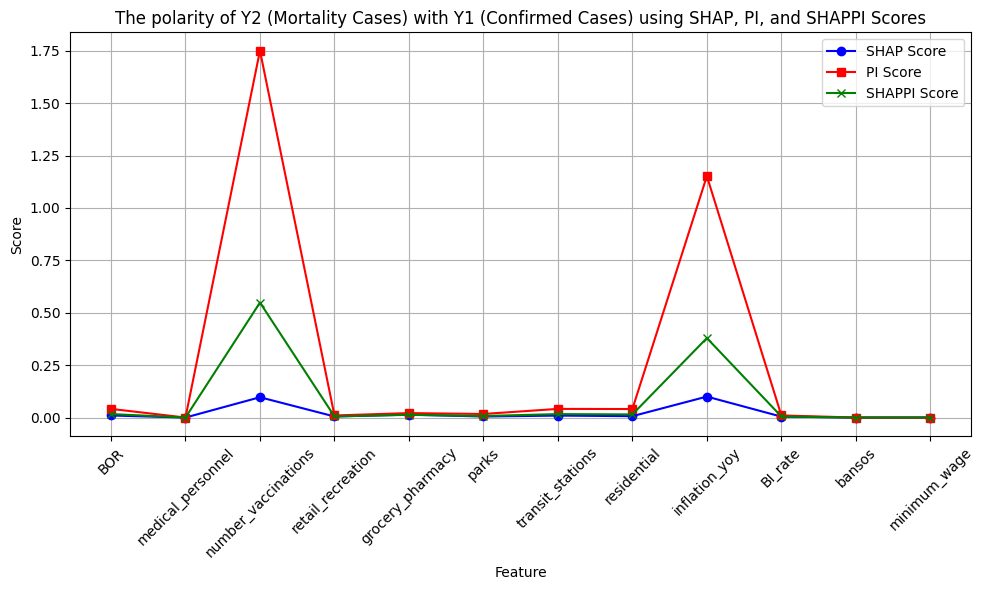

In [52]:
plot_shap_pi_shappi(pol_anal_Y2_Y1, "The polarity of Y2 (Mortality Cases) with Y1 (Confirmed Cases) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-212247440>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


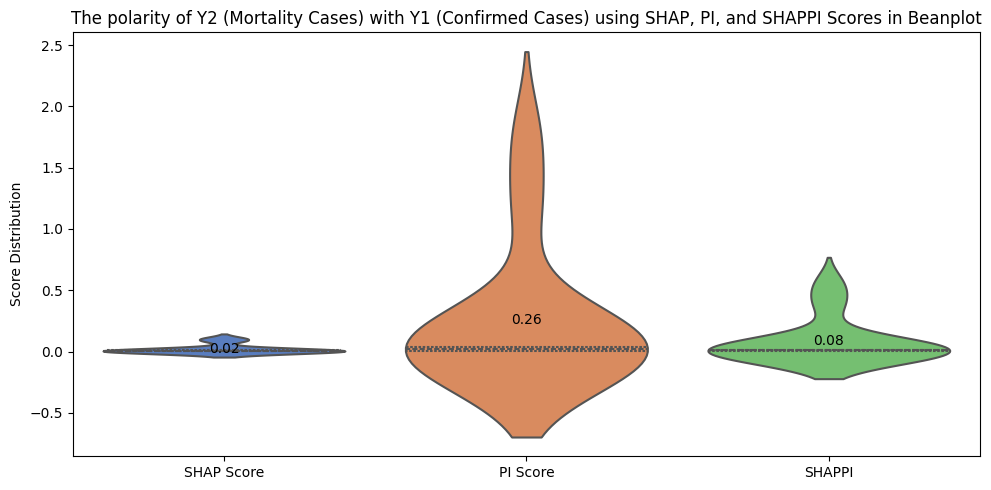

In [53]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y2_Y1, "The polarity of Y2 (Mortality Cases) with Y1 (Confirmed Cases) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [54]:
print("Analysis SHAP Y2 Polarity with Y3:")
pol_anal_Y2_Y3, perm_imp_Y2_Y3 = analysis_SHAP(shap_values_Y2, X_features_name, pol_Y3, regrY2, X_Y2, Y2)

Analysis SHAP Y2 Polarity with Y3:
---------------------------------------------------------------
Mean =  [4.9485948e-02 3.1799066e-04 4.8669237e-01 2.5599355e-02 6.9410525e-02
 2.5374297e-02 4.6518177e-02 3.2965720e-02 5.0224036e-01 2.1775883e-02
 3.8155671e-05 0.0000000e+00]
Condition =  [array([False,  True, False,  True, False,  True, False, False,  True,
       False, False,  True])]
--------------------------------------------------------------- 



In [55]:
print("Analysis SHAPPI Y2 Polarity with Y3:")
shappi_Y2_Y3 = analysis_SHAPPI(pol_anal_Y2_Y3, perm_imp_Y2_Y3)
shappi_Y2_Y3

Analysis SHAPPI Y2 Polarity with Y3:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  8.664843e-02  0.548452
8         inflation_yoy  Positive  5.674205e-02  0.379068
0                   BOR  Positive  4.615012e-03  0.016724
6      transit_stations  Positive  5.711335e-03  0.016431
7           residential  Positive  2.351778e-03  0.014900
4      grocery_pharmacy  Positive  3.416530e-03  0.012989
5                 parks  Positive  1.402894e-03  0.007399
3     retail_recreation  Positive  8.629736e-04  0.005389
9               BI_rate  Positive  1.093950e-03  0.005093
1     medical_personnel  Positive  1.097039e-06  0.000033
10               bansos  Positive  5.698070e-07  0.000004
11         minimum_wage  Positive  0.000000e+00  0.000000

In [56]:
pol_anal_Y2_Y3

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.007029    0.009853  Positive  0.041291   
1     medical_personnel      0.000184    0.000063  Positive  0.000005   
2   number_vaccinations     -0.142675    0.096904  Positive  1.750019   
3     retail_recreation      0.000255    0.005097  Positive  0.009943   
4      grocery_pharmacy     -0.009050    0.013820  Positive  0.021276   
5                 parks      0.005603    0.005052  Positive  0.017056   
6      transit_stations     -0.005807    0.009262  Positive  0.041300   
7           residential     -0.006293    0.006564  Positive  0.040665   
8         inflation_yoy      0.180792    0.100000  Positive  1.151749   
9               BI_rate     -0.000044    0.004336  Positive  0.010238   
10               bansos     -0.000034    0.000008  Positive  0.000002   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

        PI Error    SHAPPI  
0   4.615012e-03  0.016724  
1   1.097039e-06  0.000033  
2   8.664843e-02  0.548452  
3   8.629736e-04  0.005389  
4   3.416530e-03  0.012989  
5   1.402894e-03  0.007399  
6   5.711335e-03  0.016431  
7   2.351778e-03  0.014900  
8   5.674205e-02  0.379068  
9   1.093950e-03  0.005093  
10  5.698070e-07  0.000004  
11  0.000000e+00  0.000000

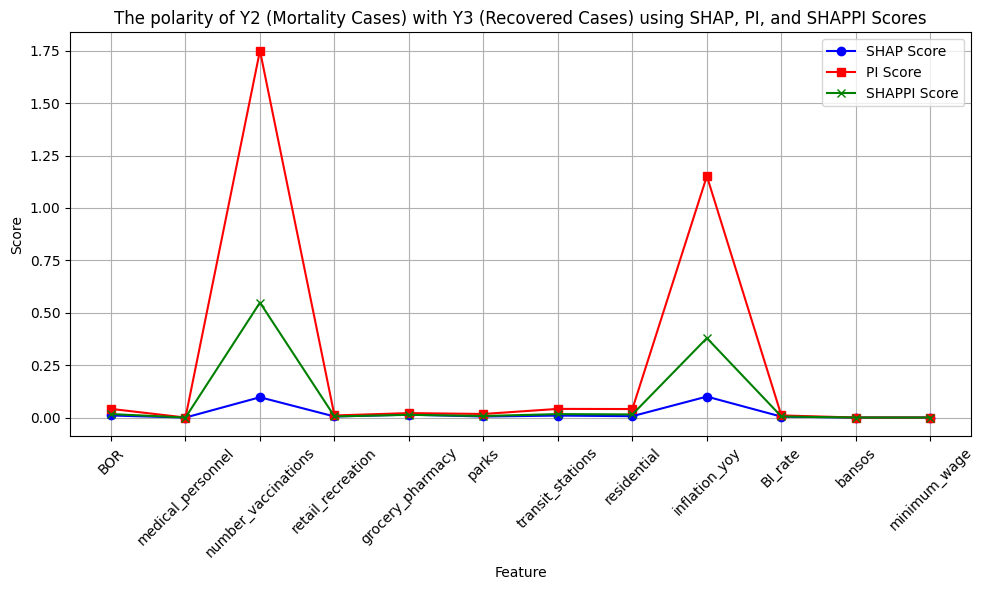

In [57]:
plot_shap_pi_shappi(pol_anal_Y2_Y3, "The polarity of Y2 (Mortality Cases) with Y3 (Recovered Cases) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-212247440>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


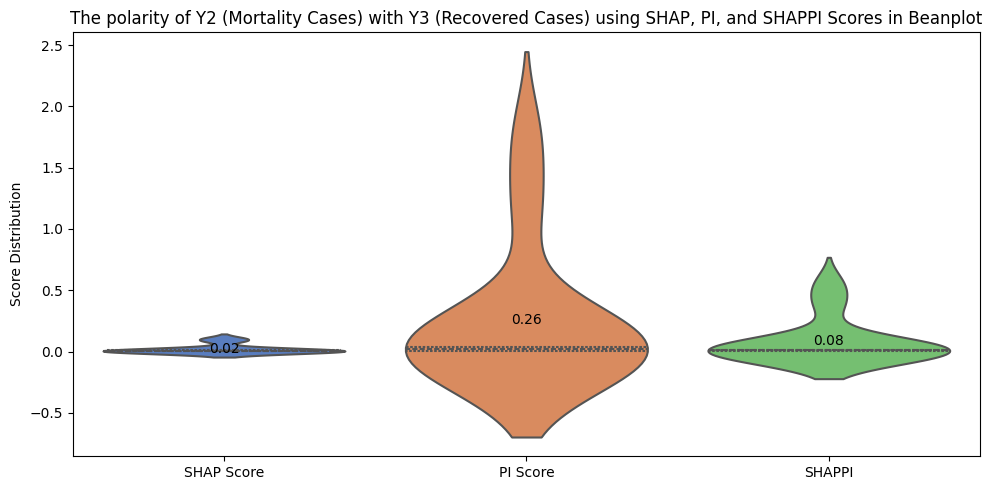

In [58]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y2_Y3, "The polarity of Y2 (Mortality Cases) with Y3 (Recovered Cases) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [59]:
print("Analysis SHAP Y2 Polarity with Y4:")
pol_anal_Y2_Y4, perm_imp_Y2_Y4 = analysis_SHAP(shap_values_Y2, X_features_name, pol_Y4, regrY2, X_Y2, Y2)

Analysis SHAP Y2 Polarity with Y4:
---------------------------------------------------------------
Mean =  [4.9485948e-02 3.1799066e-04 4.8669237e-01 2.5599355e-02 6.9410525e-02
 2.5374297e-02 4.6518177e-02 3.2965720e-02 5.0224036e-01 2.1775883e-02
 3.8155671e-05 0.0000000e+00]
Condition =  [array([False,  True, False,  True, False,  True, False, False,  True,
       False, False,  True])]
--------------------------------------------------------------- 



In [60]:
print("Analysis SHAPPI Y2 Polarity with Y4:")
shappi_Y2_Y4 = analysis_SHAPPI(pol_anal_Y2_Y4, perm_imp_Y2_Y4)
shappi_Y2_Y4

Analysis SHAPPI Y2 Polarity with Y4:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  8.664843e-02  0.548452
8         inflation_yoy  Positive  5.674205e-02  0.379068
0                   BOR  Positive  4.615012e-03  0.016724
6      transit_stations  Positive  5.711335e-03  0.016431
7           residential  Positive  2.351778e-03  0.014900
4      grocery_pharmacy  Positive  3.416530e-03  0.012989
5                 parks  Positive  1.402894e-03  0.007399
3     retail_recreation  Positive  8.629736e-04  0.005389
9               BI_rate  Positive  1.093950e-03  0.005093
1     medical_personnel  Positive  1.097039e-06  0.000033
10               bansos  Positive  5.698070e-07  0.000004
11         minimum_wage  Positive  0.000000e+00  0.000000

In [61]:
pol_anal_Y2_Y4

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.007029    0.009853  Positive  0.041291   
1     medical_personnel      0.000184    0.000063  Positive  0.000005   
2   number_vaccinations     -0.142675    0.096904  Positive  1.750019   
3     retail_recreation      0.000255    0.005097  Positive  0.009943   
4      grocery_pharmacy     -0.009050    0.013820  Positive  0.021276   
5                 parks      0.005603    0.005052  Positive  0.017056   
6      transit_stations     -0.005807    0.009262  Positive  0.041300   
7           residential     -0.006293    0.006564  Positive  0.040665   
8         inflation_yoy      0.180792    0.100000  Positive  1.151749   
9               BI_rate     -0.000044    0.004336  Positive  0.010238   
10               bansos     -0.000034    0.000008  Positive  0.000002   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

        PI Error    SHAPPI  
0   4.615012e-03  0.016724  
1   1.097039e-06  0.000033  
2   8.664843e-02  0.548452  
3   8.629736e-04  0.005389  
4   3.416530e-03  0.012989  
5   1.402894e-03  0.007399  
6   5.711335e-03  0.016431  
7   2.351778e-03  0.014900  
8   5.674205e-02  0.379068  
9   1.093950e-03  0.005093  
10  5.698070e-07  0.000004  
11  0.000000e+00  0.000000

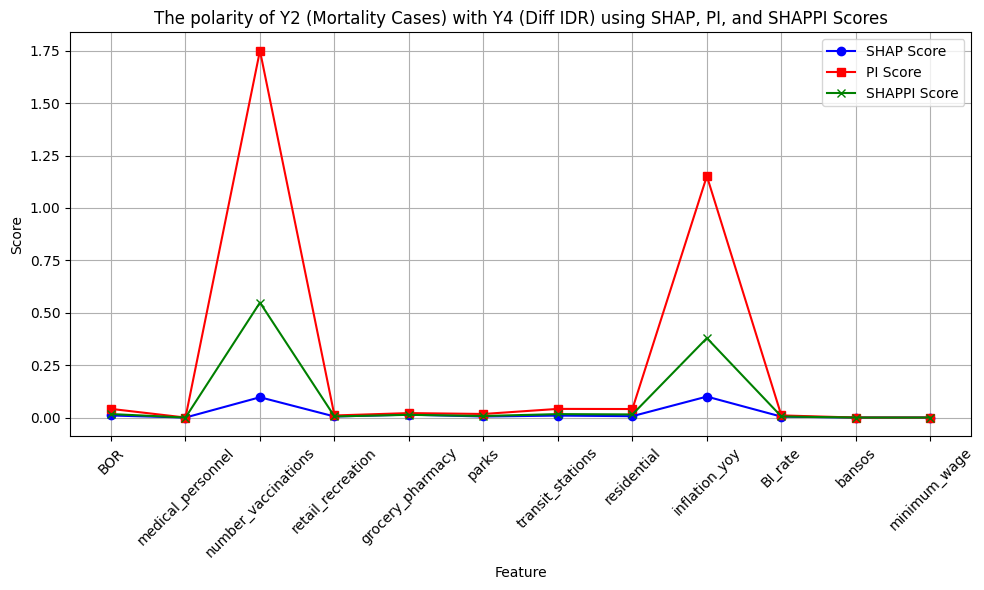

In [62]:
plot_shap_pi_shappi(pol_anal_Y2_Y4, "The polarity of Y2 (Mortality Cases) with Y4 (Diff IDR) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-212247440>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


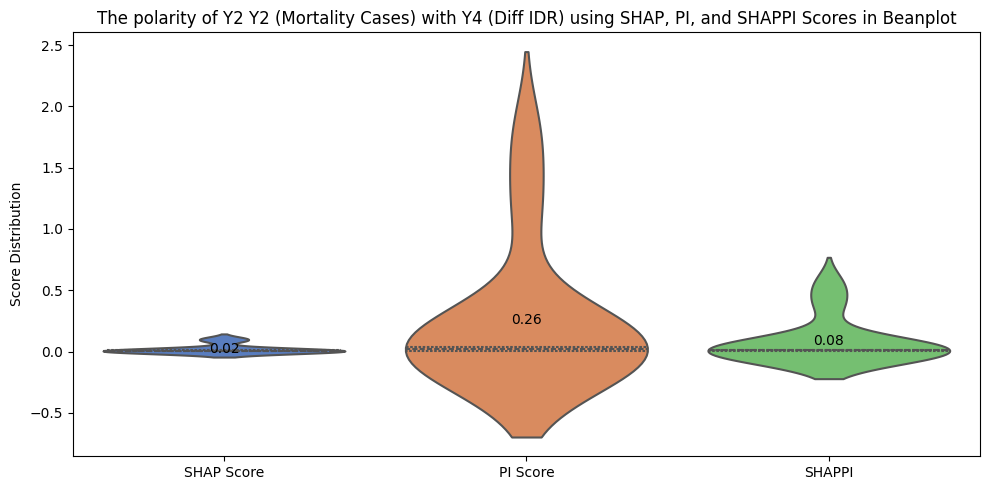

In [63]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y2_Y4, "The polarity of Y2 Y2 (Mortality Cases) with Y4 (Diff IDR) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [64]:
print("Analysis SHAP Y2 Polarity with Y5:")
pol_anal_Y2_Y5, perm_imp_Y2_Y5 = analysis_SHAP(shap_values_Y2, X_features_name, pol_Y5, regrY2, X_Y2, Y2)

Analysis SHAP Y2 Polarity with Y5:
---------------------------------------------------------------
Mean =  [4.9485948e-02 3.1799066e-04 4.8669237e-01 2.5599355e-02 6.9410525e-02
 2.5374297e-02 4.6518177e-02 3.2965720e-02 5.0224036e-01 2.1775883e-02
 3.8155671e-05 0.0000000e+00]
Condition =  [array([False,  True, False,  True, False,  True, False, False,  True,
       False, False,  True])]
--------------------------------------------------------------- 



In [65]:
print("Analysis SHAPPI Y2 Polarity with Y5:")
shappi_Y2_Y5 = analysis_SHAPPI(pol_anal_Y2_Y5, perm_imp_Y2_Y5)
shappi_Y2_Y5

Analysis SHAPPI Y2 Polarity with Y5:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  8.664843e-02  0.548452
8         inflation_yoy  Positive  5.674205e-02  0.379068
0                   BOR  Positive  4.615012e-03  0.016724
6      transit_stations  Positive  5.711335e-03  0.016431
7           residential  Positive  2.351778e-03  0.014900
4      grocery_pharmacy  Positive  3.416530e-03  0.012989
5                 parks  Positive  1.402894e-03  0.007399
3     retail_recreation  Positive  8.629736e-04  0.005389
9               BI_rate  Positive  1.093950e-03  0.005093
1     medical_personnel  Positive  1.097039e-06  0.000033
10               bansos  Positive  5.698070e-07  0.000004
11         minimum_wage  Positive  0.000000e+00  0.000000

In [66]:
pol_anal_Y2_Y5

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.007029    0.009853  Positive  0.041291   
1     medical_personnel      0.000184    0.000063  Positive  0.000005   
2   number_vaccinations     -0.142675    0.096904  Positive  1.750019   
3     retail_recreation      0.000255    0.005097  Positive  0.009943   
4      grocery_pharmacy     -0.009050    0.013820  Positive  0.021276   
5                 parks      0.005603    0.005052  Positive  0.017056   
6      transit_stations     -0.005807    0.009262  Positive  0.041300   
7           residential     -0.006293    0.006564  Positive  0.040665   
8         inflation_yoy      0.180792    0.100000  Positive  1.151749   
9               BI_rate     -0.000044    0.004336  Positive  0.010238   
10               bansos     -0.000034    0.000008  Positive  0.000002   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

        PI Error    SHAPPI  
0   4.615012e-03  0.016724  
1   1.097039e-06  0.000033  
2   8.664843e-02  0.548452  
3   8.629736e-04  0.005389  
4   3.416530e-03  0.012989  
5   1.402894e-03  0.007399  
6   5.711335e-03  0.016431  
7   2.351778e-03  0.014900  
8   5.674205e-02  0.379068  
9   1.093950e-03  0.005093  
10  5.698070e-07  0.000004  
11  0.000000e+00  0.000000

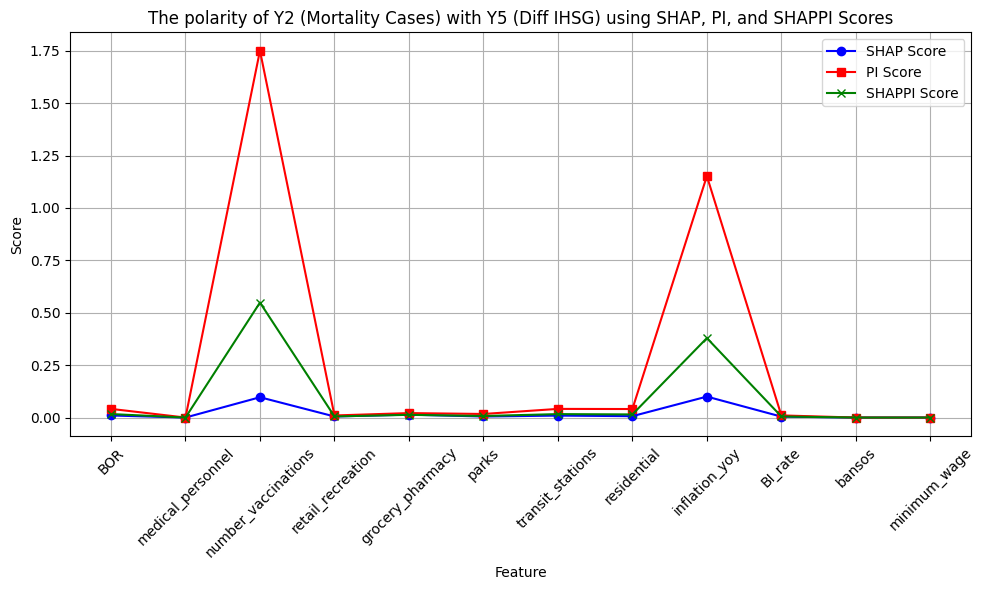

In [67]:
plot_shap_pi_shappi(pol_anal_Y2_Y5, "The polarity of Y2 (Mortality Cases) with Y5 (Diff IHSG) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-212247440>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


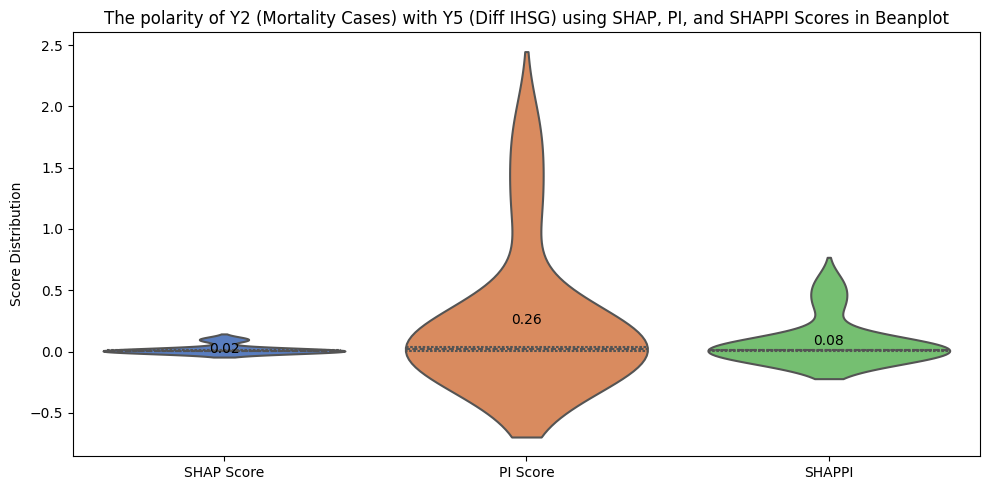

In [68]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y2_Y5, "The polarity of Y2 (Mortality Cases) with Y5 (Diff IHSG) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [69]:
print("Analysis SHAP Y2 Polarity with Y6:")
pol_anal_Y2_Y6, perm_imp_Y2_Y6 = analysis_SHAP(shap_values_Y2, X_features_name, pol_Y6, regrY2, X_Y2, Y2)

Analysis SHAP Y2 Polarity with Y6:
---------------------------------------------------------------
Mean =  [4.9485948e-02 3.1799066e-04 4.8669237e-01 2.5599355e-02 6.9410525e-02
 2.5374297e-02 4.6518177e-02 3.2965720e-02 5.0224036e-01 2.1775883e-02
 3.8155671e-05 0.0000000e+00]
Condition =  [array([False,  True, False,  True, False,  True, False, False,  True,
       False, False,  True])]
--------------------------------------------------------------- 



In [70]:
print("Analysis SHAPPI Y2 Polarity with Y6:")
shappi_Y2_Y6 = analysis_SHAPPI(pol_anal_Y2_Y6, perm_imp_Y2_Y6)
shappi_Y2_Y6

Analysis SHAPPI Y2 Polarity with Y6:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  8.664843e-02  0.548452
8         inflation_yoy  Positive  5.674205e-02  0.379068
0                   BOR  Positive  4.615012e-03  0.016724
6      transit_stations  Positive  5.711335e-03  0.016431
7           residential  Positive  2.351778e-03  0.014900
4      grocery_pharmacy  Positive  3.416530e-03  0.012989
5                 parks  Positive  1.402894e-03  0.007399
3     retail_recreation  Positive  8.629736e-04  0.005389
9               BI_rate  Positive  1.093950e-03  0.005093
1     medical_personnel  Positive  1.097039e-06  0.000033
10               bansos  Positive  5.698070e-07  0.000004
11         minimum_wage  Positive  0.000000e+00  0.000000

In [71]:
pol_anal_Y2_Y6

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.007029    0.009853  Positive  0.041291   
1     medical_personnel      0.000184    0.000063  Positive  0.000005   
2   number_vaccinations     -0.142675    0.096904  Positive  1.750019   
3     retail_recreation      0.000255    0.005097  Positive  0.009943   
4      grocery_pharmacy     -0.009050    0.013820  Positive  0.021276   
5                 parks      0.005603    0.005052  Positive  0.017056   
6      transit_stations     -0.005807    0.009262  Positive  0.041300   
7           residential     -0.006293    0.006564  Positive  0.040665   
8         inflation_yoy      0.180792    0.100000  Positive  1.151749   
9               BI_rate     -0.000044    0.004336  Positive  0.010238   
10               bansos     -0.000034    0.000008  Positive  0.000002   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

        PI Error    SHAPPI  
0   4.615012e-03  0.016724  
1   1.097039e-06  0.000033  
2   8.664843e-02  0.548452  
3   8.629736e-04  0.005389  
4   3.416530e-03  0.012989  
5   1.402894e-03  0.007399  
6   5.711335e-03  0.016431  
7   2.351778e-03  0.014900  
8   5.674205e-02  0.379068  
9   1.093950e-03  0.005093  
10  5.698070e-07  0.000004  
11  0.000000e+00  0.000000

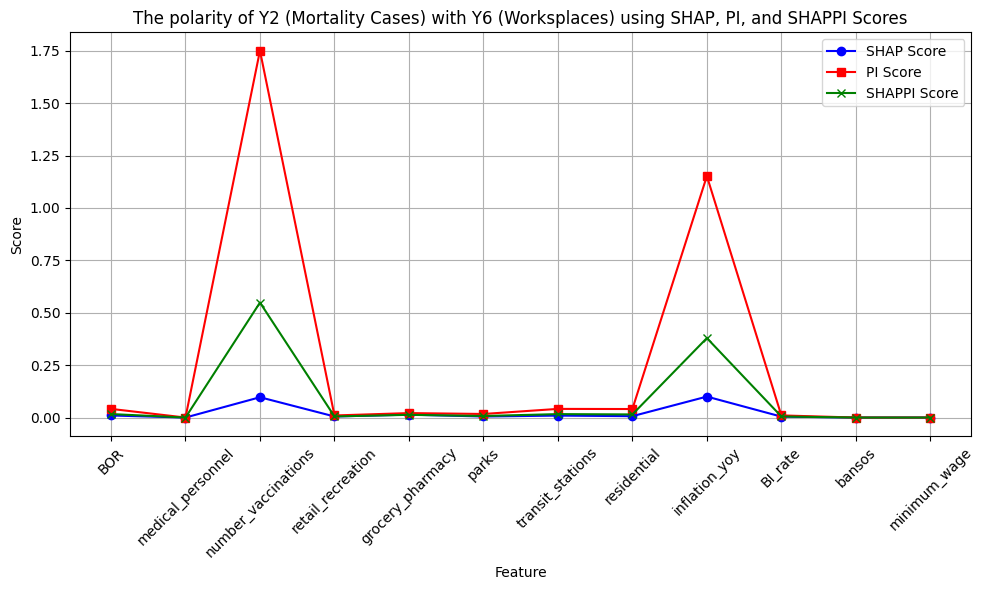

In [72]:
plot_shap_pi_shappi(pol_anal_Y2_Y6, "The polarity of Y2 (Mortality Cases) with Y6 (Worksplaces) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-212247440>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


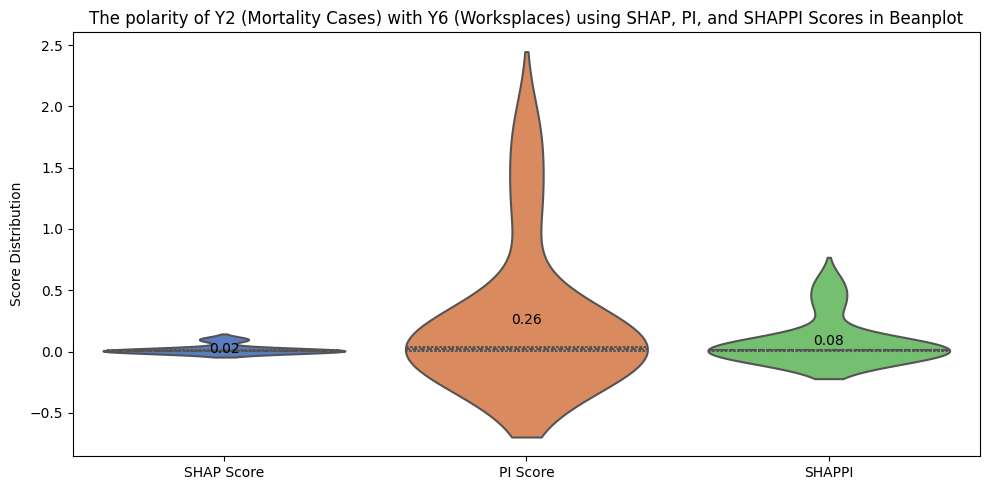

In [73]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y2_Y6, "The polarity of Y2 (Mortality Cases) with Y6 (Worksplaces) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [74]:
print("Analysis SHAP Y3 Polarity with Y1:")
pol_anal_Y3_Y1, perm_imp_Y3_Y1 = analysis_SHAP(shap_values_Y3, X_features_name, pol_Y1, regrY3, X_Y3, Y3)

Analysis SHAP Y3 Polarity with Y1:
---------------------------------------------------------------
Mean =  [7.4160680e-02 4.7582289e-05 8.8334119e-01 8.4658796e-03 1.8597161e-03
 3.1092123e-03 3.1732041e-03 1.0362838e-03 7.2641946e-02 2.7013481e-02
 0.0000000e+00 0.0000000e+00]
Condition =  [array([ True, False, False, False, False,  True,  True, False,  True,
        True,  True,  True])]
--------------------------------------------------------------- 



In [75]:
print("Analysis SHAPPI Y3 Polarity with Y1:")
shappi_Y3_Y1 = analysis_SHAPPI(pol_anal_Y3_Y1, perm_imp_Y3_Y1)
shappi_Y3_Y1

Analysis SHAPPI Y3 Polarity with Y1:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  6.156646e-02  0.550000
8         inflation_yoy  Positive  1.023702e-03  0.010401
0                   BOR  Positive  6.781678e-04  0.008219
9               BI_rate  Positive  1.769550e-04  0.002699
3     retail_recreation  Positive  2.419537e-04  0.001009
5                 parks  Positive  1.178649e-05  0.000247
6      transit_stations  Positive  1.360273e-05  0.000225
4      grocery_pharmacy  Positive  9.184425e-06  0.000135
7           residential  Positive  5.190862e-06  0.000072
1     medical_personnel  Positive  9.845689e-08  0.000003
10               bansos  Positive  0.000000e+00  0.000000
11         minimum_wage  Positive  0.000000e+00  0.000000

In [76]:
pol_anal_Y3_Y1

Feature  SHAP Average  SHAP Score  Polarity      PI Score  \
0                   BOR      0.025338    0.008395  Positive  1.408665e-02   
1     medical_personnel     -0.000039    0.000005  Positive  2.262291e-07   
2   number_vaccinations     -0.012394    0.100000  Positive  1.751420e+00   
3     retail_recreation     -0.001765    0.000958  Positive  1.857290e-03   
4      grocery_pharmacy     -0.000142    0.000211  Positive  1.053411e-04   
5                 parks      0.000247    0.000352  Positive  2.492974e-04   
6      transit_stations      0.000539    0.000359  Positive  1.587317e-04   
7           residential     -0.000118    0.000117  Positive  4.576244e-05   
8         inflation_yoy      0.000233    0.008224  Positive  2.203082e-02   
9               BI_rate      0.008856    0.003058  Positive  4.099887e-03   
10               bansos      0.000000    0.000000  Positive  0.000000e+00   
11         minimum_wage      0.000000    0.000000  Positive  0.000000e+00   

        PI Error    SHAPPI  
0   6.781678e-04  0.008219  
1   9.845689e-08  0.000003  
2   6.156646e-02  0.550000  
3   2.419537e-04  0.001009  
4   9.184425e-06  0.000135  
5   1.178649e-05  0.000247  
6   1.360273e-05  0.000225  
7   5.190862e-06  0.000072  
8   1.023702e-03  0.010401  
9   1.769550e-04  0.002699  
10  0.000000e+00  0.000000  
11  0.000000e+00  0.000000

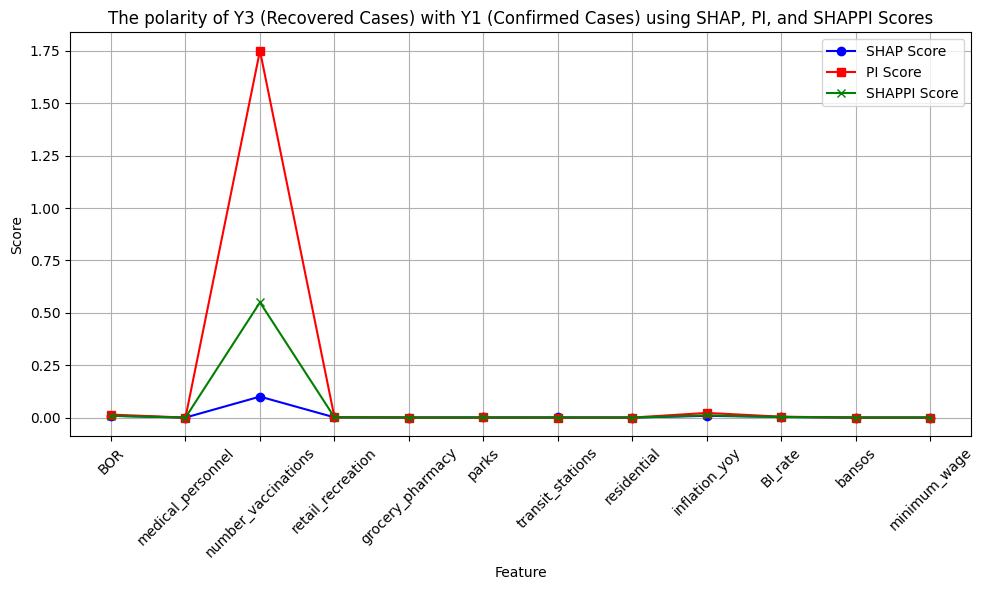

In [77]:
plot_shap_pi_shappi(pol_anal_Y3_Y1, "The polarity of Y3 (Recovered Cases) with Y1 (Confirmed Cases) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-212247440>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


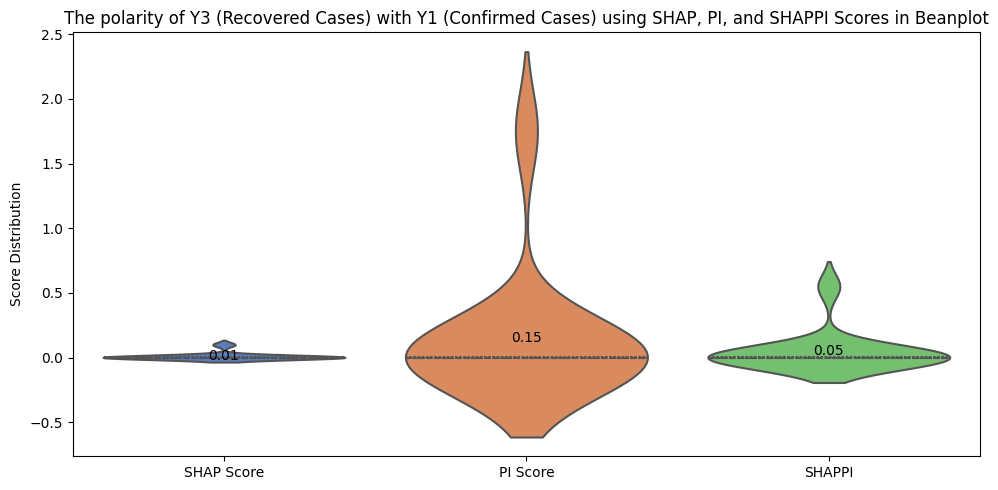

In [78]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y3_Y1, "The polarity of Y3 (Recovered Cases) with Y1 (Confirmed Cases) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [79]:
print("Analysis SHAP Y3 Polarity with Y2:")
pol_anal_Y3_Y2, perm_imp_Y3_Y2 = analysis_SHAP(shap_values_Y3, X_features_name, pol_Y2, regrY3, X_Y3, Y3)

Analysis SHAP Y3 Polarity with Y2:
---------------------------------------------------------------
Mean =  [7.4160680e-02 4.7582289e-05 8.8334119e-01 8.4658796e-03 1.8597161e-03
 3.1092123e-03 3.1732041e-03 1.0362838e-03 7.2641946e-02 2.7013481e-02
 0.0000000e+00 0.0000000e+00]
Condition =  [array([ True, False, False, False, False,  True,  True, False,  True,
        True,  True,  True])]
--------------------------------------------------------------- 



In [80]:
print("Analysis SHAPPI Y3 Polarity with Y2:")
shappi_Y3_Y2 = analysis_SHAPPI(pol_anal_Y3_Y2, perm_imp_Y3_Y2)
shappi_Y3_Y2

Analysis SHAPPI Y3 Polarity with Y2:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  6.156646e-02  0.550000
8         inflation_yoy  Positive  1.023702e-03  0.010401
0                   BOR  Positive  6.781678e-04  0.008219
9               BI_rate  Positive  1.769550e-04  0.002699
3     retail_recreation  Positive  2.419537e-04  0.001009
5                 parks  Positive  1.178649e-05  0.000247
6      transit_stations  Positive  1.360273e-05  0.000225
4      grocery_pharmacy  Positive  9.184425e-06  0.000135
7           residential  Positive  5.190862e-06  0.000072
1     medical_personnel  Positive  9.845689e-08  0.000003
10               bansos  Positive  0.000000e+00  0.000000
11         minimum_wage  Positive  0.000000e+00  0.000000

In [81]:
pol_anal_Y3_Y2

Feature  SHAP Average  SHAP Score  Polarity      PI Score  \
0                   BOR      0.025338    0.008395  Positive  1.408665e-02   
1     medical_personnel     -0.000039    0.000005  Positive  2.262291e-07   
2   number_vaccinations     -0.012394    0.100000  Positive  1.751420e+00   
3     retail_recreation     -0.001765    0.000958  Positive  1.857290e-03   
4      grocery_pharmacy     -0.000142    0.000211  Positive  1.053411e-04   
5                 parks      0.000247    0.000352  Positive  2.492974e-04   
6      transit_stations      0.000539    0.000359  Positive  1.587317e-04   
7           residential     -0.000118    0.000117  Positive  4.576244e-05   
8         inflation_yoy      0.000233    0.008224  Positive  2.203082e-02   
9               BI_rate      0.008856    0.003058  Positive  4.099887e-03   
10               bansos      0.000000    0.000000  Positive  0.000000e+00   
11         minimum_wage      0.000000    0.000000  Positive  0.000000e+00   

        PI Error    SHAPPI  
0   6.781678e-04  0.008219  
1   9.845689e-08  0.000003  
2   6.156646e-02  0.550000  
3   2.419537e-04  0.001009  
4   9.184425e-06  0.000135  
5   1.178649e-05  0.000247  
6   1.360273e-05  0.000225  
7   5.190862e-06  0.000072  
8   1.023702e-03  0.010401  
9   1.769550e-04  0.002699  
10  0.000000e+00  0.000000  
11  0.000000e+00  0.000000

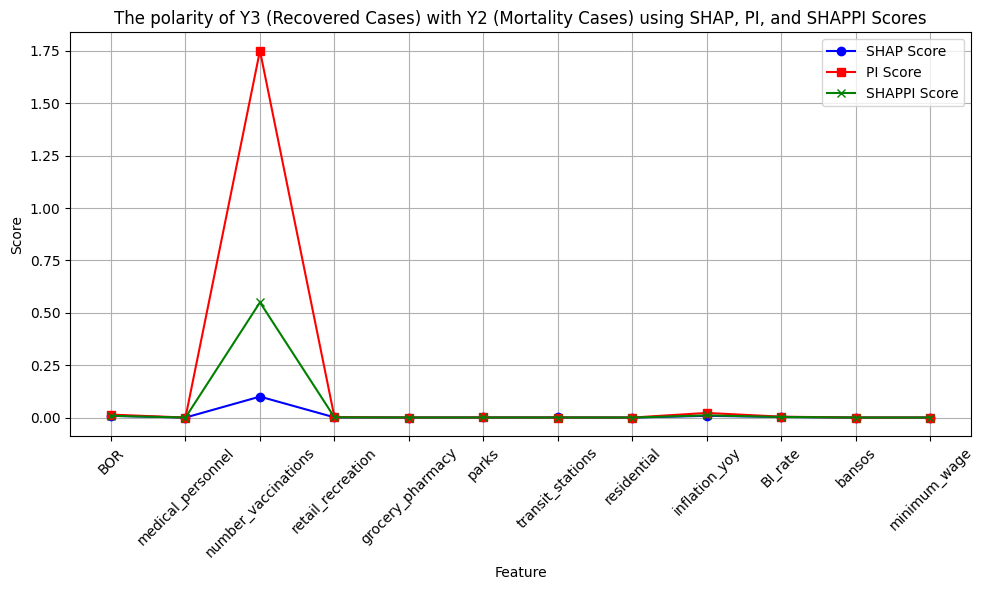

In [82]:
plot_shap_pi_shappi(pol_anal_Y3_Y2, "The polarity of Y3 (Recovered Cases) with Y2 (Mortality Cases) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-212247440>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


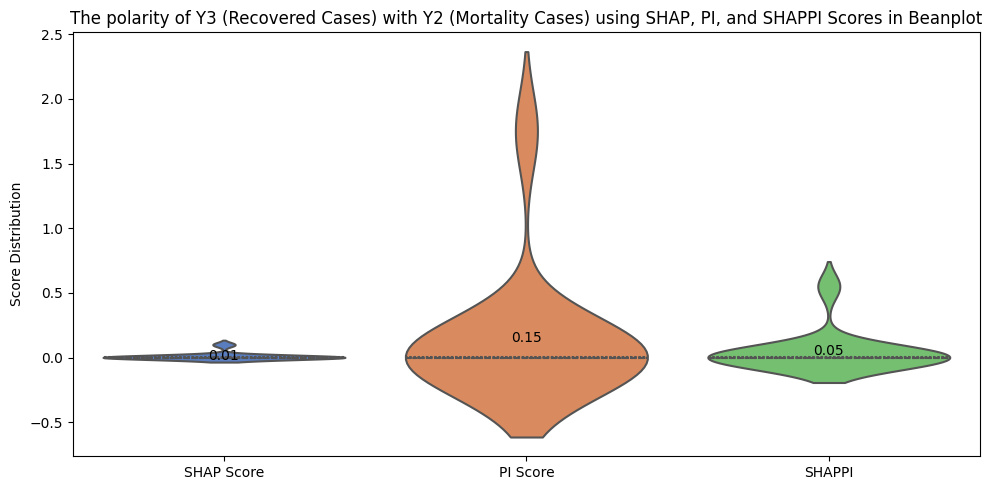

In [83]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y3_Y2, "The polarity of Y3 (Recovered Cases) with Y2 (Mortality Cases) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [84]:
print("Analysis SHAP Y3 Polarity with Y4:")
pol_anal_Y3_Y4, perm_imp_Y3_Y4 = analysis_SHAP(shap_values_Y3, X_features_name, pol_Y4, regrY3, X_Y3, Y3)

Analysis SHAP Y3 Polarity with Y4:
---------------------------------------------------------------
Mean =  [7.4160680e-02 4.7582289e-05 8.8334119e-01 8.4658796e-03 1.8597161e-03
 3.1092123e-03 3.1732041e-03 1.0362838e-03 7.2641946e-02 2.7013481e-02
 0.0000000e+00 0.0000000e+00]
Condition =  [array([ True, False, False, False, False,  True,  True, False,  True,
        True,  True,  True])]
--------------------------------------------------------------- 



In [85]:
print("Analysis SHAPPI Y3 Polarity with Y4:")
shappi_Y3_Y4 = analysis_SHAPPI(pol_anal_Y3_Y4, perm_imp_Y3_Y4)
shappi_Y3_Y4

Analysis SHAPPI Y3 Polarity with Y4:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  6.156646e-02  0.550000
8         inflation_yoy  Positive  1.023702e-03  0.010401
0                   BOR  Positive  6.781678e-04  0.008219
9               BI_rate  Positive  1.769550e-04  0.002699
3     retail_recreation  Positive  2.419537e-04  0.001009
5                 parks  Positive  1.178649e-05  0.000247
6      transit_stations  Positive  1.360273e-05  0.000225
4      grocery_pharmacy  Positive  9.184425e-06  0.000135
7           residential  Positive  5.190862e-06  0.000072
1     medical_personnel  Positive  9.845689e-08  0.000003
10               bansos  Positive  0.000000e+00  0.000000
11         minimum_wage  Positive  0.000000e+00  0.000000

In [86]:
pol_anal_Y3_Y4

Feature  SHAP Average  SHAP Score  Polarity      PI Score  \
0                   BOR      0.025338    0.008395  Positive  1.408665e-02   
1     medical_personnel     -0.000039    0.000005  Positive  2.262291e-07   
2   number_vaccinations     -0.012394    0.100000  Positive  1.751420e+00   
3     retail_recreation     -0.001765    0.000958  Positive  1.857290e-03   
4      grocery_pharmacy     -0.000142    0.000211  Positive  1.053411e-04   
5                 parks      0.000247    0.000352  Positive  2.492974e-04   
6      transit_stations      0.000539    0.000359  Positive  1.587317e-04   
7           residential     -0.000118    0.000117  Positive  4.576244e-05   
8         inflation_yoy      0.000233    0.008224  Positive  2.203082e-02   
9               BI_rate      0.008856    0.003058  Positive  4.099887e-03   
10               bansos      0.000000    0.000000  Positive  0.000000e+00   
11         minimum_wage      0.000000    0.000000  Positive  0.000000e+00   

        PI Error    SHAPPI  
0   6.781678e-04  0.008219  
1   9.845689e-08  0.000003  
2   6.156646e-02  0.550000  
3   2.419537e-04  0.001009  
4   9.184425e-06  0.000135  
5   1.178649e-05  0.000247  
6   1.360273e-05  0.000225  
7   5.190862e-06  0.000072  
8   1.023702e-03  0.010401  
9   1.769550e-04  0.002699  
10  0.000000e+00  0.000000  
11  0.000000e+00  0.000000

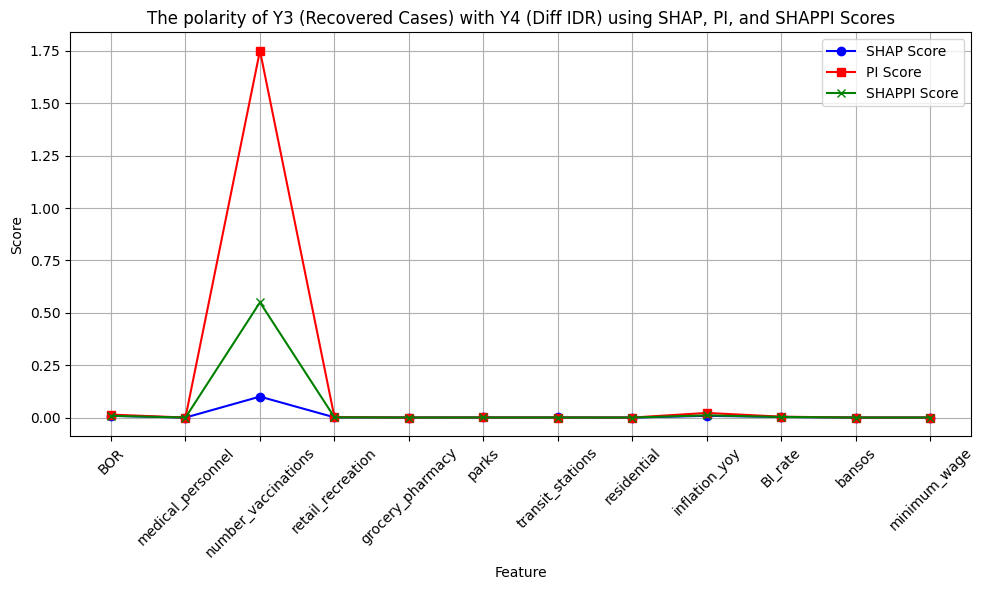

In [87]:
plot_shap_pi_shappi(pol_anal_Y3_Y4, "The polarity of Y3 (Recovered Cases) with Y4 (Diff IDR) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-212247440>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


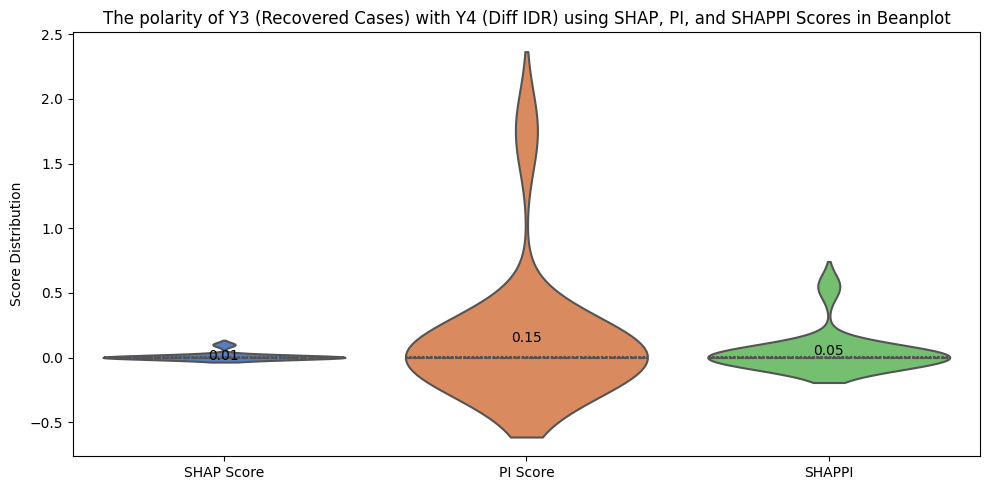

In [88]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y3_Y4, "The polarity of Y3 (Recovered Cases) with Y4 (Diff IDR) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [89]:
print("Analysis SHAP Y3 Polarity with Y5:")
pol_anal_Y3_Y5, perm_imp_Y3_Y5 = analysis_SHAP(shap_values_Y3, X_features_name, pol_Y5, regrY3, X_Y3, Y3)

Analysis SHAP Y3 Polarity with Y5:
---------------------------------------------------------------
Mean =  [7.4160680e-02 4.7582289e-05 8.8334119e-01 8.4658796e-03 1.8597161e-03
 3.1092123e-03 3.1732041e-03 1.0362838e-03 7.2641946e-02 2.7013481e-02
 0.0000000e+00 0.0000000e+00]
Condition =  [array([ True, False, False, False, False,  True,  True, False,  True,
        True,  True,  True])]
--------------------------------------------------------------- 



In [90]:
print("Analysis SHAPPI Y3 Polarity with Y5:")
shappi_Y3_Y5 = analysis_SHAPPI(pol_anal_Y3_Y5, perm_imp_Y3_Y5)
shappi_Y3_Y5

Analysis SHAPPI Y3 Polarity with Y5:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  6.156646e-02  0.550000
8         inflation_yoy  Positive  1.023702e-03  0.010401
0                   BOR  Positive  6.781678e-04  0.008219
9               BI_rate  Positive  1.769550e-04  0.002699
3     retail_recreation  Positive  2.419537e-04  0.001009
5                 parks  Positive  1.178649e-05  0.000247
6      transit_stations  Positive  1.360273e-05  0.000225
4      grocery_pharmacy  Positive  9.184425e-06  0.000135
7           residential  Positive  5.190862e-06  0.000072
1     medical_personnel  Positive  9.845689e-08  0.000003
10               bansos  Positive  0.000000e+00  0.000000
11         minimum_wage  Positive  0.000000e+00  0.000000

In [91]:
pol_anal_Y3_Y5

Feature  SHAP Average  SHAP Score  Polarity      PI Score  \
0                   BOR      0.025338    0.008395  Positive  1.408665e-02   
1     medical_personnel     -0.000039    0.000005  Positive  2.262291e-07   
2   number_vaccinations     -0.012394    0.100000  Positive  1.751420e+00   
3     retail_recreation     -0.001765    0.000958  Positive  1.857290e-03   
4      grocery_pharmacy     -0.000142    0.000211  Positive  1.053411e-04   
5                 parks      0.000247    0.000352  Positive  2.492974e-04   
6      transit_stations      0.000539    0.000359  Positive  1.587317e-04   
7           residential     -0.000118    0.000117  Positive  4.576244e-05   
8         inflation_yoy      0.000233    0.008224  Positive  2.203082e-02   
9               BI_rate      0.008856    0.003058  Positive  4.099887e-03   
10               bansos      0.000000    0.000000  Positive  0.000000e+00   
11         minimum_wage      0.000000    0.000000  Positive  0.000000e+00   

        PI Error    SHAPPI  
0   6.781678e-04  0.008219  
1   9.845689e-08  0.000003  
2   6.156646e-02  0.550000  
3   2.419537e-04  0.001009  
4   9.184425e-06  0.000135  
5   1.178649e-05  0.000247  
6   1.360273e-05  0.000225  
7   5.190862e-06  0.000072  
8   1.023702e-03  0.010401  
9   1.769550e-04  0.002699  
10  0.000000e+00  0.000000  
11  0.000000e+00  0.000000

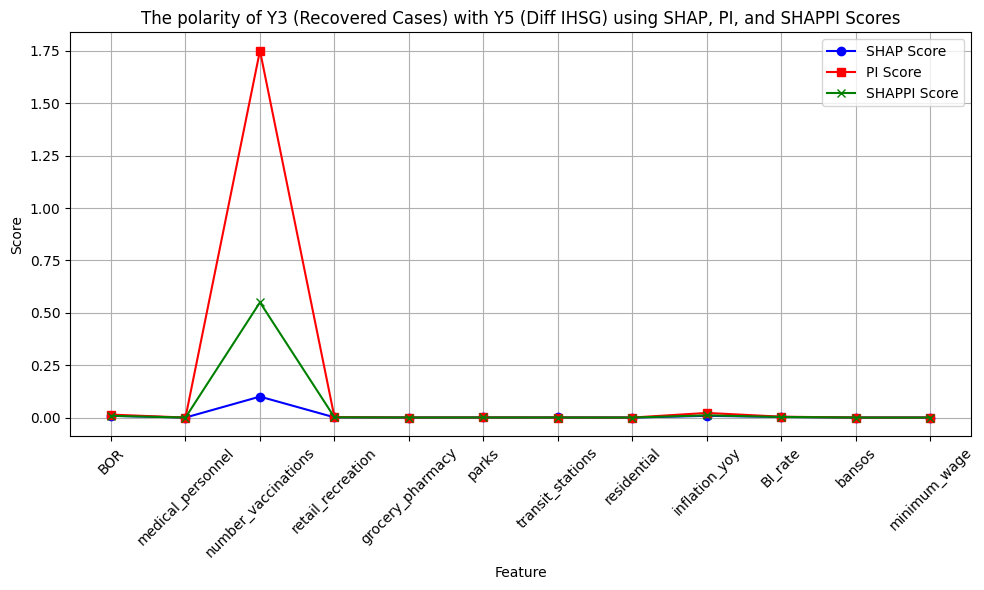

In [92]:
plot_shap_pi_shappi(pol_anal_Y3_Y5, "The polarity of Y3 (Recovered Cases) with Y5 (Diff IHSG) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-212247440>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


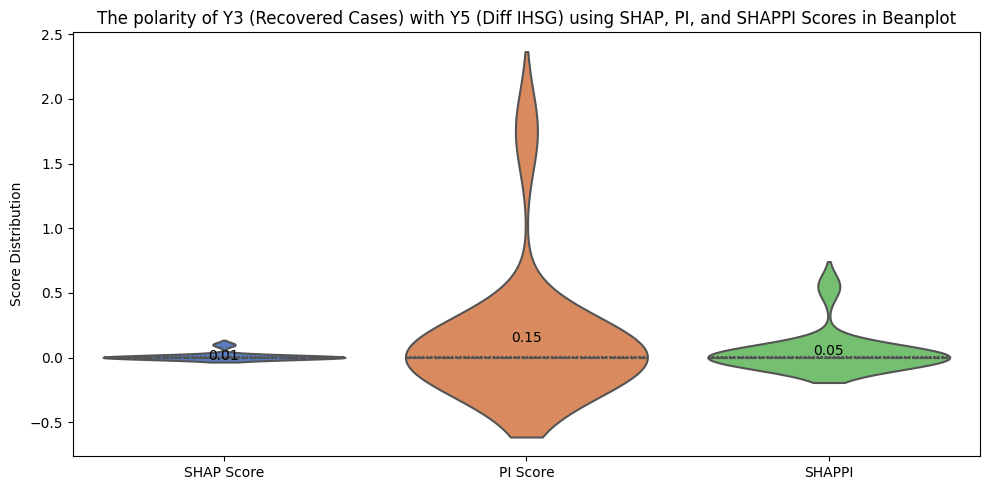

In [93]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y3_Y5, "The polarity of Y3 (Recovered Cases) with Y5 (Diff IHSG) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [94]:
print("Analysis SHAP Y3 Polarity with Y6:")
pol_anal_Y3_Y6, perm_imp_Y3_Y6 = analysis_SHAP(shap_values_Y3, X_features_name, pol_Y6, regrY3, X_Y3, Y3)

Analysis SHAP Y3 Polarity with Y6:
---------------------------------------------------------------
Mean =  [7.4160680e-02 4.7582289e-05 8.8334119e-01 8.4658796e-03 1.8597161e-03
 3.1092123e-03 3.1732041e-03 1.0362838e-03 7.2641946e-02 2.7013481e-02
 0.0000000e+00 0.0000000e+00]
Condition =  [array([ True, False, False, False, False,  True,  True, False,  True,
        True,  True,  True])]
--------------------------------------------------------------- 



In [95]:
print("Analysis SHAPPI Y3 Polarity with Y6:")
shappi_Y3_Y6 = analysis_SHAPPI(pol_anal_Y3_Y6, perm_imp_Y3_Y6)
shappi_Y3_Y6

Analysis SHAPPI Y3 Polarity with Y6:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  6.156646e-02  0.550000
8         inflation_yoy  Positive  1.023702e-03  0.010401
0                   BOR  Positive  6.781678e-04  0.008219
9               BI_rate  Positive  1.769550e-04  0.002699
3     retail_recreation  Positive  2.419537e-04  0.001009
5                 parks  Positive  1.178649e-05  0.000247
6      transit_stations  Positive  1.360273e-05  0.000225
4      grocery_pharmacy  Positive  9.184425e-06  0.000135
7           residential  Positive  5.190862e-06  0.000072
1     medical_personnel  Positive  9.845689e-08  0.000003
10               bansos  Positive  0.000000e+00  0.000000
11         minimum_wage  Positive  0.000000e+00  0.000000

In [96]:
pol_anal_Y3_Y6

Feature  SHAP Average  SHAP Score  Polarity      PI Score  \
0                   BOR      0.025338    0.008395  Positive  1.408665e-02   
1     medical_personnel     -0.000039    0.000005  Positive  2.262291e-07   
2   number_vaccinations     -0.012394    0.100000  Positive  1.751420e+00   
3     retail_recreation     -0.001765    0.000958  Positive  1.857290e-03   
4      grocery_pharmacy     -0.000142    0.000211  Positive  1.053411e-04   
5                 parks      0.000247    0.000352  Positive  2.492974e-04   
6      transit_stations      0.000539    0.000359  Positive  1.587317e-04   
7           residential     -0.000118    0.000117  Positive  4.576244e-05   
8         inflation_yoy      0.000233    0.008224  Positive  2.203082e-02   
9               BI_rate      0.008856    0.003058  Positive  4.099887e-03   
10               bansos      0.000000    0.000000  Positive  0.000000e+00   
11         minimum_wage      0.000000    0.000000  Positive  0.000000e+00   

        PI Error    SHAPPI  
0   6.781678e-04  0.008219  
1   9.845689e-08  0.000003  
2   6.156646e-02  0.550000  
3   2.419537e-04  0.001009  
4   9.184425e-06  0.000135  
5   1.178649e-05  0.000247  
6   1.360273e-05  0.000225  
7   5.190862e-06  0.000072  
8   1.023702e-03  0.010401  
9   1.769550e-04  0.002699  
10  0.000000e+00  0.000000  
11  0.000000e+00  0.000000

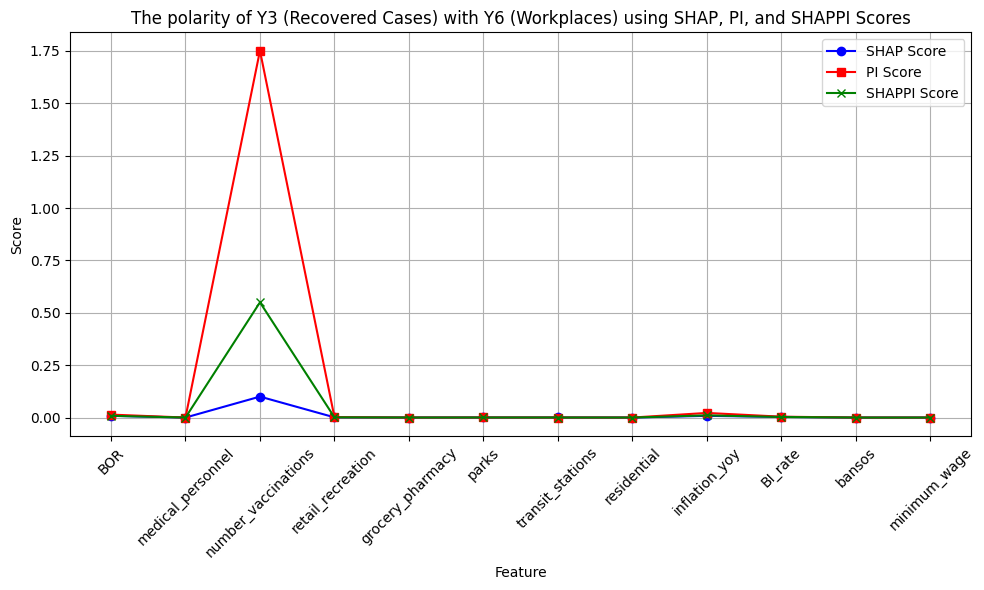

In [97]:
plot_shap_pi_shappi(pol_anal_Y3_Y6, "The polarity of Y3 (Recovered Cases) with Y6 (Workplaces) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-212247440>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


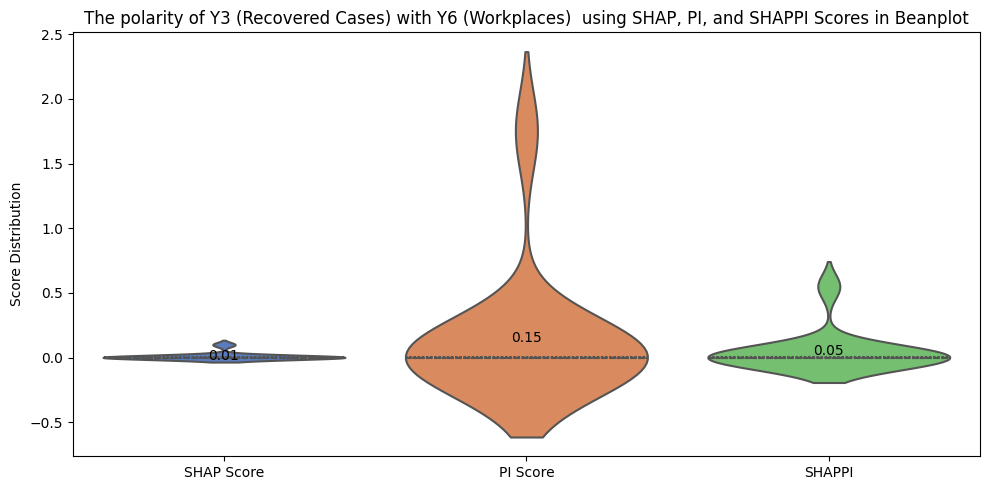

In [98]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y3_Y6, "The polarity of Y3 (Recovered Cases) with Y6 (Workplaces)  using SHAP, PI, and SHAPPI Scores in Beanplot")

In [99]:
print("Analysis SHAP Y4 Polarity with Y1:")
pol_anal_Y4_Y1, perm_imp_Y4_Y1 = analysis_SHAP(shap_values_Y4, X_features_name, pol_Y1, regrY4, X_Y4, Y4)

Analysis SHAP Y4 Polarity with Y1:
---------------------------------------------------------------
Mean =  [0.0068955  0.00045943 0.0861159  0.01881132 0.07204203 0.22542131
 0.3992333  0.161998   0.20505948 0.0174467  0.         0.        ]
Condition =  [array([False,  True, False, False, False,  True,  True, False, False,
       False,  True,  True])]
--------------------------------------------------------------- 



In [100]:
print("Analysis SHAPPI Y4 Polarity with Y1:")
shappi_Y4_Y1 = analysis_SHAPPI(pol_anal_Y4_Y1, perm_imp_Y4_Y1)
shappi_Y4_Y1

Analysis SHAPPI Y4 Polarity with Y1:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
6      transit_stations  Positive  0.029932  0.550000
5                 parks  Positive  0.008345  0.182283
8         inflation_yoy  Positive  0.007588  0.163074
7           residential  Positive  0.010085  0.147716
4      grocery_pharmacy  Positive  0.012008  0.115858
2   number_vaccinations  Positive  0.008141  0.106788
3     retail_recreation  Positive  0.001040  0.013256
9               BI_rate  Positive  0.000767  0.007562
0                   BOR  Positive  0.000736  0.002167
1     medical_personnel  Positive  0.000011  0.000095
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [101]:
pol_anal_Y4_Y1

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.002099    0.001727  Positive  0.001858   
1     medical_personnel      0.000296    0.000115  Positive  0.000053   
2   number_vaccinations     -0.033406    0.021570  Positive  0.136830   
3     retail_recreation     -0.004080    0.004712  Positive  0.015536   
4      grocery_pharmacy     -0.058586    0.018045  Positive  0.152270   
5                 parks      0.080237    0.056464  Positive  0.219565   
6      transit_stations      0.099421    0.100000  Positive  0.712636   
7           residential     -0.005888    0.040577  Positive  0.181619   
8         inflation_yoy     -0.043187    0.051363  Positive  0.195822   
9               BI_rate     -0.000054    0.004370  Positive  0.007664   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.000736  0.002167  
1   0.000011  0.000095  
2   0.008141  0.106788  
3   0.001040  0.013256  
4   0.012008  0.115858  
5   0.008345  0.182283  
6   0.029932  0.550000  
7   0.010085  0.147716  
8   0.007588  0.163074  
9   0.000767  0.007562  
10  0.000000  0.000000  
11  0.000000  0.000000

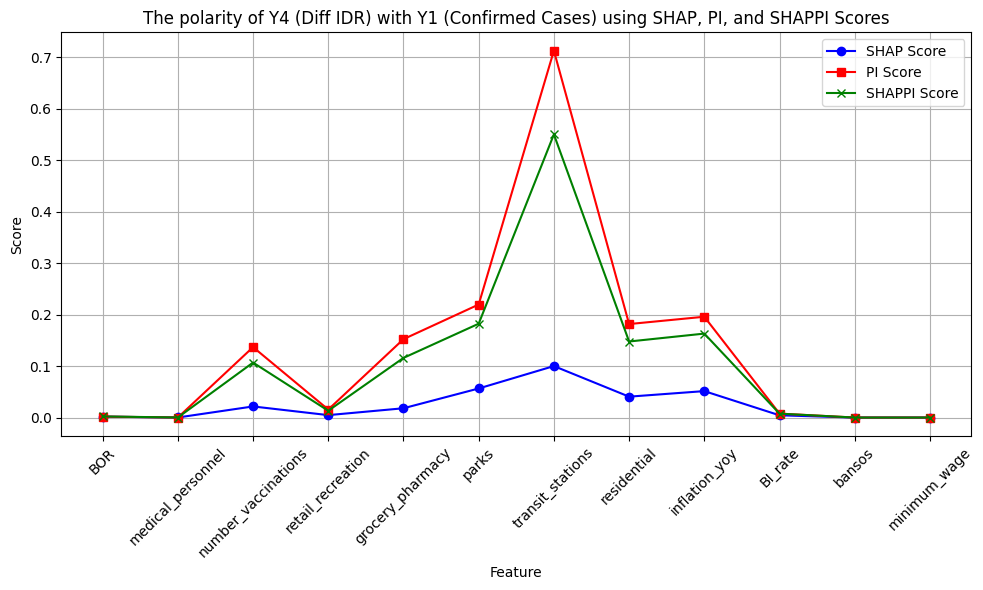

In [102]:
plot_shap_pi_shappi(pol_anal_Y4_Y1, "The polarity of Y4 (Diff IDR) with Y1 (Confirmed Cases) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-212247440>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


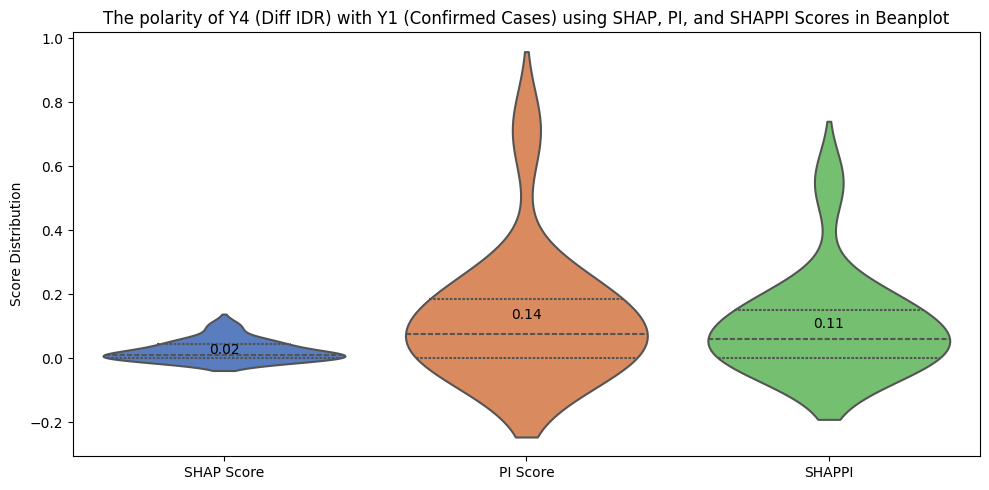

In [103]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y4_Y1, "The polarity of Y4 (Diff IDR) with Y1 (Confirmed Cases) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [104]:
print("Analysis SHAP Y4 Polarity with Y2:")
pol_anal_Y4_Y2, perm_imp_Y4_Y2 = analysis_SHAP(shap_values_Y4, X_features_name, pol_Y2, regrY4, X_Y4, Y4)

Analysis SHAP Y4 Polarity with Y2:
---------------------------------------------------------------
Mean =  [0.0068955  0.00045943 0.0861159  0.01881132 0.07204203 0.22542131
 0.3992333  0.161998   0.20505948 0.0174467  0.         0.        ]
Condition =  [array([False,  True, False, False, False,  True,  True, False, False,
       False,  True,  True])]
--------------------------------------------------------------- 



In [105]:
print("Analysis SHAPPI Y4 Polarity with Y2:")
shappi_Y4_Y2 = analysis_SHAPPI(pol_anal_Y4_Y2, perm_imp_Y4_Y2)
shappi_Y4_Y2

Analysis SHAPPI Y4 Polarity with Y2:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
6      transit_stations  Positive  0.029932  0.550000
5                 parks  Positive  0.008345  0.182283
8         inflation_yoy  Positive  0.007588  0.163074
7           residential  Positive  0.010085  0.147716
4      grocery_pharmacy  Positive  0.012008  0.115858
2   number_vaccinations  Positive  0.008141  0.106788
3     retail_recreation  Positive  0.001040  0.013256
9               BI_rate  Positive  0.000767  0.007562
0                   BOR  Positive  0.000736  0.002167
1     medical_personnel  Positive  0.000011  0.000095
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [106]:
pol_anal_Y4_Y2

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.002099    0.001727  Positive  0.001858   
1     medical_personnel      0.000296    0.000115  Positive  0.000053   
2   number_vaccinations     -0.033406    0.021570  Positive  0.136830   
3     retail_recreation     -0.004080    0.004712  Positive  0.015536   
4      grocery_pharmacy     -0.058586    0.018045  Positive  0.152270   
5                 parks      0.080237    0.056464  Positive  0.219565   
6      transit_stations      0.099421    0.100000  Positive  0.712636   
7           residential     -0.005888    0.040577  Positive  0.181619   
8         inflation_yoy     -0.043187    0.051363  Positive  0.195822   
9               BI_rate     -0.000054    0.004370  Positive  0.007664   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.000736  0.002167  
1   0.000011  0.000095  
2   0.008141  0.106788  
3   0.001040  0.013256  
4   0.012008  0.115858  
5   0.008345  0.182283  
6   0.029932  0.550000  
7   0.010085  0.147716  
8   0.007588  0.163074  
9   0.000767  0.007562  
10  0.000000  0.000000  
11  0.000000  0.000000

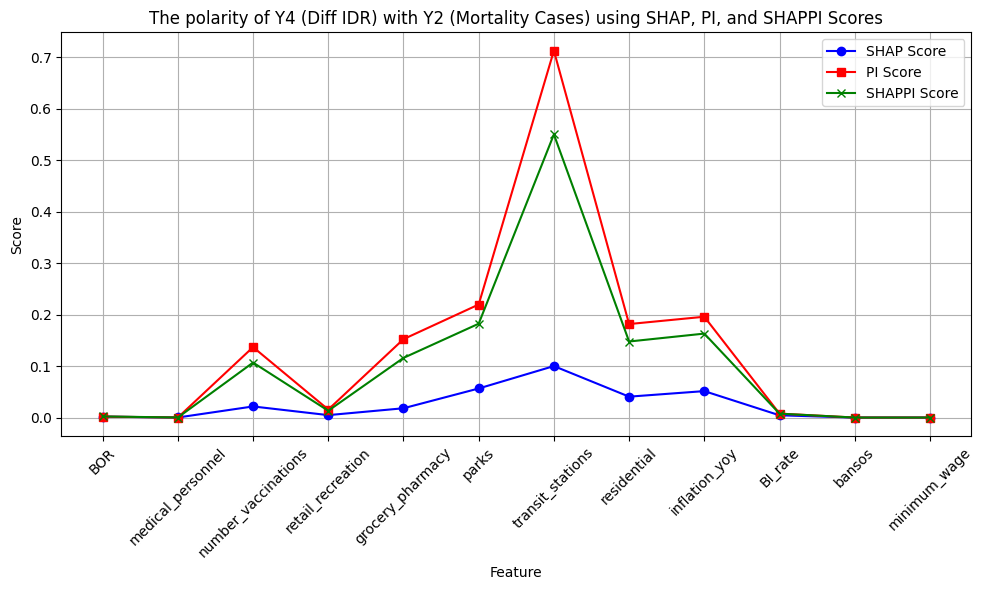

In [107]:
plot_shap_pi_shappi(pol_anal_Y4_Y2, "The polarity of Y4 (Diff IDR) with Y2 (Mortality Cases) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-212247440>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


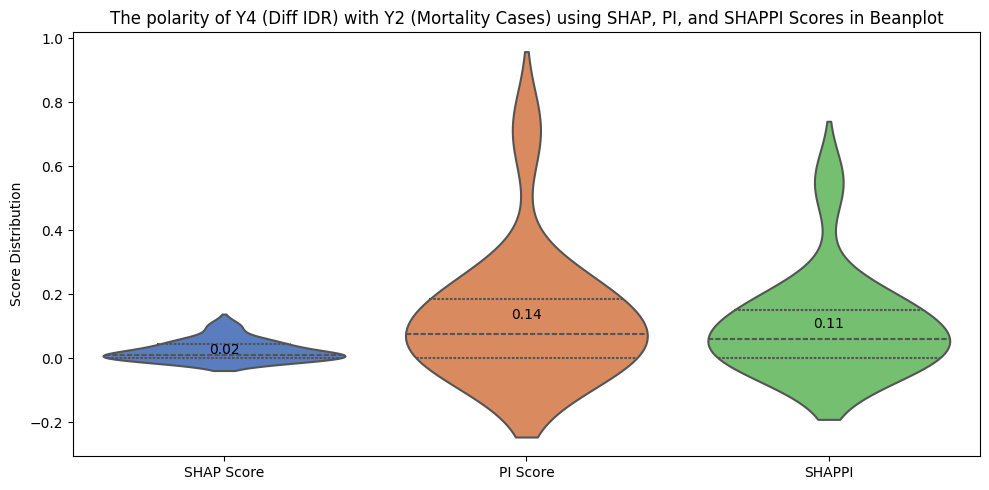

In [108]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y4_Y2, "The polarity of Y4 (Diff IDR) with Y2 (Mortality Cases) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [109]:
print("Analysis SHAP Y4 Polarity with Y3:")
pol_anal_Y4_Y3, perm_imp_Y4_Y3 = analysis_SHAP(shap_values_Y4, X_features_name, pol_Y3, regrY4, X_Y4, Y4)

Analysis SHAP Y4 Polarity with Y3:
---------------------------------------------------------------
Mean =  [0.0068955  0.00045943 0.0861159  0.01881132 0.07204203 0.22542131
 0.3992333  0.161998   0.20505948 0.0174467  0.         0.        ]
Condition =  [array([False,  True, False, False, False,  True,  True, False, False,
       False,  True,  True])]
--------------------------------------------------------------- 



In [110]:
print("Analysis SHAPPI Y4 Polarity with Y3:")
shappi_Y4_Y3 = analysis_SHAPPI(pol_anal_Y4_Y3, perm_imp_Y4_Y3)
shappi_Y4_Y3

Analysis SHAPPI Y4 Polarity with Y3:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
6      transit_stations  Positive  0.029932  0.550000
5                 parks  Positive  0.008345  0.182283
8         inflation_yoy  Positive  0.007588  0.163074
7           residential  Positive  0.010085  0.147716
4      grocery_pharmacy  Positive  0.012008  0.115858
2   number_vaccinations  Positive  0.008141  0.106788
3     retail_recreation  Positive  0.001040  0.013256
9               BI_rate  Positive  0.000767  0.007562
0                   BOR  Positive  0.000736  0.002167
1     medical_personnel  Positive  0.000011  0.000095
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [111]:
pol_anal_Y4_Y3

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.002099    0.001727  Positive  0.001858   
1     medical_personnel      0.000296    0.000115  Positive  0.000053   
2   number_vaccinations     -0.033406    0.021570  Positive  0.136830   
3     retail_recreation     -0.004080    0.004712  Positive  0.015536   
4      grocery_pharmacy     -0.058586    0.018045  Positive  0.152270   
5                 parks      0.080237    0.056464  Positive  0.219565   
6      transit_stations      0.099421    0.100000  Positive  0.712636   
7           residential     -0.005888    0.040577  Positive  0.181619   
8         inflation_yoy     -0.043187    0.051363  Positive  0.195822   
9               BI_rate     -0.000054    0.004370  Positive  0.007664   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.000736  0.002167  
1   0.000011  0.000095  
2   0.008141  0.106788  
3   0.001040  0.013256  
4   0.012008  0.115858  
5   0.008345  0.182283  
6   0.029932  0.550000  
7   0.010085  0.147716  
8   0.007588  0.163074  
9   0.000767  0.007562  
10  0.000000  0.000000  
11  0.000000  0.000000

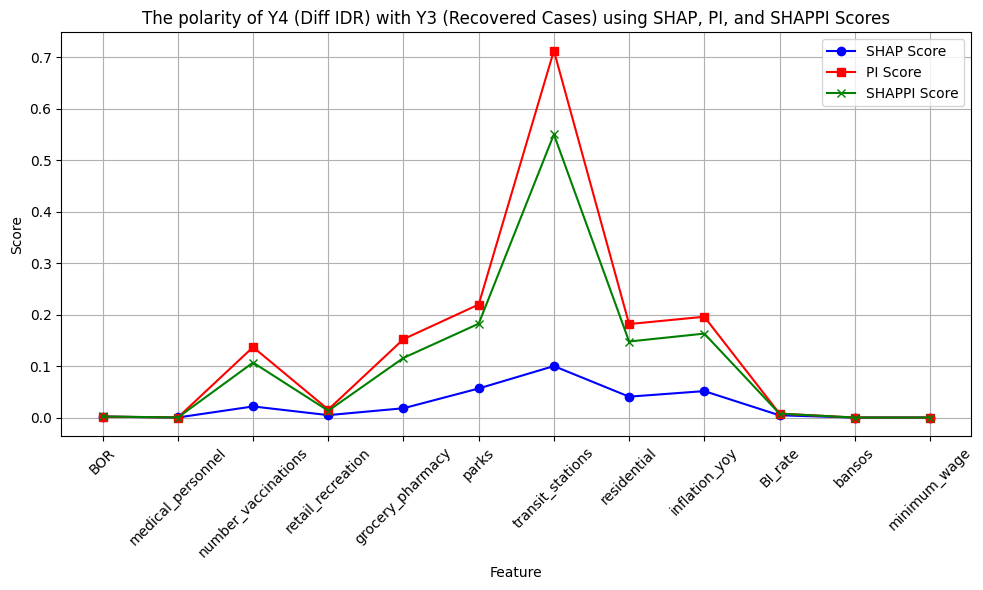

In [112]:
plot_shap_pi_shappi(pol_anal_Y4_Y3, "The polarity of Y4 (Diff IDR) with Y3 (Recovered Cases) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-212247440>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


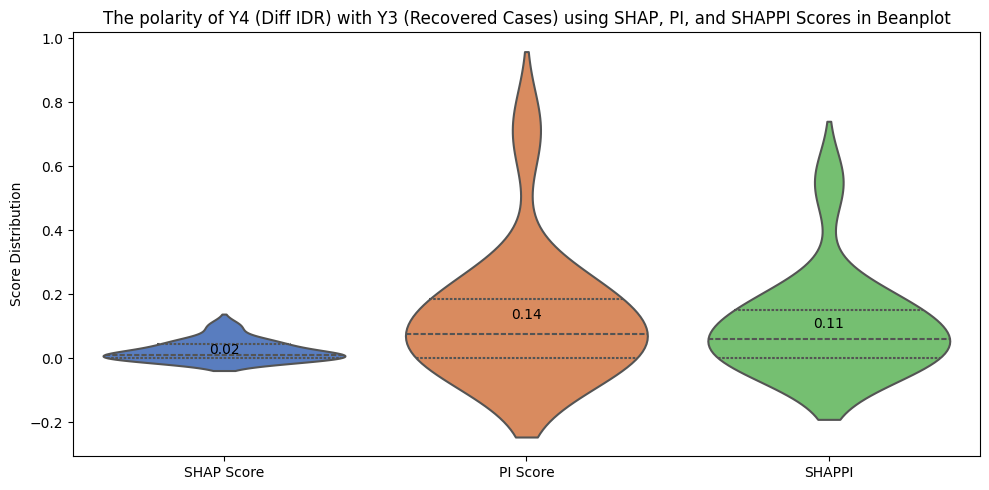

In [113]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y4_Y3, "The polarity of Y4 (Diff IDR) with Y3 (Recovered Cases) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [114]:
print("Analysis SHAP Y4 Polarity with Y5:")
pol_anal_Y4_Y5, perm_imp_Y4_Y5 = analysis_SHAP(shap_values_Y4, X_features_name, pol_Y5, regrY4, X_Y4, Y4)

Analysis SHAP Y4 Polarity with Y5:
---------------------------------------------------------------
Mean =  [0.0068955  0.00045943 0.0861159  0.01881132 0.07204203 0.22542131
 0.3992333  0.161998   0.20505948 0.0174467  0.         0.        ]
Condition =  [array([False,  True, False, False, False,  True,  True, False, False,
       False,  True,  True])]
--------------------------------------------------------------- 



In [115]:
print("Analysis SHAPPI Y4 Polarity with Y5:")
shappi_Y4_Y5 = analysis_SHAPPI(pol_anal_Y4_Y5, perm_imp_Y4_Y5)
shappi_Y4_Y5

Analysis SHAPPI Y4 Polarity with Y5:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
6      transit_stations  Positive  0.029932  0.550000
5                 parks  Positive  0.008345  0.182283
8         inflation_yoy  Positive  0.007588  0.163074
7           residential  Positive  0.010085  0.147716
4      grocery_pharmacy  Positive  0.012008  0.115858
2   number_vaccinations  Positive  0.008141  0.106788
3     retail_recreation  Positive  0.001040  0.013256
9               BI_rate  Positive  0.000767  0.007562
0                   BOR  Positive  0.000736  0.002167
1     medical_personnel  Positive  0.000011  0.000095
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [116]:
pol_anal_Y4_Y5

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.002099    0.001727  Positive  0.001858   
1     medical_personnel      0.000296    0.000115  Positive  0.000053   
2   number_vaccinations     -0.033406    0.021570  Positive  0.136830   
3     retail_recreation     -0.004080    0.004712  Positive  0.015536   
4      grocery_pharmacy     -0.058586    0.018045  Positive  0.152270   
5                 parks      0.080237    0.056464  Positive  0.219565   
6      transit_stations      0.099421    0.100000  Positive  0.712636   
7           residential     -0.005888    0.040577  Positive  0.181619   
8         inflation_yoy     -0.043187    0.051363  Positive  0.195822   
9               BI_rate     -0.000054    0.004370  Positive  0.007664   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.000736  0.002167  
1   0.000011  0.000095  
2   0.008141  0.106788  
3   0.001040  0.013256  
4   0.012008  0.115858  
5   0.008345  0.182283  
6   0.029932  0.550000  
7   0.010085  0.147716  
8   0.007588  0.163074  
9   0.000767  0.007562  
10  0.000000  0.000000  
11  0.000000  0.000000

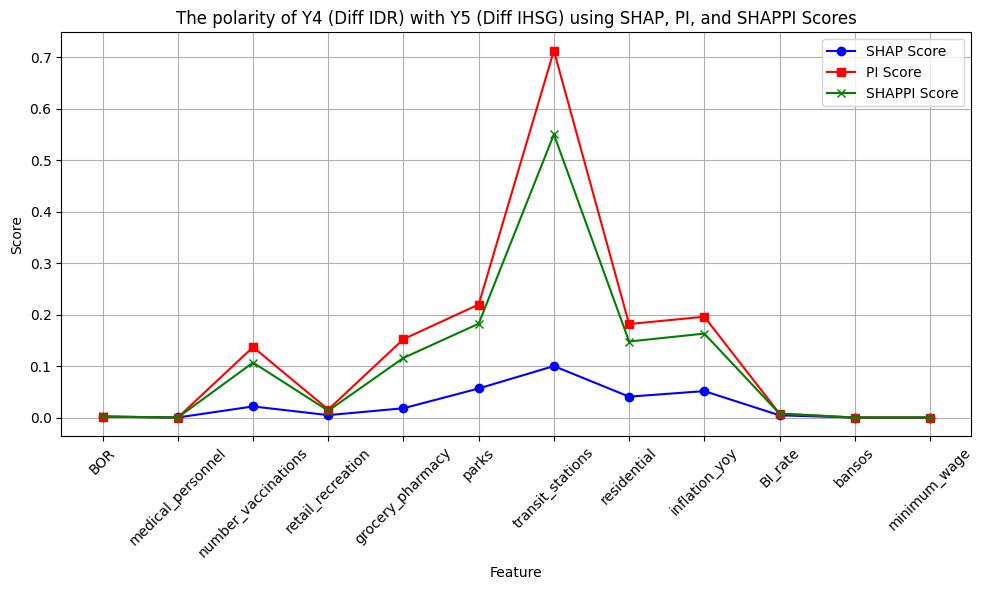

In [117]:
plot_shap_pi_shappi(pol_anal_Y4_Y5, "The polarity of Y4 (Diff IDR) with Y5 (Diff IHSG) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-212247440>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


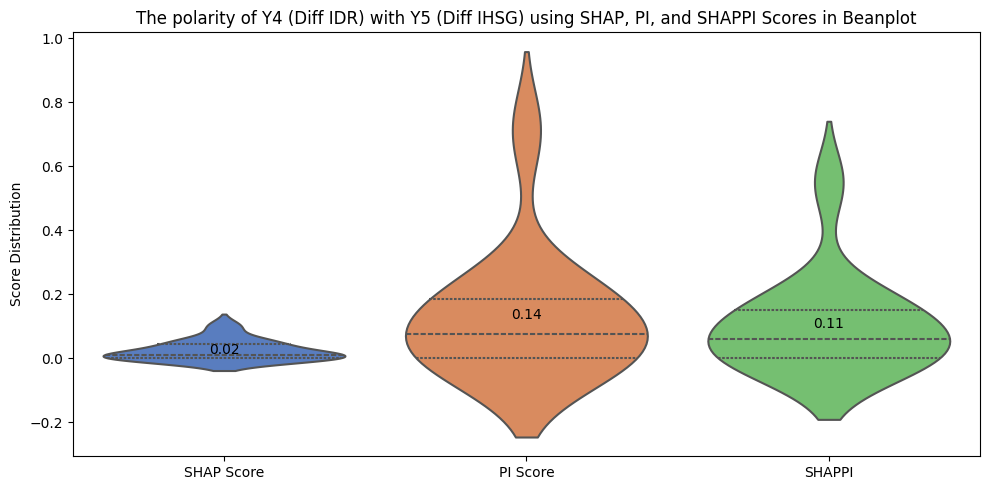

In [118]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y4_Y5, "The polarity of Y4 (Diff IDR) with Y5 (Diff IHSG) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [119]:
print("Analysis SHAP Y4 Polarity with Y6:")
pol_anal_Y4_Y6, perm_imp_Y4_Y6 = analysis_SHAP(shap_values_Y4, X_features_name, pol_Y6, regrY4, X_Y4, Y4)

Analysis SHAP Y4 Polarity with Y6:
---------------------------------------------------------------
Mean =  [0.0068955  0.00045943 0.0861159  0.01881132 0.07204203 0.22542131
 0.3992333  0.161998   0.20505948 0.0174467  0.         0.        ]
Condition =  [array([False,  True, False, False, False,  True,  True, False, False,
       False,  True,  True])]
--------------------------------------------------------------- 



In [120]:
print("Analysis SHAPPI Y4 Polarity with Y6:")
shappi_Y4_Y6 = analysis_SHAPPI(pol_anal_Y4_Y6, perm_imp_Y4_Y6)
shappi_Y4_Y6

Analysis SHAPPI Y4 Polarity with Y6:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
6      transit_stations  Positive  0.029932  0.550000
5                 parks  Positive  0.008345  0.182283
8         inflation_yoy  Positive  0.007588  0.163074
7           residential  Positive  0.010085  0.147716
4      grocery_pharmacy  Positive  0.012008  0.115858
2   number_vaccinations  Positive  0.008141  0.106788
3     retail_recreation  Positive  0.001040  0.013256
9               BI_rate  Positive  0.000767  0.007562
0                   BOR  Positive  0.000736  0.002167
1     medical_personnel  Positive  0.000011  0.000095
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [121]:
pol_anal_Y4_Y6

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.002099    0.001727  Positive  0.001858   
1     medical_personnel      0.000296    0.000115  Positive  0.000053   
2   number_vaccinations     -0.033406    0.021570  Positive  0.136830   
3     retail_recreation     -0.004080    0.004712  Positive  0.015536   
4      grocery_pharmacy     -0.058586    0.018045  Positive  0.152270   
5                 parks      0.080237    0.056464  Positive  0.219565   
6      transit_stations      0.099421    0.100000  Positive  0.712636   
7           residential     -0.005888    0.040577  Positive  0.181619   
8         inflation_yoy     -0.043187    0.051363  Positive  0.195822   
9               BI_rate     -0.000054    0.004370  Positive  0.007664   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.000736  0.002167  
1   0.000011  0.000095  
2   0.008141  0.106788  
3   0.001040  0.013256  
4   0.012008  0.115858  
5   0.008345  0.182283  
6   0.029932  0.550000  
7   0.010085  0.147716  
8   0.007588  0.163074  
9   0.000767  0.007562  
10  0.000000  0.000000  
11  0.000000  0.000000

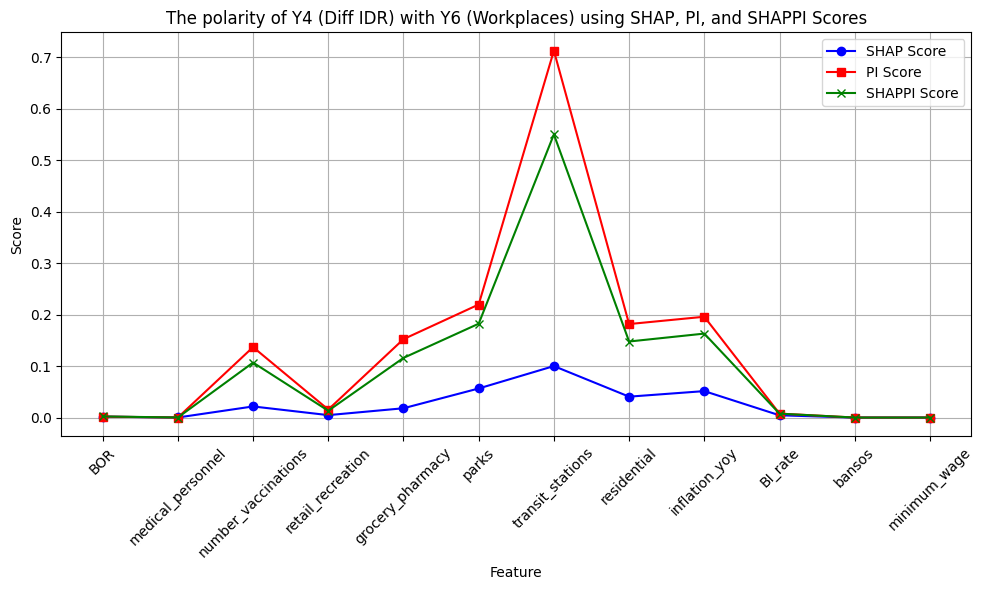

In [122]:
plot_shap_pi_shappi(pol_anal_Y4_Y6, "The polarity of Y4 (Diff IDR) with Y6 (Workplaces) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-212247440>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


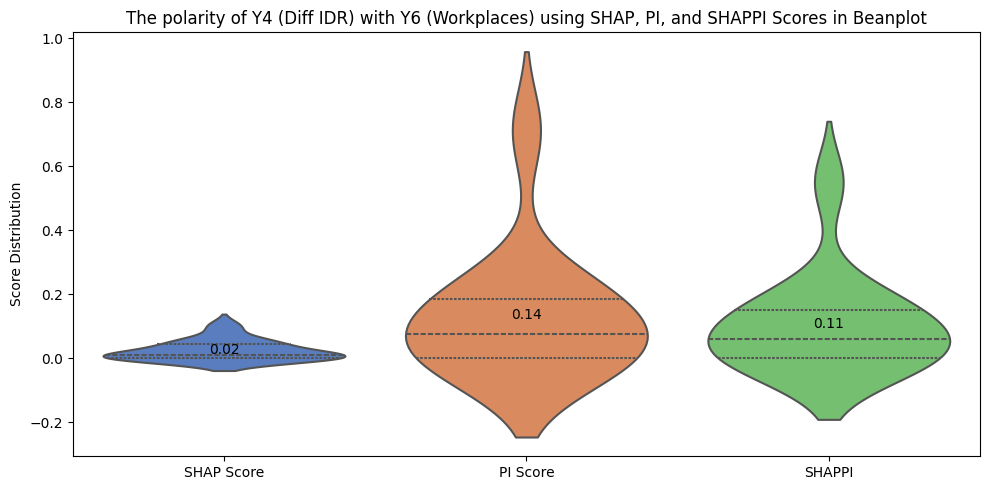

In [123]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y4_Y6, "The polarity of Y4 (Diff IDR) with Y6 (Workplaces) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [124]:
print("Analysis SHAP Y5 Polarity with Y1:")
pol_anal_Y5_Y1, perm_imp_Y5_Y1 = analysis_SHAP(shap_values_Y5, X_features_name, pol_Y1, regrY5, X_Y5, Y5)

Analysis SHAP Y5 Polarity with Y1:
---------------------------------------------------------------
Mean =  [0.0068955  0.00045943 0.0861159  0.01881132 0.07204203 0.22542131
 0.3992333  0.161998   0.20505948 0.0174467  0.         0.        ]
Condition =  [array([False,  True, False, False, False,  True,  True, False, False,
       False,  True,  True])]
--------------------------------------------------------------- 



In [125]:
print("Analysis SHAPPI Y5 Polarity with Y1:")
shappi_Y5_Y1 = analysis_SHAPPI(pol_anal_Y5_Y1, perm_imp_Y5_Y1)
shappi_Y5_Y1

Analysis SHAPPI Y5 Polarity with Y1:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
2   number_vaccinations  Positive  0.027659  0.510785
3     retail_recreation  Positive  0.032984  0.268555
5                 parks  Positive  0.023930  0.235798
8         inflation_yoy  Positive  0.030202  0.203533
4      grocery_pharmacy  Positive  0.012768  0.172986
6      transit_stations  Positive  0.013573  0.153977
7           residential  Positive  0.008432  0.113751
9               BI_rate  Positive  0.011522  0.100708
0                   BOR  Positive  0.006582  0.015781
1     medical_personnel  Positive  0.000003  0.000062
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [126]:
pol_anal_Y5_Y1

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.002099    0.001727  Positive  0.024391   
1     medical_personnel      0.000296    0.000115  Positive  0.000008   
2   number_vaccinations     -0.033406    0.021570  Positive  0.817566   
3     retail_recreation     -0.004080    0.004712  Positive  0.435270   
4      grocery_pharmacy     -0.058586    0.018045  Positive  0.268101   
5                 parks      0.080237    0.056464  Positive  0.339398   
6      transit_stations      0.099421    0.100000  Positive  0.170016   
7           residential     -0.005888    0.040577  Positive  0.152823   
8         inflation_yoy     -0.043187    0.051363  Positive  0.290810   
9               BI_rate     -0.000054    0.004370  Positive  0.161098   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.006582  0.015781  
1   0.000003  0.000062  
2   0.027659  0.510785  
3   0.032984  0.268555  
4   0.012768  0.172986  
5   0.023930  0.235798  
6   0.013573  0.153977  
7   0.008432  0.113751  
8   0.030202  0.203533  
9   0.011522  0.100708  
10  0.000000  0.000000  
11  0.000000  0.000000

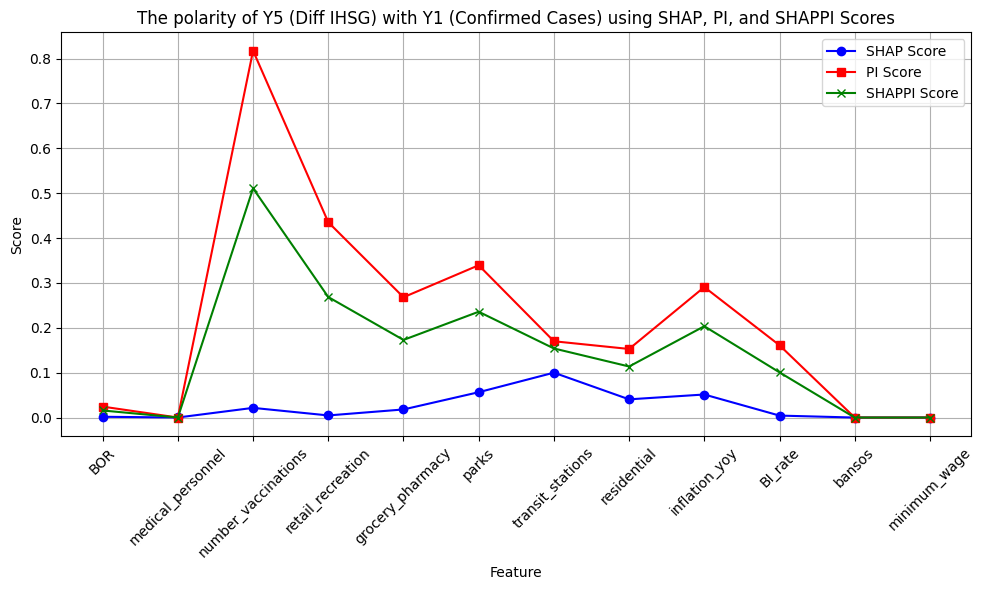

In [127]:
plot_shap_pi_shappi(pol_anal_Y5_Y1, "The polarity of Y5 (Diff IHSG) with Y1 (Confirmed Cases) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-212247440>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


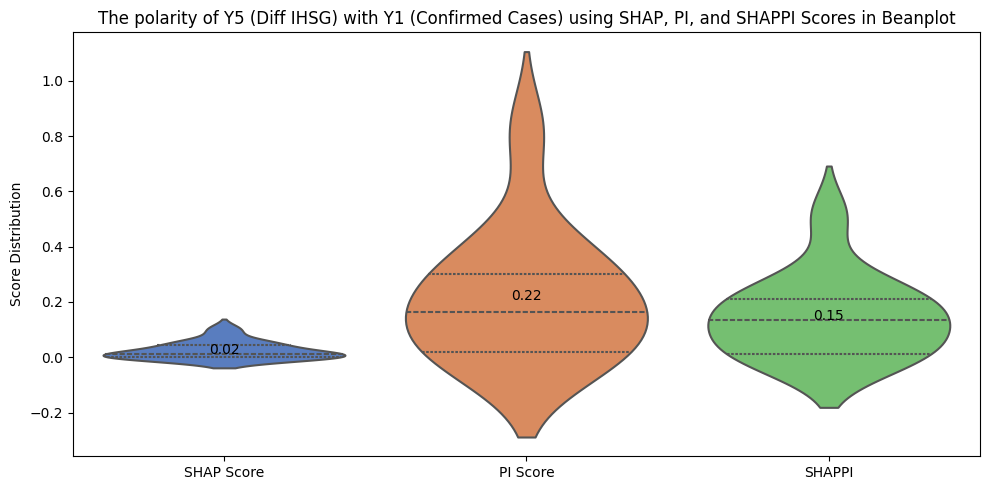

In [128]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y5_Y1, "The polarity of Y5 (Diff IHSG) with Y1 (Confirmed Cases) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [129]:
print("Analysis SHAP Y5 Polarity with Y2:")
pol_anal_Y5_Y2, perm_imp_Y5_Y2 = analysis_SHAP(shap_values_Y5, X_features_name, pol_Y2, regrY5, X_Y5, Y5)

Analysis SHAP Y5 Polarity with Y2:
---------------------------------------------------------------
Mean =  [0.0068955  0.00045943 0.0861159  0.01881132 0.07204203 0.22542131
 0.3992333  0.161998   0.20505948 0.0174467  0.         0.        ]
Condition =  [array([False,  True, False, False, False,  True,  True, False, False,
       False,  True,  True])]
--------------------------------------------------------------- 



In [130]:
print("Analysis SHAPPI Y5 Polarity with Y2:")
shappi_Y5_Y2 = analysis_SHAPPI(pol_anal_Y5_Y2, perm_imp_Y5_Y2)
shappi_Y5_Y2

Analysis SHAPPI Y5 Polarity with Y2:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
2   number_vaccinations  Positive  0.027659  0.510785
3     retail_recreation  Positive  0.032984  0.268555
5                 parks  Positive  0.023930  0.235798
8         inflation_yoy  Positive  0.030202  0.203533
4      grocery_pharmacy  Positive  0.012768  0.172986
6      transit_stations  Positive  0.013573  0.153977
7           residential  Positive  0.008432  0.113751
9               BI_rate  Positive  0.011522  0.100708
0                   BOR  Positive  0.006582  0.015781
1     medical_personnel  Positive  0.000003  0.000062
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [131]:
pol_anal_Y5_Y2

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.002099    0.001727  Positive  0.024391   
1     medical_personnel      0.000296    0.000115  Positive  0.000008   
2   number_vaccinations     -0.033406    0.021570  Positive  0.817566   
3     retail_recreation     -0.004080    0.004712  Positive  0.435270   
4      grocery_pharmacy     -0.058586    0.018045  Positive  0.268101   
5                 parks      0.080237    0.056464  Positive  0.339398   
6      transit_stations      0.099421    0.100000  Positive  0.170016   
7           residential     -0.005888    0.040577  Positive  0.152823   
8         inflation_yoy     -0.043187    0.051363  Positive  0.290810   
9               BI_rate     -0.000054    0.004370  Positive  0.161098   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.006582  0.015781  
1   0.000003  0.000062  
2   0.027659  0.510785  
3   0.032984  0.268555  
4   0.012768  0.172986  
5   0.023930  0.235798  
6   0.013573  0.153977  
7   0.008432  0.113751  
8   0.030202  0.203533  
9   0.011522  0.100708  
10  0.000000  0.000000  
11  0.000000  0.000000

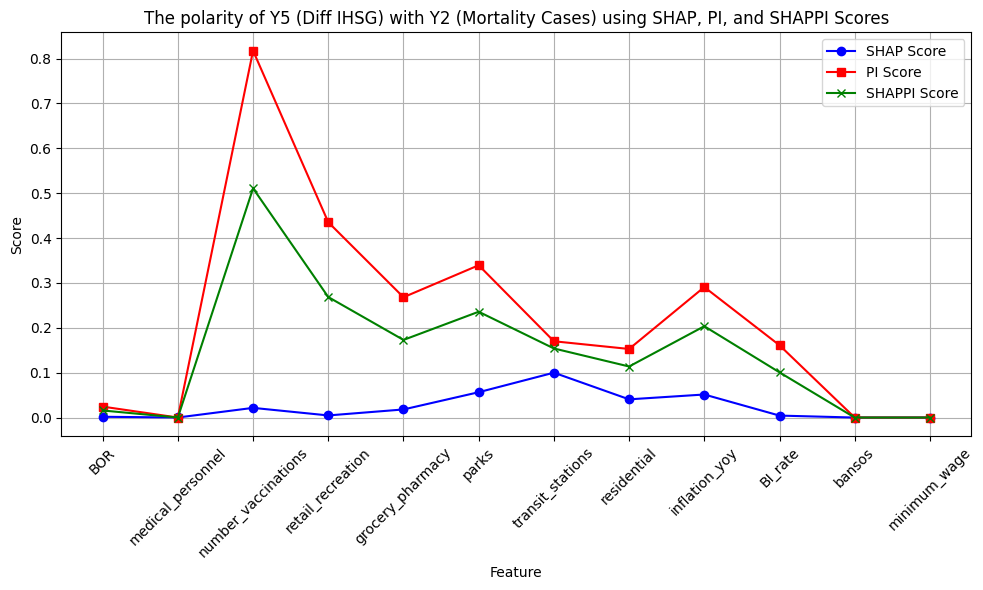

In [132]:
plot_shap_pi_shappi(pol_anal_Y5_Y2, "The polarity of Y5 (Diff IHSG) with Y2 (Mortality Cases) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-212247440>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


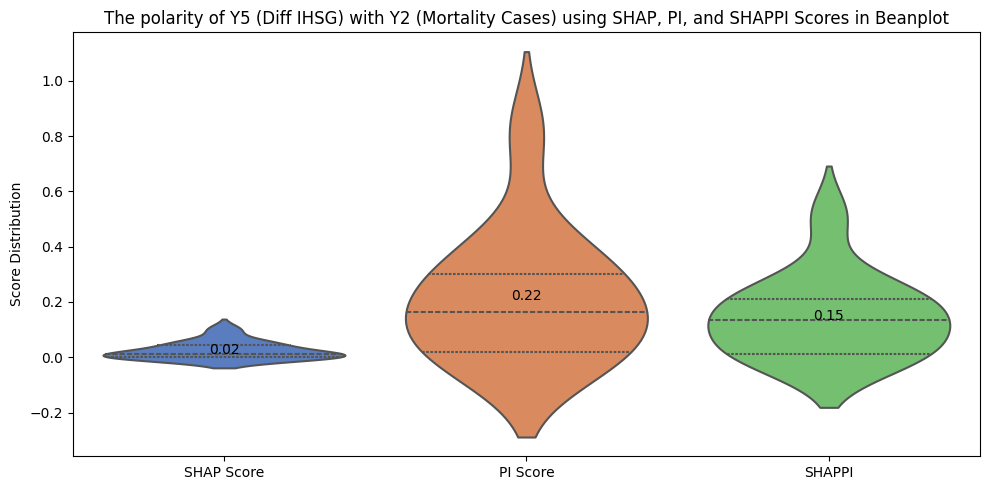

In [133]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y5_Y2, "The polarity of Y5 (Diff IHSG) with Y2 (Mortality Cases) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [134]:
print("Analysis SHAP Y5 Polarity with Y3:")
pol_anal_Y5_Y3, perm_imp_Y5_Y3 = analysis_SHAP(shap_values_Y5, X_features_name, pol_Y3, regrY5, X_Y5, Y5)

Analysis SHAP Y5 Polarity with Y3:
---------------------------------------------------------------
Mean =  [0.0068955  0.00045943 0.0861159  0.01881132 0.07204203 0.22542131
 0.3992333  0.161998   0.20505948 0.0174467  0.         0.        ]
Condition =  [array([False,  True, False, False, False,  True,  True, False, False,
       False,  True,  True])]
--------------------------------------------------------------- 



In [135]:
print("Analysis SHAPPI Y5 Polarity with Y3:")
shappi_Y5_Y3 = analysis_SHAPPI(pol_anal_Y5_Y3, perm_imp_Y5_Y3)
shappi_Y5_Y3

Analysis SHAPPI Y5 Polarity with Y3:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
2   number_vaccinations  Positive  0.027659  0.510785
3     retail_recreation  Positive  0.032984  0.268555
5                 parks  Positive  0.023930  0.235798
8         inflation_yoy  Positive  0.030202  0.203533
4      grocery_pharmacy  Positive  0.012768  0.172986
6      transit_stations  Positive  0.013573  0.153977
7           residential  Positive  0.008432  0.113751
9               BI_rate  Positive  0.011522  0.100708
0                   BOR  Positive  0.006582  0.015781
1     medical_personnel  Positive  0.000003  0.000062
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [136]:
pol_anal_Y5_Y3

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.002099    0.001727  Positive  0.024391   
1     medical_personnel      0.000296    0.000115  Positive  0.000008   
2   number_vaccinations     -0.033406    0.021570  Positive  0.817566   
3     retail_recreation     -0.004080    0.004712  Positive  0.435270   
4      grocery_pharmacy     -0.058586    0.018045  Positive  0.268101   
5                 parks      0.080237    0.056464  Positive  0.339398   
6      transit_stations      0.099421    0.100000  Positive  0.170016   
7           residential     -0.005888    0.040577  Positive  0.152823   
8         inflation_yoy     -0.043187    0.051363  Positive  0.290810   
9               BI_rate     -0.000054    0.004370  Positive  0.161098   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.006582  0.015781  
1   0.000003  0.000062  
2   0.027659  0.510785  
3   0.032984  0.268555  
4   0.012768  0.172986  
5   0.023930  0.235798  
6   0.013573  0.153977  
7   0.008432  0.113751  
8   0.030202  0.203533  
9   0.011522  0.100708  
10  0.000000  0.000000  
11  0.000000  0.000000

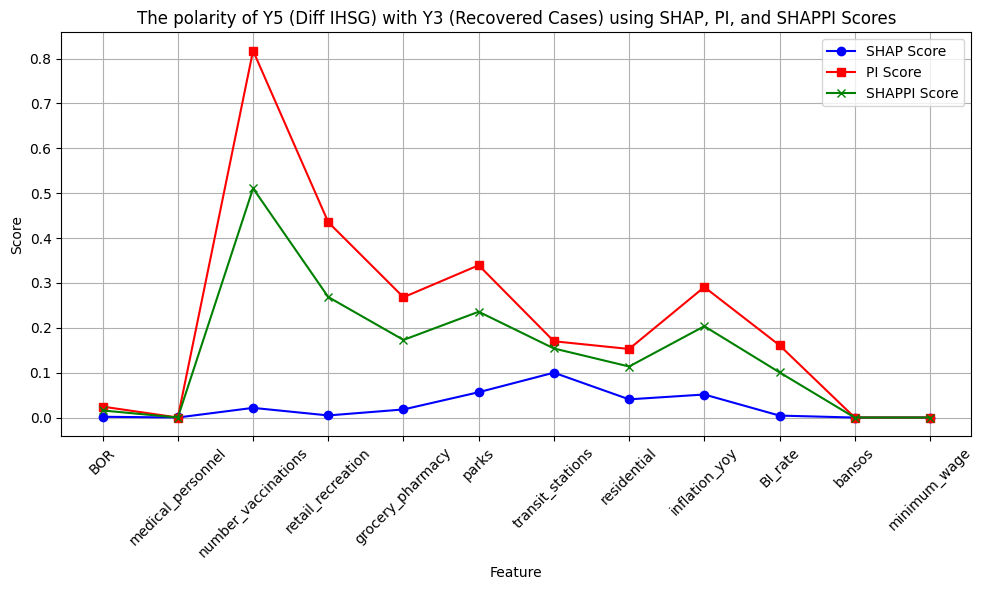

In [137]:
plot_shap_pi_shappi(pol_anal_Y5_Y3, "The polarity of Y5 (Diff IHSG) with Y3 (Recovered Cases) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-212247440>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


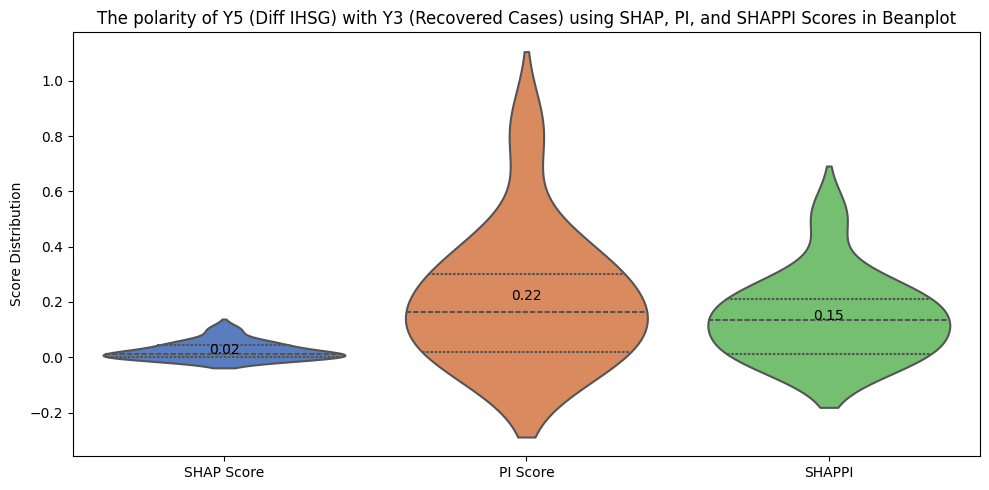

In [138]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y5_Y3, "The polarity of Y5 (Diff IHSG) with Y3 (Recovered Cases) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [139]:
print("Analysis SHAP Y5 Polarity with Y4:")
pol_anal_Y5_Y4, perm_imp_Y5_Y4 = analysis_SHAP(shap_values_Y5, X_features_name, pol_Y4, regrY5, X_Y5, Y5)

Analysis SHAP Y5 Polarity with Y4:
---------------------------------------------------------------
Mean =  [0.0068955  0.00045943 0.0861159  0.01881132 0.07204203 0.22542131
 0.3992333  0.161998   0.20505948 0.0174467  0.         0.        ]
Condition =  [array([False,  True, False, False, False,  True,  True, False, False,
       False,  True,  True])]
--------------------------------------------------------------- 



In [140]:
print("Analysis SHAPPI Y5 Polarity with Y4:")
shappi_Y5_Y4 = analysis_SHAPPI(pol_anal_Y5_Y4, perm_imp_Y5_Y4)
shappi_Y5_Y4

Analysis SHAPPI Y5 Polarity with Y4:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
2   number_vaccinations  Positive  0.027659  0.510785
3     retail_recreation  Positive  0.032984  0.268555
5                 parks  Positive  0.023930  0.235798
8         inflation_yoy  Positive  0.030202  0.203533
4      grocery_pharmacy  Positive  0.012768  0.172986
6      transit_stations  Positive  0.013573  0.153977
7           residential  Positive  0.008432  0.113751
9               BI_rate  Positive  0.011522  0.100708
0                   BOR  Positive  0.006582  0.015781
1     medical_personnel  Positive  0.000003  0.000062
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [141]:
pol_anal_Y5_Y4

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.002099    0.001727  Positive  0.024391   
1     medical_personnel      0.000296    0.000115  Positive  0.000008   
2   number_vaccinations     -0.033406    0.021570  Positive  0.817566   
3     retail_recreation     -0.004080    0.004712  Positive  0.435270   
4      grocery_pharmacy     -0.058586    0.018045  Positive  0.268101   
5                 parks      0.080237    0.056464  Positive  0.339398   
6      transit_stations      0.099421    0.100000  Positive  0.170016   
7           residential     -0.005888    0.040577  Positive  0.152823   
8         inflation_yoy     -0.043187    0.051363  Positive  0.290810   
9               BI_rate     -0.000054    0.004370  Positive  0.161098   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.006582  0.015781  
1   0.000003  0.000062  
2   0.027659  0.510785  
3   0.032984  0.268555  
4   0.012768  0.172986  
5   0.023930  0.235798  
6   0.013573  0.153977  
7   0.008432  0.113751  
8   0.030202  0.203533  
9   0.011522  0.100708  
10  0.000000  0.000000  
11  0.000000  0.000000

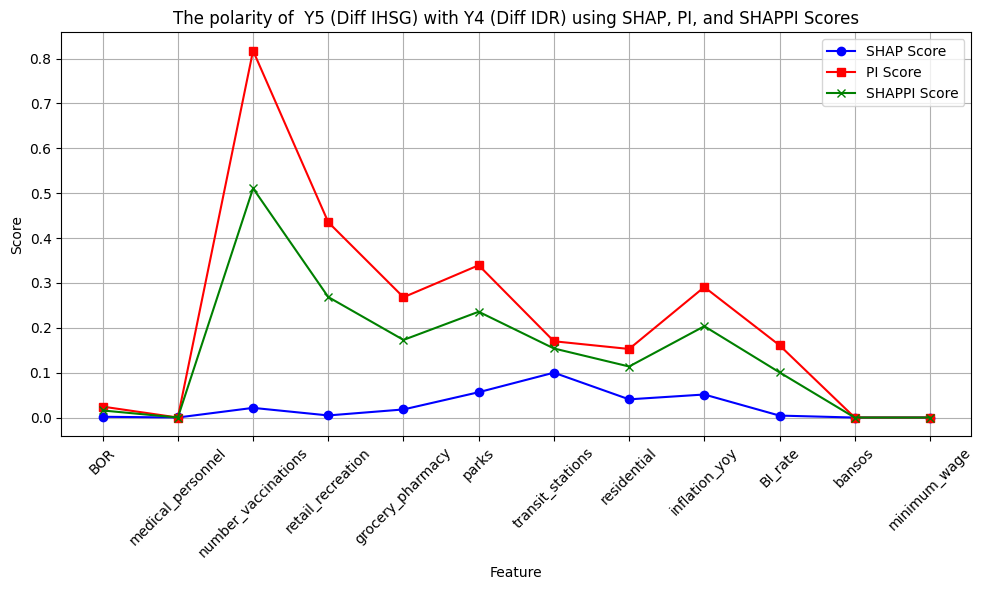

In [142]:
plot_shap_pi_shappi(pol_anal_Y5_Y4, "The polarity of  Y5 (Diff IHSG) with Y4 (Diff IDR) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-212247440>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


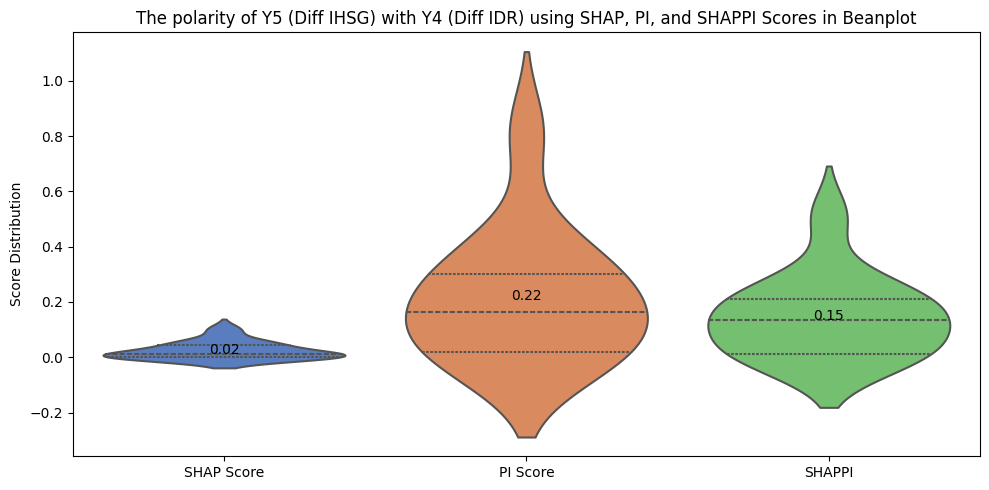

In [143]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y5_Y4, "The polarity of Y5 (Diff IHSG) with Y4 (Diff IDR) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [144]:
print("Analysis SHAP Y5 Polarity with Y6:")
pol_anal_Y5_Y6, perm_imp_Y5_Y6 = analysis_SHAP(shap_values_Y5, X_features_name, pol_Y6, regrY5, X_Y5, Y5)

Analysis SHAP Y5 Polarity with Y6:
---------------------------------------------------------------
Mean =  [0.0068955  0.00045943 0.0861159  0.01881132 0.07204203 0.22542131
 0.3992333  0.161998   0.20505948 0.0174467  0.         0.        ]
Condition =  [array([False,  True, False, False, False,  True,  True, False, False,
       False,  True,  True])]
--------------------------------------------------------------- 



In [145]:
print("Analysis SHAPPI Y5 Polarity with Y6:")
shappi_Y5_Y6 = analysis_SHAPPI(pol_anal_Y5_Y6, perm_imp_Y5_Y6)
shappi_Y5_Y6

Analysis SHAPPI Y5 Polarity with Y6:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
2   number_vaccinations  Positive  0.027659  0.510785
3     retail_recreation  Positive  0.032984  0.268555
5                 parks  Positive  0.023930  0.235798
8         inflation_yoy  Positive  0.030202  0.203533
4      grocery_pharmacy  Positive  0.012768  0.172986
6      transit_stations  Positive  0.013573  0.153977
7           residential  Positive  0.008432  0.113751
9               BI_rate  Positive  0.011522  0.100708
0                   BOR  Positive  0.006582  0.015781
1     medical_personnel  Positive  0.000003  0.000062
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [146]:
pol_anal_Y5_Y6

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.002099    0.001727  Positive  0.024391   
1     medical_personnel      0.000296    0.000115  Positive  0.000008   
2   number_vaccinations     -0.033406    0.021570  Positive  0.817566   
3     retail_recreation     -0.004080    0.004712  Positive  0.435270   
4      grocery_pharmacy     -0.058586    0.018045  Positive  0.268101   
5                 parks      0.080237    0.056464  Positive  0.339398   
6      transit_stations      0.099421    0.100000  Positive  0.170016   
7           residential     -0.005888    0.040577  Positive  0.152823   
8         inflation_yoy     -0.043187    0.051363  Positive  0.290810   
9               BI_rate     -0.000054    0.004370  Positive  0.161098   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.006582  0.015781  
1   0.000003  0.000062  
2   0.027659  0.510785  
3   0.032984  0.268555  
4   0.012768  0.172986  
5   0.023930  0.235798  
6   0.013573  0.153977  
7   0.008432  0.113751  
8   0.030202  0.203533  
9   0.011522  0.100708  
10  0.000000  0.000000  
11  0.000000  0.000000

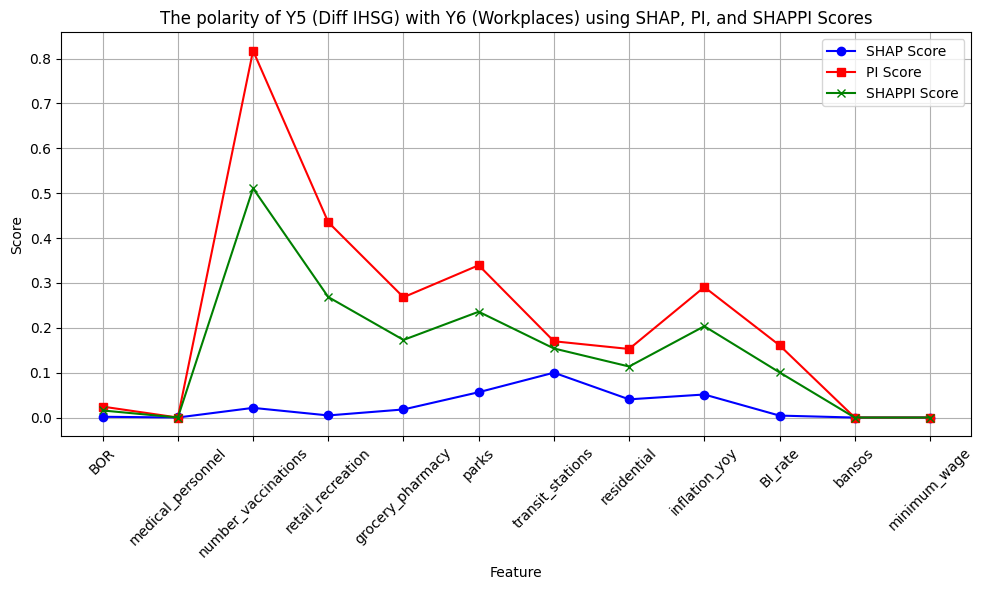

In [147]:
plot_shap_pi_shappi(pol_anal_Y5_Y6, "The polarity of Y5 (Diff IHSG) with Y6 (Workplaces) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-212247440>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


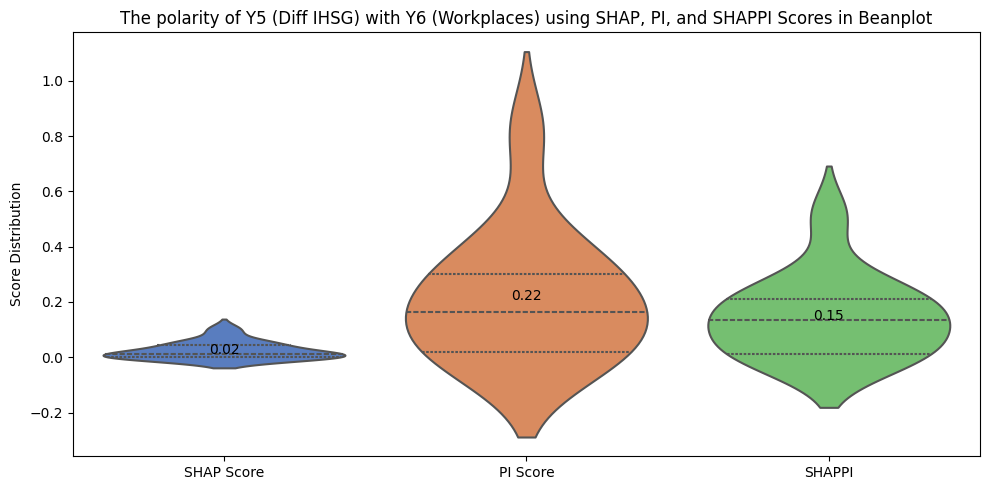

In [148]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y5_Y6, "The polarity of Y5 (Diff IHSG) with Y6 (Workplaces) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [149]:
print("Analysis SHAP Y6 Polarity with Y1:")
pol_anal_Y6_Y1, perm_imp_Y6_Y1 = analysis_SHAP(shap_values_Y6, X_features_name, pol_Y1, regrY6, X_Y6, Y6)

Analysis SHAP Y6 Polarity with Y1:
---------------------------------------------------------------
Mean =  [0.02923181 0.00931624 0.17865564 0.23433046 0.14953506 0.14454775
 0.088162   0.04598963 0.1730496  0.06820542 0.         0.        ]
Condition =  [array([ True, False, False, False, False,  True, False,  True,  True,
        True,  True,  True])]
--------------------------------------------------------------- 



In [150]:
print("Analysis SHAPPI Y6 Polarity with Y1:")
shappi_Y6_Y1 = analysis_SHAPPI(pol_anal_Y6_Y1, perm_imp_Y6_Y1)
shappi_Y6_Y1

Analysis SHAPPI Y6 Polarity with Y1:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
3     retail_recreation  Positive  0.063076  0.550000
4      grocery_pharmacy  Positive  0.028413  0.308844
2   number_vaccinations  Positive  0.016353  0.296803
5                 parks  Positive  0.019345  0.234998
8         inflation_yoy  Positive  0.030898  0.214291
9               BI_rate  Positive  0.019238  0.110002
6      transit_stations  Positive  0.019981  0.100554
7           residential  Positive  0.004293  0.052114
0                   BOR  Positive  0.005664  0.019157
1     medical_personnel  Positive  0.000933  0.003749
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [151]:
pol_anal_Y6_Y1

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR      0.007903    0.012475  Positive  0.030324   
1     medical_personnel     -0.002095    0.003976  Positive  0.004134   
2   number_vaccinations     -0.016637    0.076241  Positive  0.607151   
3     retail_recreation     -0.017008    0.100000  Positive  1.173542   
4      grocery_pharmacy     -0.041872    0.063814  Positive  0.649994   
5                 parks      0.055144    0.061685  Positive  0.479169   
6      transit_stations     -0.008975    0.037623  Positive  0.191857   
7           residential      0.011314    0.019626  Positive  0.099283   
8         inflation_yoy      0.004788    0.073849  Positive  0.416295   
9               BI_rate      0.003049    0.029107  Positive  0.224027   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.005664  0.019157  
1   0.000933  0.003749  
2   0.016353  0.296803  
3   0.063076  0.550000  
4   0.028413  0.308844  
5   0.019345  0.234998  
6   0.019981  0.100554  
7   0.004293  0.052114  
8   0.030898  0.214291  
9   0.019238  0.110002  
10  0.000000  0.000000  
11  0.000000  0.000000

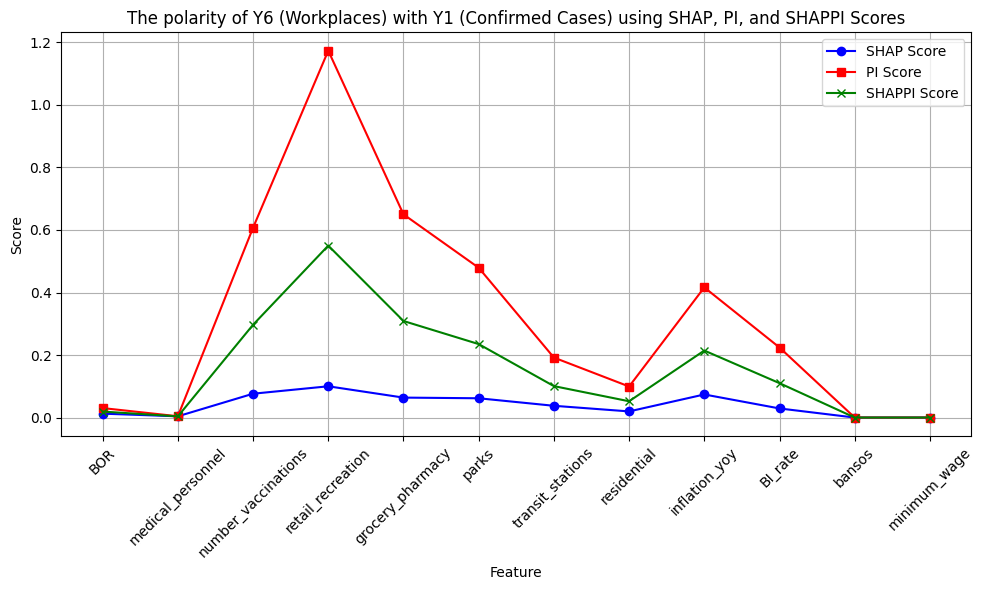

In [152]:
plot_shap_pi_shappi(pol_anal_Y6_Y1, "The polarity of Y6 (Workplaces) with Y1 (Confirmed Cases) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-212247440>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


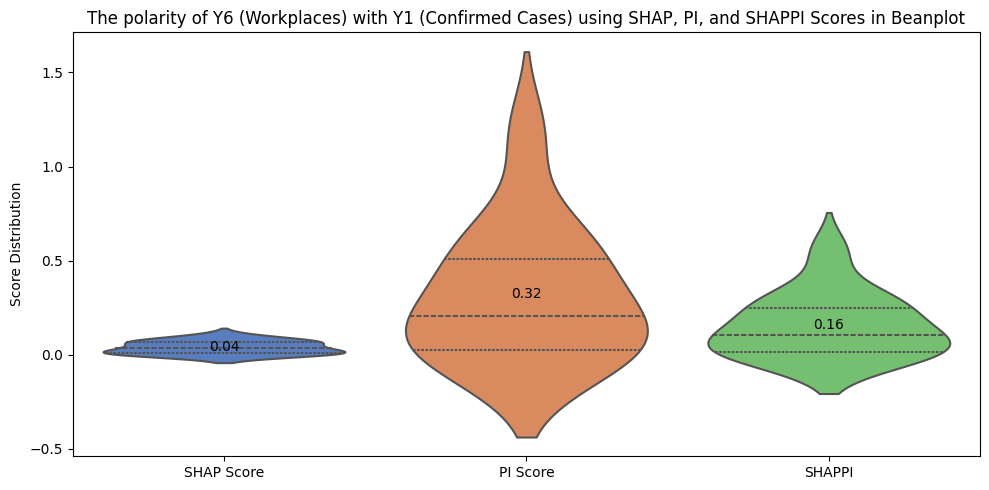

In [153]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y6_Y1, "The polarity of Y6 (Workplaces) with Y1 (Confirmed Cases) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [154]:
print("Analysis SHAP Y6 Polarity with Y2:")
pol_anal_Y6_Y2, perm_imp_Y6_Y2 = analysis_SHAP(shap_values_Y6, X_features_name, pol_Y2, regrY6, X_Y6, Y6)

Analysis SHAP Y6 Polarity with Y2:
---------------------------------------------------------------
Mean =  [0.02923181 0.00931624 0.17865564 0.23433046 0.14953506 0.14454775
 0.088162   0.04598963 0.1730496  0.06820542 0.         0.        ]
Condition =  [array([ True, False, False, False, False,  True, False,  True,  True,
        True,  True,  True])]
--------------------------------------------------------------- 



In [155]:
print("Analysis SHAPPI Y6 Polarity with Y2:")
shappi_Y6_Y2 = analysis_SHAPPI(pol_anal_Y6_Y2, perm_imp_Y6_Y2)
shappi_Y6_Y2

Analysis SHAPPI Y6 Polarity with Y2:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
3     retail_recreation  Positive  0.063076  0.550000
4      grocery_pharmacy  Positive  0.028413  0.308844
2   number_vaccinations  Positive  0.016353  0.296803
5                 parks  Positive  0.019345  0.234998
8         inflation_yoy  Positive  0.030898  0.214291
9               BI_rate  Positive  0.019238  0.110002
6      transit_stations  Positive  0.019981  0.100554
7           residential  Positive  0.004293  0.052114
0                   BOR  Positive  0.005664  0.019157
1     medical_personnel  Positive  0.000933  0.003749
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [156]:
pol_anal_Y6_Y2

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR      0.007903    0.012475  Positive  0.030324   
1     medical_personnel     -0.002095    0.003976  Positive  0.004134   
2   number_vaccinations     -0.016637    0.076241  Positive  0.607151   
3     retail_recreation     -0.017008    0.100000  Positive  1.173542   
4      grocery_pharmacy     -0.041872    0.063814  Positive  0.649994   
5                 parks      0.055144    0.061685  Positive  0.479169   
6      transit_stations     -0.008975    0.037623  Positive  0.191857   
7           residential      0.011314    0.019626  Positive  0.099283   
8         inflation_yoy      0.004788    0.073849  Positive  0.416295   
9               BI_rate      0.003049    0.029107  Positive  0.224027   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.005664  0.019157  
1   0.000933  0.003749  
2   0.016353  0.296803  
3   0.063076  0.550000  
4   0.028413  0.308844  
5   0.019345  0.234998  
6   0.019981  0.100554  
7   0.004293  0.052114  
8   0.030898  0.214291  
9   0.019238  0.110002  
10  0.000000  0.000000  
11  0.000000  0.000000

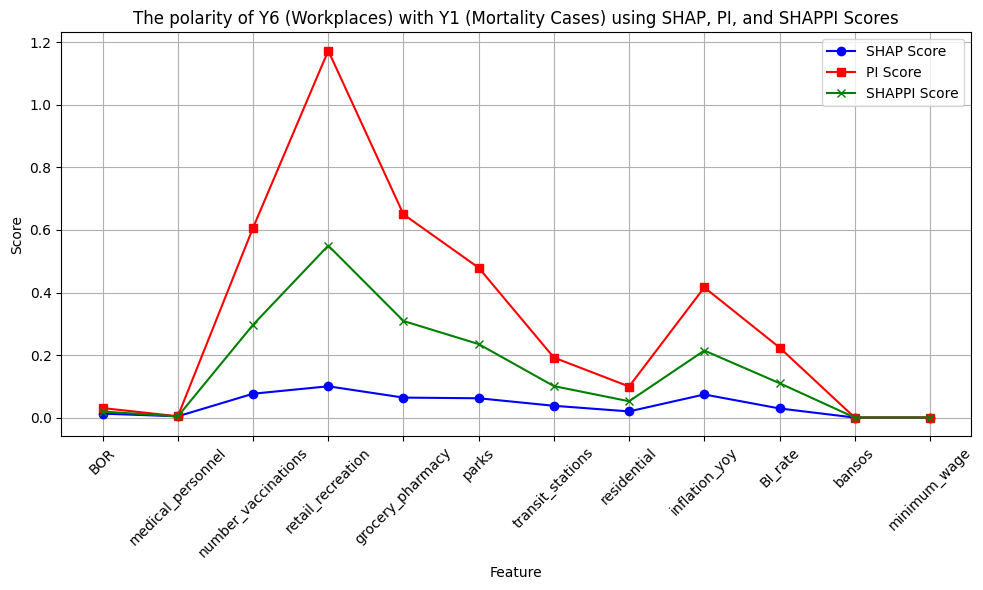

In [157]:
plot_shap_pi_shappi(pol_anal_Y6_Y2, "The polarity of Y6 (Workplaces) with Y1 (Mortality Cases) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-212247440>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


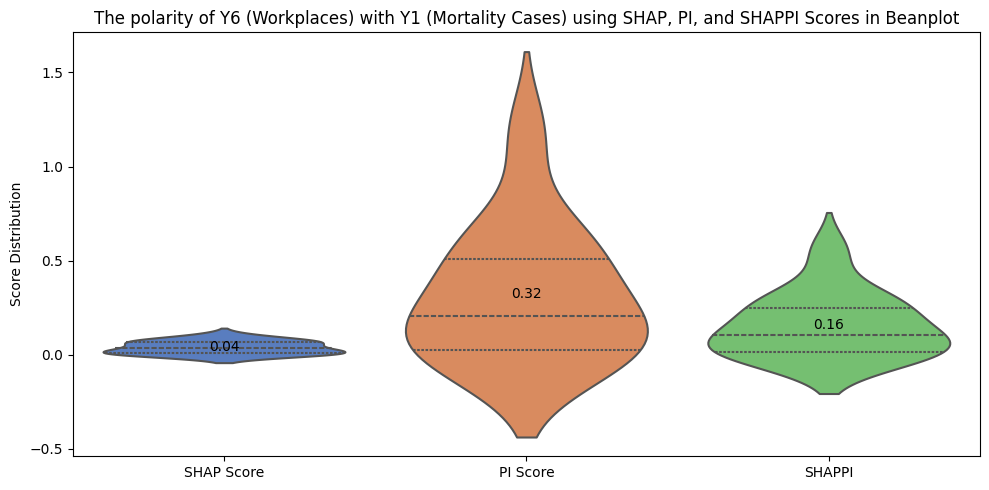

In [158]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y6_Y2, "The polarity of Y6 (Workplaces) with Y1 (Mortality Cases) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [159]:
print("Analysis SHAP Y6 Polarity with Y3:")
pol_anal_Y6_Y3, perm_imp_Y6_Y3 = analysis_SHAP(shap_values_Y6, X_features_name, pol_Y3, regrY6, X_Y6, Y6)

Analysis SHAP Y6 Polarity with Y3:
---------------------------------------------------------------
Mean =  [0.02923181 0.00931624 0.17865564 0.23433046 0.14953506 0.14454775
 0.088162   0.04598963 0.1730496  0.06820542 0.         0.        ]
Condition =  [array([ True, False, False, False, False,  True, False,  True,  True,
        True,  True,  True])]
--------------------------------------------------------------- 



In [160]:
print("Analysis SHAPPI Y6 Polarity with Y3:")
shappi_Y6_Y3 = analysis_SHAPPI(pol_anal_Y6_Y3, perm_imp_Y6_Y3)
shappi_Y6_Y3

Analysis SHAPPI Y6 Polarity with Y3:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
3     retail_recreation  Positive  0.063076  0.550000
4      grocery_pharmacy  Positive  0.028413  0.308844
2   number_vaccinations  Positive  0.016353  0.296803
5                 parks  Positive  0.019345  0.234998
8         inflation_yoy  Positive  0.030898  0.214291
9               BI_rate  Positive  0.019238  0.110002
6      transit_stations  Positive  0.019981  0.100554
7           residential  Positive  0.004293  0.052114
0                   BOR  Positive  0.005664  0.019157
1     medical_personnel  Positive  0.000933  0.003749
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [161]:
pol_anal_Y6_Y3

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR      0.007903    0.012475  Positive  0.030324   
1     medical_personnel     -0.002095    0.003976  Positive  0.004134   
2   number_vaccinations     -0.016637    0.076241  Positive  0.607151   
3     retail_recreation     -0.017008    0.100000  Positive  1.173542   
4      grocery_pharmacy     -0.041872    0.063814  Positive  0.649994   
5                 parks      0.055144    0.061685  Positive  0.479169   
6      transit_stations     -0.008975    0.037623  Positive  0.191857   
7           residential      0.011314    0.019626  Positive  0.099283   
8         inflation_yoy      0.004788    0.073849  Positive  0.416295   
9               BI_rate      0.003049    0.029107  Positive  0.224027   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.005664  0.019157  
1   0.000933  0.003749  
2   0.016353  0.296803  
3   0.063076  0.550000  
4   0.028413  0.308844  
5   0.019345  0.234998  
6   0.019981  0.100554  
7   0.004293  0.052114  
8   0.030898  0.214291  
9   0.019238  0.110002  
10  0.000000  0.000000  
11  0.000000  0.000000

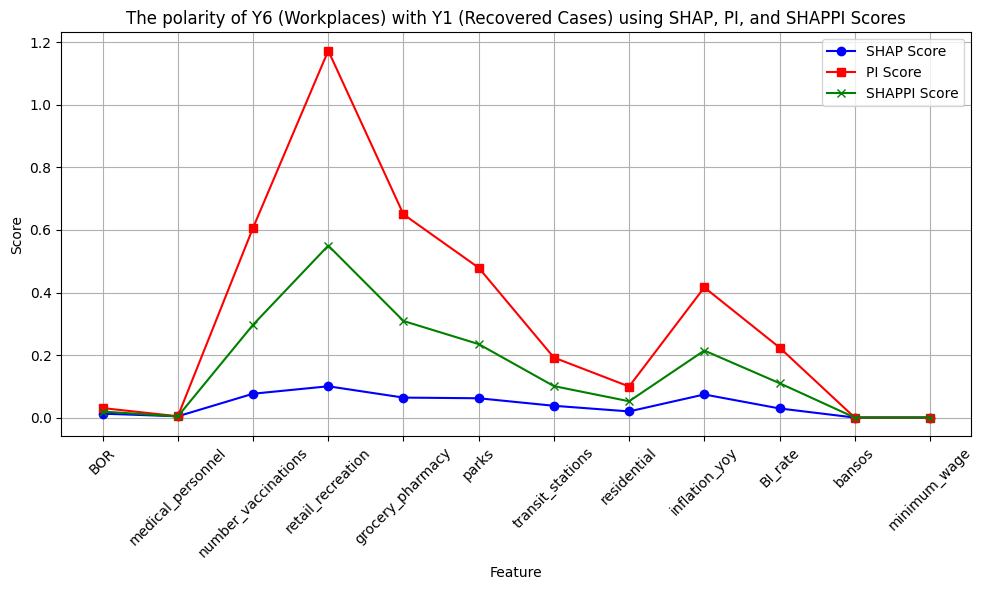

In [162]:
plot_shap_pi_shappi(pol_anal_Y6_Y3, "The polarity of Y6 (Workplaces) with Y1 (Recovered Cases) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-212247440>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


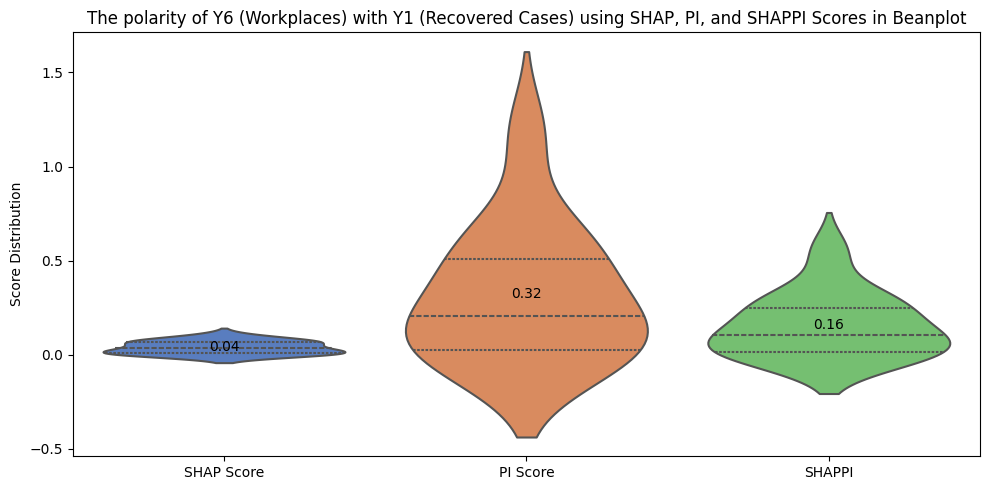

In [163]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y6_Y3, "The polarity of Y6 (Workplaces) with Y1 (Recovered Cases) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [164]:
print("Analysis SHAP Y6 Polarity with Y4:")
pol_anal_Y6_Y4, perm_imp_Y6_Y4 = analysis_SHAP(shap_values_Y6, X_features_name, pol_Y4, regrY6, X_Y6, Y6)

Analysis SHAP Y6 Polarity with Y4:
---------------------------------------------------------------
Mean =  [0.02923181 0.00931624 0.17865564 0.23433046 0.14953506 0.14454775
 0.088162   0.04598963 0.1730496  0.06820542 0.         0.        ]
Condition =  [array([ True, False, False, False, False,  True, False,  True,  True,
        True,  True,  True])]
--------------------------------------------------------------- 



In [165]:
print("Analysis SHAPPI Y6 Polarity with Y4:")
shappi_Y6_Y4 = analysis_SHAPPI(pol_anal_Y6_Y4, perm_imp_Y6_Y4)
shappi_Y6_Y4

Analysis SHAPPI Y6 Polarity with Y4:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
3     retail_recreation  Positive  0.063076  0.550000
4      grocery_pharmacy  Positive  0.028413  0.308844
2   number_vaccinations  Positive  0.016353  0.296803
5                 parks  Positive  0.019345  0.234998
8         inflation_yoy  Positive  0.030898  0.214291
9               BI_rate  Positive  0.019238  0.110002
6      transit_stations  Positive  0.019981  0.100554
7           residential  Positive  0.004293  0.052114
0                   BOR  Positive  0.005664  0.019157
1     medical_personnel  Positive  0.000933  0.003749
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [166]:
pol_anal_Y6_Y4

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR      0.007903    0.012475  Positive  0.030324   
1     medical_personnel     -0.002095    0.003976  Positive  0.004134   
2   number_vaccinations     -0.016637    0.076241  Positive  0.607151   
3     retail_recreation     -0.017008    0.100000  Positive  1.173542   
4      grocery_pharmacy     -0.041872    0.063814  Positive  0.649994   
5                 parks      0.055144    0.061685  Positive  0.479169   
6      transit_stations     -0.008975    0.037623  Positive  0.191857   
7           residential      0.011314    0.019626  Positive  0.099283   
8         inflation_yoy      0.004788    0.073849  Positive  0.416295   
9               BI_rate      0.003049    0.029107  Positive  0.224027   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.005664  0.019157  
1   0.000933  0.003749  
2   0.016353  0.296803  
3   0.063076  0.550000  
4   0.028413  0.308844  
5   0.019345  0.234998  
6   0.019981  0.100554  
7   0.004293  0.052114  
8   0.030898  0.214291  
9   0.019238  0.110002  
10  0.000000  0.000000  
11  0.000000  0.000000

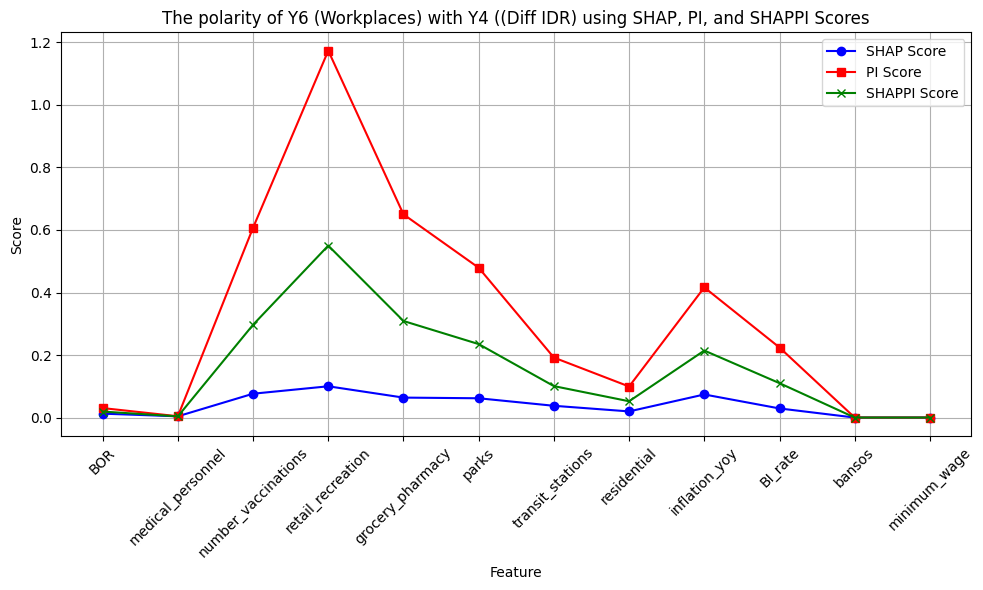

In [167]:
plot_shap_pi_shappi(pol_anal_Y6_Y4, "The polarity of Y6 (Workplaces) with Y4 ((Diff IDR) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-212247440>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


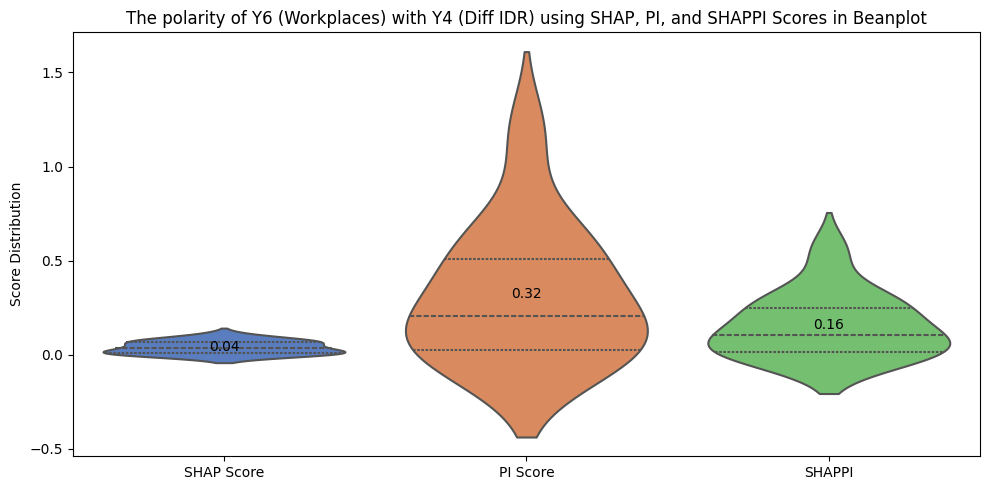

In [168]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y6_Y4, "The polarity of Y6 (Workplaces) with Y4 (Diff IDR) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [169]:
print("Analysis SHAP Y6 Polarity with Y5:")
pol_anal_Y6_Y5, perm_imp_Y6_Y5 = analysis_SHAP(shap_values_Y6, X_features_name, pol_Y5, regrY6, X_Y6, Y6)

Analysis SHAP Y6 Polarity with Y5:
---------------------------------------------------------------
Mean =  [0.02923181 0.00931624 0.17865564 0.23433046 0.14953506 0.14454775
 0.088162   0.04598963 0.1730496  0.06820542 0.         0.        ]
Condition =  [array([ True, False, False, False, False,  True, False,  True,  True,
        True,  True,  True])]
--------------------------------------------------------------- 



In [170]:
print("Analysis SHAPPI Y6 Polarity with Y5:")
shappi_Y6_Y5 = analysis_SHAPPI(pol_anal_Y6_Y5, perm_imp_Y6_Y5)
shappi_Y6_Y5

Analysis SHAPPI Y6 Polarity with Y5:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
3     retail_recreation  Positive  0.063076  0.550000
4      grocery_pharmacy  Positive  0.028413  0.308844
2   number_vaccinations  Positive  0.016353  0.296803
5                 parks  Positive  0.019345  0.234998
8         inflation_yoy  Positive  0.030898  0.214291
9               BI_rate  Positive  0.019238  0.110002
6      transit_stations  Positive  0.019981  0.100554
7           residential  Positive  0.004293  0.052114
0                   BOR  Positive  0.005664  0.019157
1     medical_personnel  Positive  0.000933  0.003749
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [171]:
pol_anal_Y6_Y5

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR      0.007903    0.012475  Positive  0.030324   
1     medical_personnel     -0.002095    0.003976  Positive  0.004134   
2   number_vaccinations     -0.016637    0.076241  Positive  0.607151   
3     retail_recreation     -0.017008    0.100000  Positive  1.173542   
4      grocery_pharmacy     -0.041872    0.063814  Positive  0.649994   
5                 parks      0.055144    0.061685  Positive  0.479169   
6      transit_stations     -0.008975    0.037623  Positive  0.191857   
7           residential      0.011314    0.019626  Positive  0.099283   
8         inflation_yoy      0.004788    0.073849  Positive  0.416295   
9               BI_rate      0.003049    0.029107  Positive  0.224027   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.005664  0.019157  
1   0.000933  0.003749  
2   0.016353  0.296803  
3   0.063076  0.550000  
4   0.028413  0.308844  
5   0.019345  0.234998  
6   0.019981  0.100554  
7   0.004293  0.052114  
8   0.030898  0.214291  
9   0.019238  0.110002  
10  0.000000  0.000000  
11  0.000000  0.000000

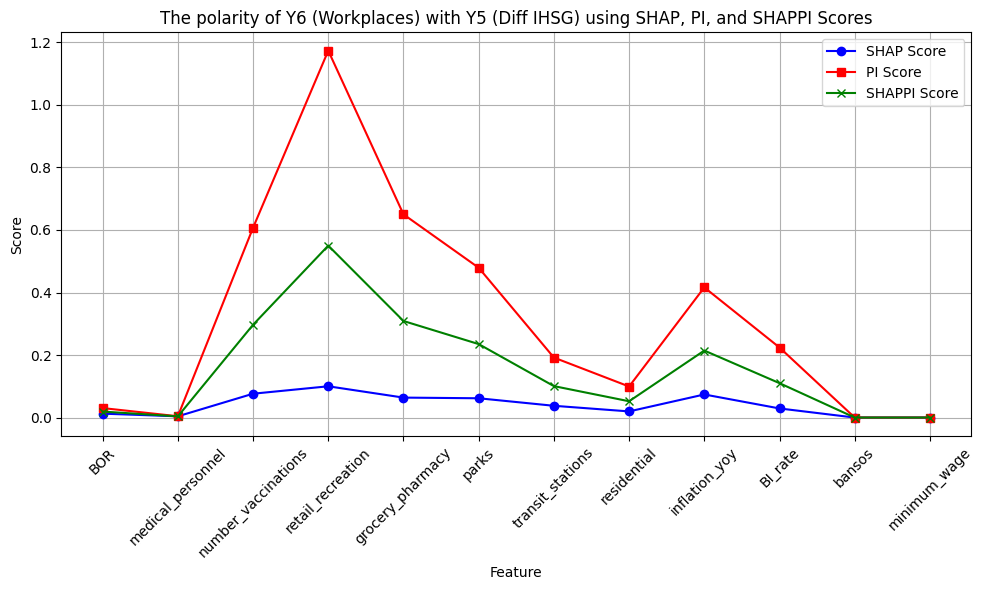

In [172]:
plot_shap_pi_shappi(pol_anal_Y6_Y5, "The polarity of Y6 (Workplaces) with Y5 (Diff IHSG) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-212247440>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


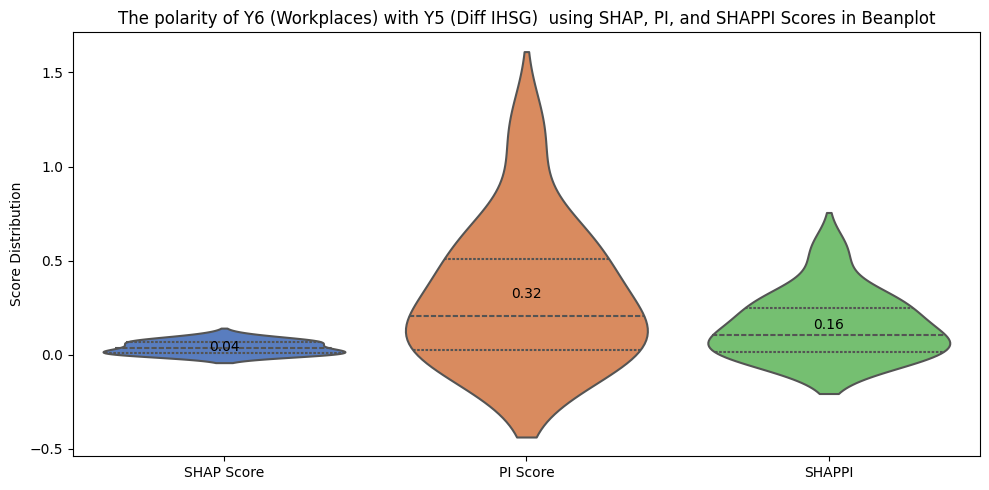

In [173]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y6_Y5, "The polarity of Y6 (Workplaces) with Y5 (Diff IHSG)  using SHAP, PI, and SHAPPI Scores in Beanplot")

##**Perhitungan Bobot SHAP, PI, dan SHAPPI**

In [174]:
def get_score_shap(pol_anal):
  shap_scores = pol_anal[["Feature", "SHAP Score"]]

  shap_scores_ = shap_scores.set_index("Feature").to_dict()["SHAP Score"]
  return shap_scores_

In [175]:
def get_score_pi(pol_anal):
  pi_scores = pol_anal[["Feature", "PI Score"]]

  pi_scores_ = pi_scores.set_index("Feature").to_dict()["PI Score"]
  return pi_scores_

In [176]:
def get_score_shappi(shappi):
  # Mengambil hanya kolom "Feature" dan "SHAPPI"
  shappi_scores = shappi[["Feature", "SHAPPI"]]

  # Mengkonversi DataFrame menjadi dictionary
  shappi_scores_ = shappi_scores.set_index("Feature").to_dict()["SHAPPI"]
  return shappi_scores_

In [177]:
# Menggabungkan seluruh perhitungan SHAP, PI dan SHAPPI yang dilakukan dari Y1-Y2, Y1-Y3, Y1-Y4 dst....sampai Y6-Y4, Y6-Y5
var_Y = ["Y1", "Y2", "Y3", "Y4", "Y5", "Y6"]

shap_scores = {
    f"{y1}_{y2}": get_score_shap(globals()[f"pol_anal_{y1}_{y2}"])
    for y1 in var_Y for y2 in var_Y if y1 != y2
}

pi_scores = {
    f"{y1}_{y2}": get_score_pi(globals()[f"pol_anal_{y1}_{y2}"])
    for y1 in var_Y for y2 in var_Y if y1 != y2
}

shappi_scores = {
    f"{y1}_{y2}": get_score_shappi(globals()[f"shappi_{y1}_{y2}"])
    for y1 in var_Y for y2 in var_Y if y1 != y2
}

In [178]:
def calculate_weight_feature_for_Y(scores, txt_Y, txt):
  # Menggabungkan skor akhir SHAPPI
  combined_scores = {} # inisialisasi awal

  for key, dicts in scores.items():
    if txt_Y in key:
      for key, value in dicts.items():
        if key in combined_scores:
          combined_scores[key] += value
        else:
          combined_scores[key] = value

  # Menghitung total skor dari gabungan tabel
  total_score_combined = sum(combined_scores.values())

  # Menghitung bobot untuk setiap fitur
  weights = {feature: score / total_score_combined for feature, score in combined_scores.items()}

  # Mengurutkan bobot dari yang tertinggi ke yang terendah
  sorted_weights = sorted(weights.items(), key=lambda item: item[1], reverse=True)

  print(f"Weight of Features for [{txt_Y}] from {txt}\n-----------------------------------")
  # Mencetak bobot yang sudah diurutkan
  for feature, weight in sorted_weights:
      print(f"Weight of {feature.upper()}: {weight:.4f}")

  # Menyimpan bobot ke dalam dictionary untuk digunakan dalam fungsi objektif
  weight_dict = {feature: weight for feature, weight in sorted_weights}

  return weight_dict

### Menghitung Bobot SHAP

In [179]:
Y1_shap_weights = calculate_weight_feature_for_Y(shap_scores, "Y1", "SHAP")

Weight of Features for [Y1] from SHAP
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.3924
Weight of INFLATION_YOY: 0.1667
Weight of TRANSIT_STATIONS: 0.1193
Weight of PARKS: 0.0878
Weight of RETAIL_RECREATION: 0.0583
Weight of GROCERY_PHARMACY: 0.0555
Weight of RESIDENTIAL: 0.0542
Weight of BOR: 0.0350
Weight of BI_RATE: 0.0288
Weight of MEDICAL_PERSONNEL: 0.0021
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [180]:
Y2_shap_weights = calculate_weight_feature_for_Y(shap_scores, "Y2", "SHAP")

Weight of Features for [Y2] from SHAP
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.3117
Weight of INFLATION_YOY: 0.2703
Weight of TRANSIT_STATIONS: 0.1103
Weight of PARKS: 0.0778
Weight of GROCERY_PHARMACY: 0.0657
Weight of RETAIL_RECREATION: 0.0531
Weight of RESIDENTIAL: 0.0523
Weight of BOR: 0.0315
Weight of BI_RATE: 0.0254
Weight of MEDICAL_PERSONNEL: 0.0018
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [181]:
Y3_shap_weights = calculate_weight_feature_for_Y(shap_scores, "Y3", "SHAP")

Weight of Features for [Y3] from SHAP
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.3959
Weight of INFLATION_YOY: 0.1601
Weight of TRANSIT_STATIONS: 0.1207
Weight of PARKS: 0.0882
Weight of RETAIL_RECREATION: 0.0584
Weight of GROCERY_PHARMACY: 0.0558
Weight of RESIDENTIAL: 0.0529
Weight of BOR: 0.0366
Weight of BI_RATE: 0.0293
Weight of MEDICAL_PERSONNEL: 0.0021
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [182]:
Y4_shap_weights = calculate_weight_feature_for_Y(shap_scores, "Y4", "SHAP")

Weight of Features for [Y4] from SHAP
-----------------------------------
Weight of TRANSIT_STATIONS: 0.2337
Weight of INFLATION_YOY: 0.1814
Weight of NUMBER_VACCINATIONS: 0.1814
Weight of PARKS: 0.1467
Weight of RESIDENTIAL: 0.0977
Weight of GROCERY_PHARMACY: 0.0673
Weight of RETAIL_RECREATION: 0.0489
Weight of BI_RATE: 0.0237
Weight of BOR: 0.0176
Weight of MEDICAL_PERSONNEL: 0.0017
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [183]:
Y5_shap_weights = calculate_weight_feature_for_Y(shap_scores, "Y5", "SHAP")

Weight of Features for [Y5] from SHAP
-----------------------------------
Weight of TRANSIT_STATIONS: 0.2337
Weight of INFLATION_YOY: 0.1814
Weight of NUMBER_VACCINATIONS: 0.1814
Weight of PARKS: 0.1467
Weight of RESIDENTIAL: 0.0977
Weight of GROCERY_PHARMACY: 0.0673
Weight of RETAIL_RECREATION: 0.0489
Weight of BI_RATE: 0.0237
Weight of BOR: 0.0176
Weight of MEDICAL_PERSONNEL: 0.0017
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [184]:
Y6_shap_weights = calculate_weight_feature_for_Y(shap_scores, "Y6", "SHAP")

Weight of Features for [Y6] from SHAP
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.2067
Weight of INFLATION_YOY: 0.1699
Weight of RETAIL_RECREATION: 0.1481
Weight of PARKS: 0.1225
Weight of TRANSIT_STATIONS: 0.1141
Weight of GROCERY_PHARMACY: 0.1059
Weight of RESIDENTIAL: 0.0536
Weight of BI_RATE: 0.0472
Weight of BOR: 0.0263
Weight of MEDICAL_PERSONNEL: 0.0058
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


### Menghitung Bobot PI

In [185]:
Y1_pi_weights = calculate_weight_feature_for_Y(pi_scores, "Y1", "PI")

Weight of Features for [Y1] from PI
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.6202
Weight of INFLATION_YOY: 0.1070
Weight of RETAIL_RECREATION: 0.0747
Weight of TRANSIT_STATIONS: 0.0508
Weight of GROCERY_PHARMACY: 0.0497
Weight of PARKS: 0.0481
Weight of RESIDENTIAL: 0.0218
Weight of BI_RATE: 0.0197
Weight of BOR: 0.0079
Weight of MEDICAL_PERSONNEL: 0.0002
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [186]:
Y2_pi_weights = calculate_weight_feature_for_Y(pi_scores, "Y2", "PI")

Weight of Features for [Y2] from PI
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.5073
Weight of INFLATION_YOY: 0.2481
Weight of RETAIL_RECREATION: 0.0617
Weight of TRANSIT_STATIONS: 0.0472
Weight of GROCERY_PHARMACY: 0.0433
Weight of PARKS: 0.0414
Weight of RESIDENTIAL: 0.0235
Weight of BI_RATE: 0.0167
Weight of BOR: 0.0107
Weight of MEDICAL_PERSONNEL: 0.0002
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [187]:
Y3_pi_weights = calculate_weight_feature_for_Y(pi_scores, "Y3", "PI")

Weight of Features for [Y3] from PI
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.6264
Weight of INFLATION_YOY: 0.1009
Weight of RETAIL_RECREATION: 0.0748
Weight of TRANSIT_STATIONS: 0.0507
Weight of GROCERY_PHARMACY: 0.0496
Weight of PARKS: 0.0480
Weight of RESIDENTIAL: 0.0216
Weight of BI_RATE: 0.0195
Weight of BOR: 0.0082
Weight of MEDICAL_PERSONNEL: 0.0002
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [188]:
Y4_pi_weights = calculate_weight_feature_for_Y(pi_scores, "Y4", "PI")

Weight of Features for [Y4] from PI
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.3436
Weight of TRANSIT_STATIONS: 0.1860
Weight of INFLATION_YOY: 0.1367
Weight of PARKS: 0.0907
Weight of GROCERY_PHARMACY: 0.0798
Weight of RETAIL_RECREATION: 0.0797
Weight of RESIDENTIAL: 0.0564
Weight of BI_RATE: 0.0208
Weight of BOR: 0.0062
Weight of MEDICAL_PERSONNEL: 0.0002
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [189]:
Y5_pi_weights = calculate_weight_feature_for_Y(pi_scores, "Y5", "PI")

Weight of Features for [Y5] from PI
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.3946
Weight of RETAIL_RECREATION: 0.1327
Weight of INFLATION_YOY: 0.1294
Weight of PARKS: 0.0948
Weight of GROCERY_PHARMACY: 0.0850
Weight of TRANSIT_STATIONS: 0.0705
Weight of RESIDENTIAL: 0.0427
Weight of BI_RATE: 0.0415
Weight of BOR: 0.0087
Weight of MEDICAL_PERSONNEL: 0.0002
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [190]:
Y6_pi_weights = calculate_weight_feature_for_Y(pi_scores, "Y6", "PI")

Weight of Features for [Y6] from PI
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.3036
Weight of RETAIL_RECREATION: 0.2087
Weight of INFLATION_YOY: 0.1252
Weight of GROCERY_PHARMACY: 0.1217
Weight of PARKS: 0.0980
Weight of TRANSIT_STATIONS: 0.0621
Weight of BI_RATE: 0.0431
Weight of RESIDENTIAL: 0.0288
Weight of BOR: 0.0081
Weight of MEDICAL_PERSONNEL: 0.0007
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


### Menghitung Bobot SHAPPI

In [191]:
Y1_shappi_weights = calculate_weight_feature_for_Y(shappi_scores, "Y1", "SHAPPI")

Weight of Features for [Y1] from SHAPPI
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.5034
Weight of INFLATION_YOY: 0.1144
Weight of RETAIL_RECREATION: 0.0891
Weight of TRANSIT_STATIONS: 0.0869
Weight of PARKS: 0.0700
Weight of GROCERY_PHARMACY: 0.0647
Weight of RESIDENTIAL: 0.0351
Weight of BI_RATE: 0.0255
Weight of BOR: 0.0105
Weight of MEDICAL_PERSONNEL: 0.0004
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [192]:
Y2_shappi_weights = calculate_weight_feature_for_Y(shappi_scores, "Y2", "SHAPPI")

Weight of Features for [Y2] from SHAPPI
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.4268
Weight of INFLATION_YOY: 0.2251
Weight of TRANSIT_STATIONS: 0.0796
Weight of RETAIL_RECREATION: 0.0772
Weight of PARKS: 0.0620
Weight of GROCERY_PHARMACY: 0.0595
Weight of RESIDENTIAL: 0.0349
Weight of BI_RATE: 0.0224
Weight of BOR: 0.0122
Weight of MEDICAL_PERSONNEL: 0.0004
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [193]:
Y3_shappi_weights = calculate_weight_feature_for_Y(shappi_scores, "Y3", "SHAPPI")

Weight of Features for [Y3] from SHAPPI
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.5060
Weight of INFLATION_YOY: 0.1099
Weight of RETAIL_RECREATION: 0.0896
Weight of TRANSIT_STATIONS: 0.0874
Weight of PARKS: 0.0703
Weight of GROCERY_PHARMACY: 0.0650
Weight of RESIDENTIAL: 0.0350
Weight of BI_RATE: 0.0255
Weight of BOR: 0.0109
Weight of MEDICAL_PERSONNEL: 0.0004
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [194]:
Y4_shappi_weights = calculate_weight_feature_for_Y(shappi_scores, "Y4", "SHAPPI")

Weight of Features for [Y4] from SHAPPI
-----------------------------------
Weight of TRANSIT_STATIONS: 0.2461
Weight of NUMBER_VACCINATIONS: 0.2436
Weight of INFLATION_YOY: 0.1340
Weight of PARKS: 0.1133
Weight of GROCERY_PHARMACY: 0.0875
Weight of RESIDENTIAL: 0.0750
Weight of RETAIL_RECREATION: 0.0727
Weight of BI_RATE: 0.0211
Weight of BOR: 0.0064
Weight of MEDICAL_PERSONNEL: 0.0004
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [195]:
Y5_shappi_weights = calculate_weight_feature_for_Y(shappi_scores, "Y5", "SHAPPI")

Weight of Features for [Y5] from SHAPPI
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.3238
Weight of RETAIL_RECREATION: 0.1345
Weight of INFLATION_YOY: 0.1270
Weight of PARKS: 0.1128
Weight of TRANSIT_STATIONS: 0.1010
Weight of GROCERY_PHARMACY: 0.0916
Weight of RESIDENTIAL: 0.0551
Weight of BI_RATE: 0.0444
Weight of BOR: 0.0093
Weight of MEDICAL_PERSONNEL: 0.0003
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [196]:
Y6_shappi_weights = calculate_weight_feature_for_Y(shappi_scores, "Y6", "SHAPPI")

Weight of Features for [Y6] from SHAPPI
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.2554
Weight of RETAIL_RECREATION: 0.2070
Weight of INFLATION_YOY: 0.1260
Weight of GROCERY_PHARMACY: 0.1258
Weight of PARKS: 0.1091
Weight of TRANSIT_STATIONS: 0.0833
Weight of BI_RATE: 0.0456
Weight of RESIDENTIAL: 0.0366
Weight of BOR: 0.0100
Weight of MEDICAL_PERSONNEL: 0.0013
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


## Save Data for Use in the Multi-Object Optimization

In [197]:
import joblib

data_saved = {
    'X' : X,
    'regrY1' : regrY1,
    'regrY2' : regrY2,
    'regrY3' : regrY3,
    'regrY4' : regrY4,
    'regrY5' : regrY5,
    'regrY6' : regrY6,
    'n_dim_X_features' : n_dim_X_features,
    'n_dim_Y_features' : n_dim_Y_features,
    'X_features_name' : X_features_name,
    'Y_features_name' : Y_features_name,
    'Y1_shap_weights' : Y1_shap_weights,
    'Y2_shap_weights' : Y2_shap_weights,
    'Y3_shap_weights' : Y3_shap_weights,
    'Y4_shap_weights' : Y4_shap_weights,
    'Y5_shap_weights' : Y5_shap_weights,
    'Y6_shap_weights' : Y6_shap_weights,
    'Y1_pi_weights' : Y1_pi_weights,
    'Y2_pi_weights' : Y2_pi_weights,
    'Y3_pi_weights' : Y3_pi_weights,
    'Y4_pi_weights' : Y4_pi_weights,
    'Y5_pi_weights' : Y5_pi_weights,
    'Y6_pi_weights' : Y6_pi_weights,
    'Y1_shappi_weights' : Y1_shappi_weights,
    'Y2_shappi_weights' : Y2_shappi_weights,
    'Y3_shappi_weights' : Y3_shappi_weights,
    'Y4_shappi_weights' : Y4_shappi_weights,
    'Y5_shappi_weights' : Y5_shappi_weights,
    'Y6_shappi_weights' : Y6_shappi_weights,
}

joblib.dump(data_saved, folder_drive + 'data_saved2.job')

['/content/drive/MyDrive/Dokument S3 Bismillah/Data/data_saved2.job']